# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data


Part 3: Plotting and Visualizing Data in Python

*Mark Bauer*

In [4]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import geopandas as gpd
from geopandas.tools import overlay
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
from sodapy import Socrata
import os
import zipfile
from zipfile import ZipFile
import json
import pylab as pl 
import shapely
from fiona.crs import from_epsg
import urllib
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [5]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark

%watermark -v -p numpy,pandas,matplotlib.pyplot

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib.pyplot 3.0.2


# Building Footprints Dataset

In [6]:
# setting the link of our data (a static csv file) as the name 'url'
url = 'https://data.cityofnewyork.us/api/views/nvpz-w93e/rows.csv?accessType=DOWNLOAD'

# reading in our data as a pandas dataframe and setting the name to'building_footprints'
building_footprints = pd.read_csv(url)

In [7]:
# previewing the first five rows of our dataframe
building_footprints.head()

the_geom  CNSTRCT_YR NAME  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0  NaN   
1  MULTIPOLYGON (((-73.87670970144625 40.71425234...      1930.0  NaN   
2  MULTIPOLYGON (((-73.85195485799383 40.66235471...      1960.0  NaN   
3  MULTIPOLYGON (((-73.94029215265738 40.64108287...      1920.0  NaN   
4  MULTIPOLYGON (((-73.98998983552244 40.62383804...      1915.0  NaN   

       BIN                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  3394646  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
1  4548330  08/17/2017 12:00:00 AM +0000  Constructed   1226227   10.360000   
2  4460479  08/22/2017 12:00:00 AM +0000  Constructed    581946   29.811570   
3  3355684  08/17/2017 12:00:00 AM +0000  Constructed    858061   11.200000   
4  3131737  08/22/2017 12:00:00 AM +0000  Constructed    568078   24.980000   

   FEAT_CODE  GROUNDELEV   SHAPE_AREA   SHAPE_LEN    BASE_BBL    MPLUTO_BBL  \
0     2100.0        18.0   854.662433  125.079796  3044520815  3.044521e+09   
1     5110.0       122.0   217.594243   60.225858  4030640041  4.030640e+09   
2     2100.0        10.0   946.427476  123.141941  4139430001  4.139430e+09   
3     5110.0        32.0   248.678169   63.940817  3049720006  3.049720e+09   
4     2100.0        44.0  1163.227669  165.608763  3055100055  3.055100e+09   

   GEOMSOURCE  
0  Photogramm  
1  Photogramm  
2  Photogramm  
3  Photogramm  
4  Photogramm

In [8]:
# previewing the last five rows of our dataframe
building_footprints.tail()

the_geom  CNSTRCT_YR NAME  \
1085118  MULTIPOLYGON (((-74.19261446371787 40.54866210...      2017.0  NaN   
1085119  MULTIPOLYGON (((-74.19241537474088 40.54854349...      2017.0  NaN   
1085120  MULTIPOLYGON (((-74.1923725080451 40.548543839...         NaN  NaN   
1085121  MULTIPOLYGON (((-73.89610509131737 40.83492693...         NaN  NaN   
1085122  MULTIPOLYGON (((-73.85153009493887 40.83103582...      2019.0  NaN   

             BIN                    LSTMODDATE               LSTSTATYPE  \
1085118  5166728  04/16/2020 12:00:00 AM +0000              Constructed   
1085119  5171918  04/16/2020 12:00:00 AM +0000              Constructed   
1085120  5171919  04/16/2020 12:00:00 AM +0000              Constructed   
1085121  2129055  04/16/2020 12:00:00 AM +0000  Marked for Construction   
1085122  2128208  04/16/2020 12:00:00 AM +0000              Constructed   

         DOITT_ID  HEIGHTROOF  FEAT_CODE  GROUNDELEV   SHAPE_AREA   SHAPE_LEN  \
1085118   1291325        12.0     5110.0       127.0   321.693662   74.030236   
1085119   1291093        31.0     2100.0       127.0  1122.498552  139.799929   
1085120   1291326         NaN     5110.0       127.0   278.325280   69.141391   
1085121   1292422        12.0     2100.0        72.0   356.897279   75.676002   
1085122   1292421        29.0     2100.0        37.0  3139.155800  268.336349   

           BASE_BBL    MPLUTO_BBL  GEOMSOURCE  
1085118  5060140038  5.060140e+09  Other (Man  
1085119  5060140037  5.060140e+09  Other (Man  
1085120  5060140037  5.060140e+09  Other (Man  
1085121  2029420101           NaN  Other (Man  
1085122  2038100077           NaN  Other (Man

In [9]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_footprints.shape

(1085123, 15)

In [10]:
# printing the column names, non-null counts, and data types of our columns
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085123 entries, 0 to 1085122
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1085123 non-null  object 
 1   CNSTRCT_YR  1080304 non-null  float64
 2   NAME        1731 non-null     object 
 3   BIN         1085123 non-null  int64  
 4   LSTMODDATE  1085123 non-null  object 
 5   LSTSTATYPE  1084942 non-null  object 
 6   DOITT_ID    1085123 non-null  int64  
 7   HEIGHTROOF  1082478 non-null  float64
 8   FEAT_CODE   1085113 non-null  float64
 9   GROUNDELEV  1084596 non-null  float64
 10  SHAPE_AREA  1085123 non-null  float64
 11  SHAPE_LEN   1085123 non-null  float64
 12  BASE_BBL    1085123 non-null  int64  
 13  MPLUTO_BBL  1084721 non-null  float64
 14  GEOMSOURCE  1084908 non-null  object 
dtypes: float64(7), int64(3), object(5)
memory usage: 124.2+ MB


In [11]:
# printing descriptive statistics of our numeric columns in our data
building_footprints.describe()

CNSTRCT_YR           BIN      DOITT_ID    HEIGHTROOF     FEAT_CODE  \
count  1.080304e+06  1.085123e+06  1.085123e+06  1.082478e+06  1.085113e+06   
mean   3.827777e+03  3.709866e+06  5.905826e+05  2.753403e+01  2.698811e+03   
std    1.950441e+06  1.026796e+06  3.590041e+05  2.125710e+01  1.202318e+03   
min    0.000000e+00  1.000000e+06  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.920000e+03  3.128444e+06  2.864155e+05  1.832000e+01  2.100000e+03   
50%    1.930000e+03  4.066647e+06  5.729670e+05  2.609000e+01  2.100000e+03   
75%    1.955000e+03  4.481470e+06  8.611125e+05  3.109000e+01  2.100000e+03   
max    2.027140e+09  5.863738e+06  1.292422e+06  1.550000e+03  5.110000e+03   

         GROUNDELEV    SHAPE_AREA     SHAPE_LEN      BASE_BBL    MPLUTO_BBL  
count  1.084596e+06  1.085123e+06  1.085123e+06  1.085123e+06  1.084721e+06  
mean   5.510074e+01  1.596725e+03  1.553083e+02  3.561695e+09  3.561543e+09  
std    4.150396e+01  5.604703e+03  1.271384e+02  9.860654e+08  9.861419e+08  
min   -1.400000e+01  3.247526e+01  2.373699e+01  2.025280e+08  3.049330e+08  
25%    2.500000e+01  6.520205e+02  1.096879e+02  3.043160e+09  3.043130e+09  
50%    4.600000e+01  9.571991e+02  1.379151e+02  4.019180e+09  4.019050e+09  
75%    7.400000e+01  1.320293e+03  1.644534e+02  4.106690e+09  4.106660e+09  
max    5.560000e+02  1.171874e+06  2.001729e+04  6.000000e+09  6.000000e+09

In [12]:
print(len(building_footprints))

1085123


In [13]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['MPLUTO_BBL'].isna().sum()

402

In [14]:
building_footprints = building_footprints.dropna(subset=['MPLUTO_BBL'])

# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['MPLUTO_BBL'].isna().sum()

0

In [15]:
# casting our 'CNSTRCT_YR' column as an integer datatype
building_footprints.astype({'MPLUTO_BBL': 'int64'}).dtypes

the_geom       object
CNSTRCT_YR    float64
NAME           object
BIN             int64
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA    float64
SHAPE_LEN     float64
BASE_BBL        int64
MPLUTO_BBL      int64
GEOMSOURCE     object
dtype: object

# PLUTO Dataset

In [16]:
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v1_csv.zip'

content = requests.get(url)
zf = ZipFile(BytesIO(content.content))

for item in zf.namelist():
    print("File in zip: "+ item)

File in zip: pluto_20v1.csv
File in zip: PLUTODD20v1.pdf
File in zip: PlutoReadme20v1.pdf


In [17]:
# read our data into a DataFrame
pluto_data = pd.read_csv(zf.open('pluto_20v1.csv'))
pluto_data.head()

/Users/geribauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (17,18,20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


borough  block  lot     cd  ct2010  cb2010  schooldist  council  zipcode  \
0      BK    834   46  307.0   106.0  2001.0        20.0     38.0  11220.0   
1      QN   4042  106  407.0   929.0  3000.0        25.0     19.0  11356.0   
2      BK   4679   17  317.0   866.0  3002.0        18.0     41.0  11203.0   
3      BK   7831    6  318.0   676.0  1002.0        22.0     46.0  11234.0   
4      BK   7831    7  318.0   676.0  1002.0        22.0     46.0  11234.0   

  firecomp  ...  dcasdate  zoningdate  landmkdate basempdate masdate polidate  \
0     L114  ...       NaN         NaN         NaN        NaN     NaN      NaN   
1     E297  ...       NaN         NaN         NaN        NaN     NaN      NaN   
2     L174  ...       NaN         NaN         NaN        NaN     NaN      NaN   
3     L159  ...       NaN         NaN         NaN        NaN     NaN      NaN   
4     L159  ...       NaN         NaN         NaN        NaN     NaN      NaN   

  edesigdate                                               geom dcpedited  \
0        NaN  0106000020E61000000100000001030000000100000005...       NaN   
1        NaN  0106000020E61000000100000001030000000100000007...       NaN   
2        NaN  0106000020E61000000100000001030000000100000006...       NaN   
3        NaN  0106000020E61000000100000001030000000100000005...       NaN   
4        NaN  0106000020E61000000100000001030000000100000005...       NaN   

  notes  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 99 columns]

In [18]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
pluto_data.shape

(859172, 99)

In [19]:
pluto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859172 entries, 0 to 859171
Data columns (total 99 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               859171 non-null  object 
 1   block                 859172 non-null  int64  
 2   lot                   859172 non-null  int64  
 3   cd                    858186 non-null  float64
 4   ct2010                858186 non-null  float64
 5   cb2010                858186 non-null  float64
 6   schooldist            857481 non-null  float64
 7   council               858185 non-null  float64
 8   zipcode               857449 non-null  float64
 9   firecomp              857464 non-null  object 
 10  policeprct            857473 non-null  float64
 11  healtharea            857474 non-null  float64
 12  sanitboro             857270 non-null  float64
 13  sanitsub              857150 non-null  object 
 14  address               858772 non-null  object 
 15  

In [20]:
pluto_data.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'sanitboro', 'sanitsub', 'address', 'zonedist1', 'zonedist2',
       'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2',
       'spdist3', 'ltdheight', 'splitzone', 'bldgclass', 'landuse',
       'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea',
       'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea',
       'factryarea', 'otherarea', 'areasource', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront',
       'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype', 'bsmtcode',
       'assessland', 'assesstot', 'exempttot', 'yearbuilt', 'yearalter1',
       'yearalter2', 'histdist', 'landmark', 'builtfar', 'residfar', 'commfar',
       'facilfar', 'borocode', 'bbl', 'condono', 'tract2010', 'xcoord',
       'ycoord', 'latitude', 'longitude', '

In [21]:
pluto_data = pluto_data[['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'bldgclass', 'landuse',
       'ownertype', 
       'facilfar', 'borocode', 'bbl', 'tract2010', 'xcoord',
       'ycoord', 'latitude', 'longitude',
       'plutomapid',
       'sanitdistrict', 'healthcenterdistrict', 'firm07_flag', 'pfirm15_flag']]

In [22]:
pluto_data.head()

borough  block  lot     cd  ct2010  cb2010  schooldist  council  zipcode  \
0      BK    834   46  307.0   106.0  2001.0        20.0     38.0  11220.0   
1      QN   4042  106  407.0   929.0  3000.0        25.0     19.0  11356.0   
2      BK   4679   17  317.0   866.0  3002.0        18.0     41.0  11203.0   
3      BK   7831    6  318.0   676.0  1002.0        22.0     46.0  11234.0   
4      BK   7831    7  318.0   676.0  1002.0        22.0     46.0  11234.0   

  firecomp  ...  tract2010     xcoord    ycoord   latitude  longitude  \
0     L114  ...      106.0   982211.0  171707.0  40.637972 -74.007347   
1     E297  ...      929.0  1026895.0  225880.0  40.786562 -73.846003   
2     L174  ...      866.0  1004527.0  177269.0  40.653216 -73.926923   
3     L159  ...      676.0  1004804.0  166580.0  40.623876 -73.925958   
4     L159  ...      676.0  1004784.0  166579.0  40.623874 -73.926030   

   plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  pfirm15_flag  
0           1            7.0                  39.0          NaN           NaN  
1           1            7.0                  43.0          NaN           NaN  
2           1           17.0                  35.0          NaN           NaN  
3           1           18.0                  35.0          NaN           NaN  
4           1           18.0                  35.0          NaN           NaN  

[5 rows x 28 columns]

In [23]:
pluto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859172 entries, 0 to 859171
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               859171 non-null  object 
 1   block                 859172 non-null  int64  
 2   lot                   859172 non-null  int64  
 3   cd                    858186 non-null  float64
 4   ct2010                858186 non-null  float64
 5   cb2010                858186 non-null  float64
 6   schooldist            857481 non-null  float64
 7   council               858185 non-null  float64
 8   zipcode               857449 non-null  float64
 9   firecomp              857464 non-null  object 
 10  policeprct            857473 non-null  float64
 11  healtharea            857474 non-null  float64
 12  bldgclass             858772 non-null  object 
 13  landuse               856169 non-null  float64
 14  ownertype             31873 non-null   object 
 15  

In [24]:
pluto_data[['plutomapid', 'bbl']].head()

plutomapid         bbl
0           1  3008340046
1           1  4040420106
2           1  3046790017
3           1  3078310006
4           1  3078310007

In [25]:
building_footprints = building_footprints.merge(pluto_data, left_on='MPLUTO_BBL', right_on='bbl')

In [26]:
building_footprints.head()

the_geom  CNSTRCT_YR NAME  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0  NaN   
1  MULTIPOLYGON (((-73.87670970144625 40.71425234...      1930.0  NaN   
2  MULTIPOLYGON (((-73.87685251191127 40.71426460...      1930.0  NaN   
3  MULTIPOLYGON (((-73.85195485799383 40.66235471...      1960.0  NaN   
4  MULTIPOLYGON (((-73.85165049449266 40.66194039...      1960.0  NaN   

       BIN                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  3394646  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
1  4548330  08/17/2017 12:00:00 AM +0000  Constructed   1226227   10.360000   
2  4071750  08/22/2017 12:00:00 AM +0000  Constructed    214960   28.240000   
3  4460479  08/22/2017 12:00:00 AM +0000  Constructed    581946   29.811570   
4  4460497  08/22/2017 12:00:00 AM +0000  Constructed    796268   32.008371   

   FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
0     2100.0        18.0  ...     1070.0  1019957.0  178731.0  40.657180   
1     5110.0       122.0  ...    65703.0  1018381.0  199532.0  40.714280   
2     2100.0       121.0  ...    65703.0  1018381.0  199532.0  40.714280   
3     2100.0        10.0  ...     6202.0  1025274.0  180506.0  40.662029   
4     2100.0        12.0  ...     6202.0  1025274.0  180506.0  40.662029   

   longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
0 -73.871307          1            5.0                  33.0          NaN   
1 -73.876882          1            5.0                  46.0          NaN   
2 -73.876882          1            5.0                  46.0          NaN   
3 -73.852133          1           10.0                  45.0          NaN   
4 -73.852133          1           10.0                  45.0          NaN   

   pfirm15_flag  
0           NaN  
1           NaN  
2           NaN  
3           1.0  
4           1.0  

[5 rows x 43 columns]

In [27]:
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084129 entries, 0 to 1084128
Data columns (total 43 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   the_geom              1084129 non-null  object 
 1   CNSTRCT_YR            1079395 non-null  float64
 2   NAME                  1717 non-null     object 
 3   BIN                   1084129 non-null  int64  
 4   LSTMODDATE            1084129 non-null  object 
 5   LSTSTATYPE            1083952 non-null  object 
 6   DOITT_ID              1084129 non-null  int64  
 7   HEIGHTROOF            1081553 non-null  float64
 8   FEAT_CODE             1084119 non-null  float64
 9   GROUNDELEV            1083628 non-null  float64
 10  SHAPE_AREA            1084129 non-null  float64
 11  SHAPE_LEN             1084129 non-null  float64
 12  BASE_BBL              1084129 non-null  int64  
 13  MPLUTO_BBL            1084129 non-null  float64
 14  GEOMSOURCE            1083918 non-

In [28]:
building_footprints.shape

(1084129, 43)

In [29]:
building_footprints.head()

the_geom  CNSTRCT_YR NAME  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0  NaN   
1  MULTIPOLYGON (((-73.87670970144625 40.71425234...      1930.0  NaN   
2  MULTIPOLYGON (((-73.87685251191127 40.71426460...      1930.0  NaN   
3  MULTIPOLYGON (((-73.85195485799383 40.66235471...      1960.0  NaN   
4  MULTIPOLYGON (((-73.85165049449266 40.66194039...      1960.0  NaN   

       BIN                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  3394646  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
1  4548330  08/17/2017 12:00:00 AM +0000  Constructed   1226227   10.360000   
2  4071750  08/22/2017 12:00:00 AM +0000  Constructed    214960   28.240000   
3  4460479  08/22/2017 12:00:00 AM +0000  Constructed    581946   29.811570   
4  4460497  08/22/2017 12:00:00 AM +0000  Constructed    796268   32.008371   

   FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
0     2100.0        18.0  ...     1070.0  1019957.0  178731.0  40.657180   
1     5110.0       122.0  ...    65703.0  1018381.0  199532.0  40.714280   
2     2100.0       121.0  ...    65703.0  1018381.0  199532.0  40.714280   
3     2100.0        10.0  ...     6202.0  1025274.0  180506.0  40.662029   
4     2100.0        12.0  ...     6202.0  1025274.0  180506.0  40.662029   

   longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
0 -73.871307          1            5.0                  33.0          NaN   
1 -73.876882          1            5.0                  46.0          NaN   
2 -73.876882          1            5.0                  46.0          NaN   
3 -73.852133          1           10.0                  45.0          NaN   
4 -73.852133          1           10.0                  45.0          NaN   

   pfirm15_flag  
0           NaN  
1           NaN  
2           NaN  
3           1.0  
4           1.0  

[5 rows x 43 columns]

In [30]:
building_footprints = building_footprints[building_footprints['CNSTRCT_YR'].between(2000, 2020)]
building_footprints['pfirm15_flag'] = building_footprints['pfirm15_flag'].fillna(value=0)
building_footprints['firm07_flag'] = building_footprints['firm07_flag'].fillna(value=0)
                                                                                 
print(len(building_footprints))

60183


In [31]:
building_footprints.to_csv('data/buildings-subset.csv', index=False)

# Reading In Data

In [32]:
# reading in our data as a pandas dataframe and setting the name to'building_footprints'
building_footprints = pd.read_csv('data/buildings-subset.csv')

In [33]:
building_footprints.head()

the_geom  CNSTRCT_YR NAME  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0  NaN   
1  MULTIPOLYGON (((-73.94606707932263 40.66016319...      2004.0  NaN   
2  MULTIPOLYGON (((-73.92554066446792 40.70095338...      2003.0  NaN   
3  MULTIPOLYGON (((-74.221228292902 40.5303177260...      2001.0  NaN   
4  MULTIPOLYGON (((-73.91787376258794 40.70486731...      2019.0  NaN   

       BIN                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  3394646  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
1  3388445  08/22/2017 12:00:00 AM +0000  Constructed   1014893   32.770000   
2  3072927  08/22/2017 12:00:00 AM +0000  Constructed    986709   25.110000   
3  5133580  08/22/2017 12:00:00 AM +0000  Constructed    937499   27.310000   
4  3827958  08/16/2019 12:00:00 AM +0000  Constructed   1290311  100.000000   

   FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
0     2100.0        18.0  ...     1070.0  1019957.0  178731.0  40.657180   
1     2100.0        40.0  ...      810.0   999222.0  179807.0  40.660193   
2     2100.0        52.0  ...      429.0  1004877.0  194650.0  40.700922   
3     2100.0       105.0  ...      226.0   922741.0  132534.0  40.530237   
4     2100.0        57.0  ...      445.0  1007003.0  196051.0  40.704762   

   longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
0 -73.871307          1            5.0                  33.0          0.0   
1 -73.946036          1            9.0                  32.0          0.0   
2 -73.925609          1            4.0                  34.0          0.0   
3 -74.221266          1            3.0                  51.0          0.0   
4 -73.917937          1            4.0                  34.0          0.0   

   pfirm15_flag  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 43 columns]

In [34]:
building_footprints.shape

(60183, 43)

# Plotting with Pandas 

## Line Plot

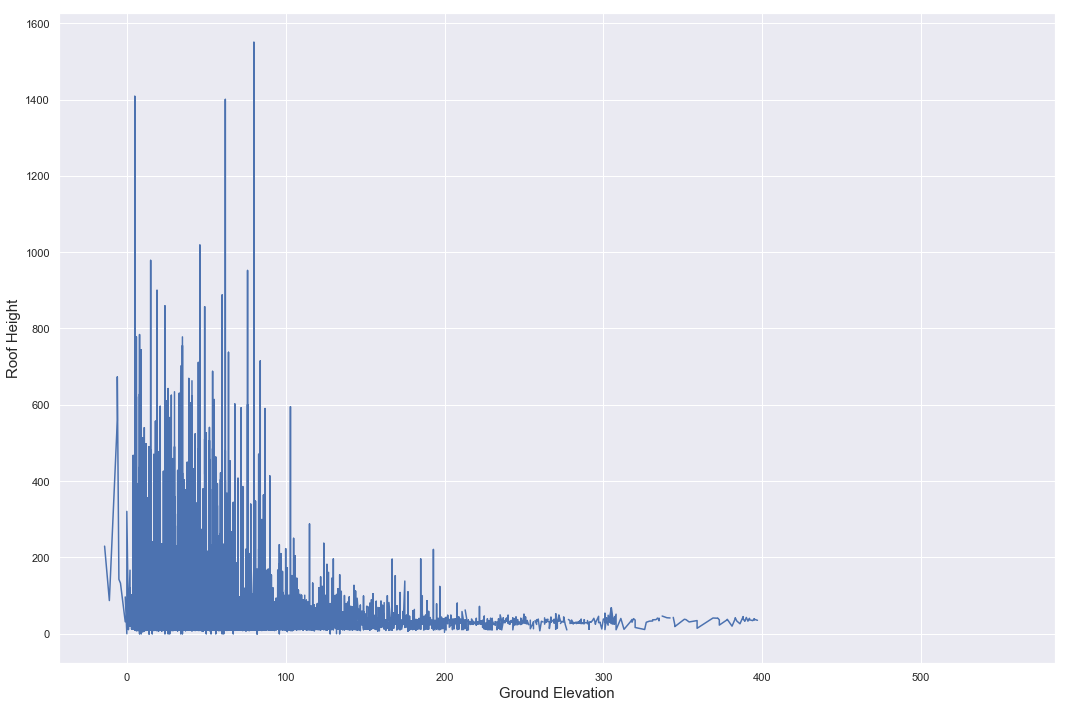

In [35]:
sort = building_footprints.sort_values(by='GROUNDELEV')

fig, ax = plt.subplots(figsize=(15,10))
sort.plot(x='GROUNDELEV', y='HEIGHTROOF', legend=False, ax=ax)
plt.xlabel('Ground Elevation', fontsize=15)
plt.ylabel('Roof Height', fontsize=15)
plt.tight_layout()
plt.savefig('figures/line-plot-1')

## Timeseries Plot

In [36]:
g = building_footprints.groupby('CNSTRCT_YR')['DOITT_ID'].count().reset_index()

g.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)

g.set_index('CNSTRCT_YR', drop=False, inplace=True)

g.index = g.index.astype('int64')

# transforming our 'Year' index to datetime
g.index = pd.to_datetime(g.index, format='%Y')

g.index.dtype

dtype('<M8[ns]')

In [37]:
g.head()

CNSTRCT_YR  count
2000-01-01      2000.0   4444
2001-01-01      2001.0   4742
2002-01-01      2002.0   4466
2003-01-01      2003.0   4736
2004-01-01      2004.0   6990

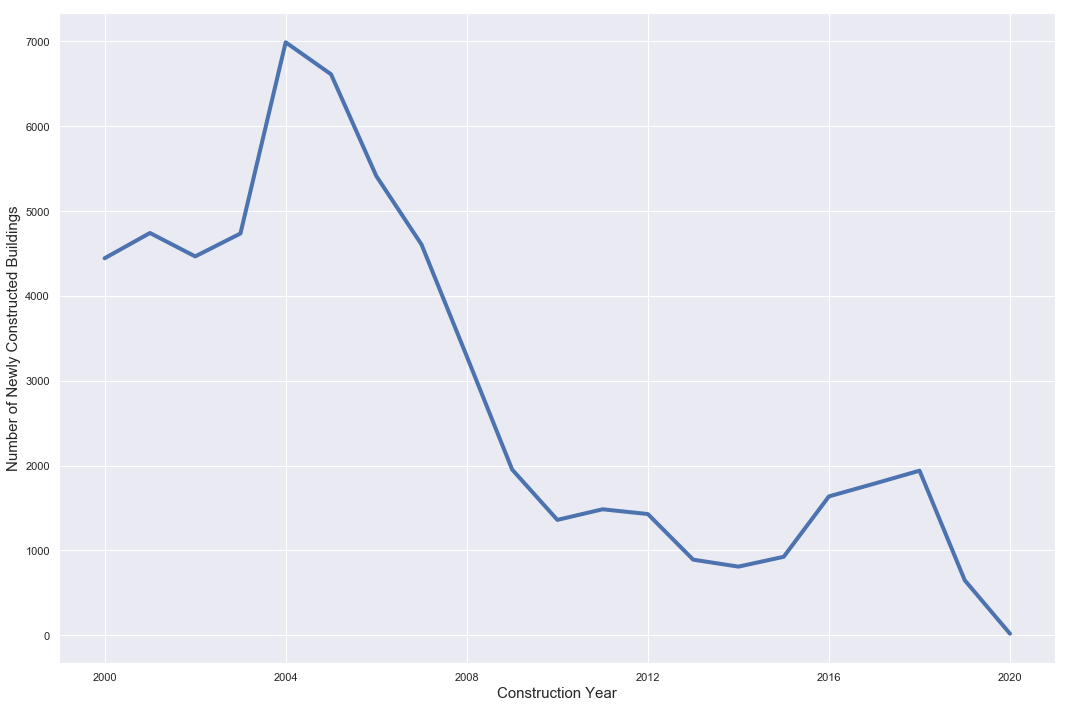

In [38]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g['count'], linewidth=4)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/line-plot-2')

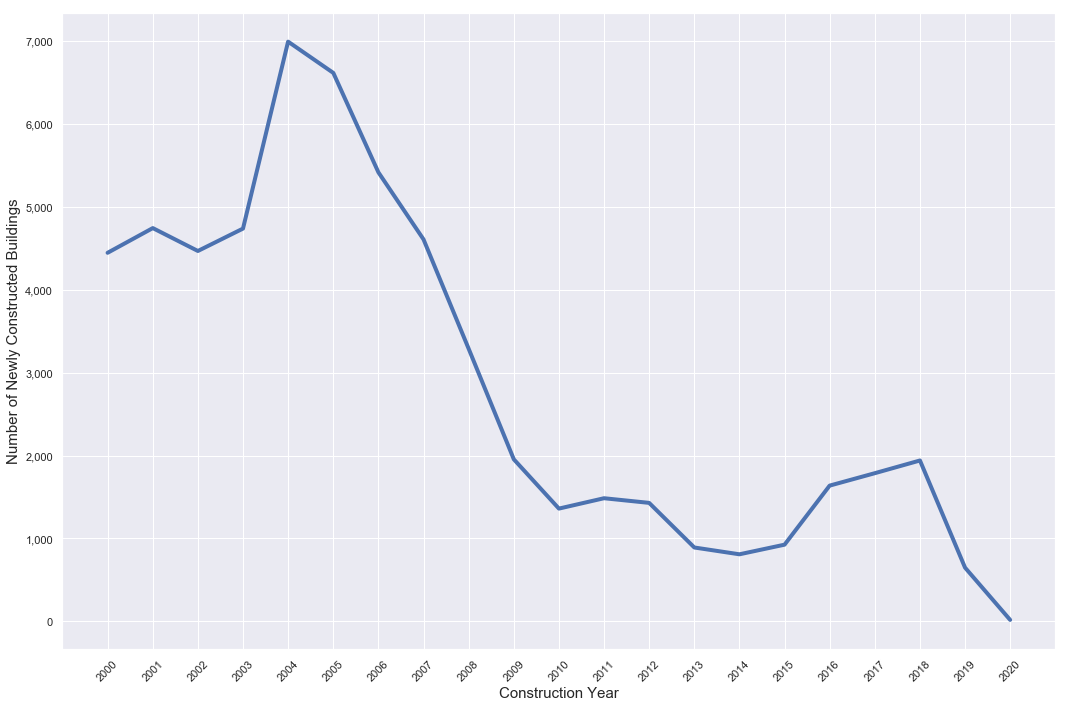

In [39]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g['count'], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
ax.xaxis.get_major_ticks()[1].label1.set_visible(False)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/line-plot-3')

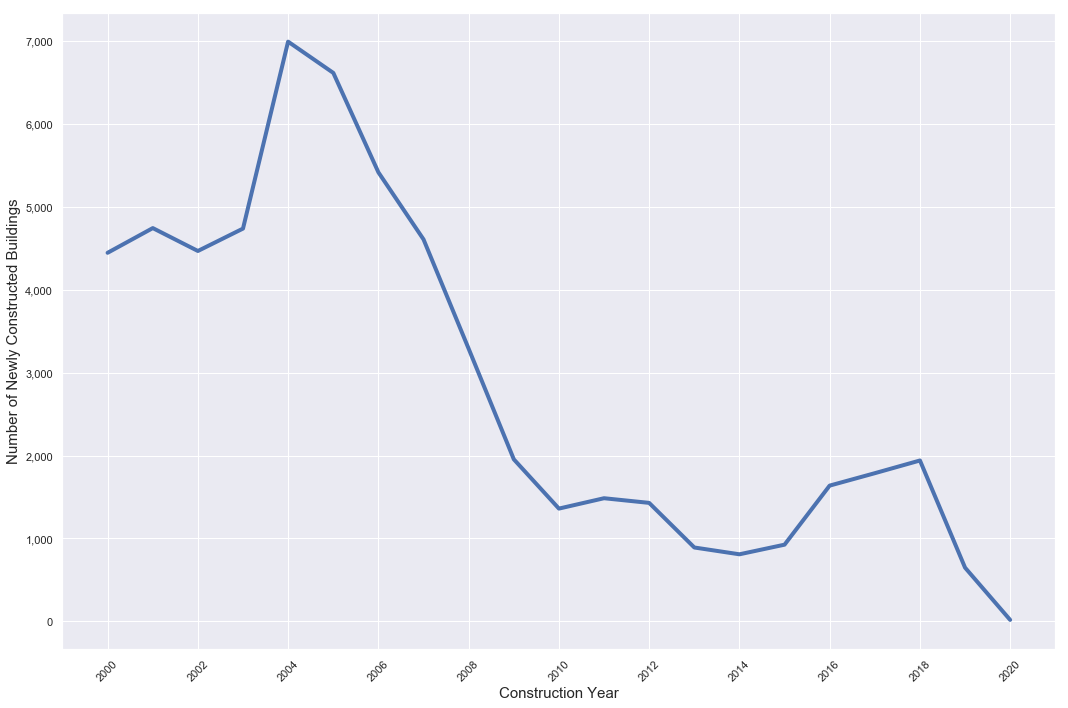

In [40]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g['count'], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_locator(mdates.YearLocator(2))
plt.xticks(rotation=45)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/line-plot-4')

In [41]:
table = pd.pivot_table(building_footprints, values='DOITT_ID', index=['CNSTRCT_YR'], 
                       columns = ['borough'], aggfunc=pd.Series.nunique)

table.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
table.index = table.index.astype('int64')
table.index = pd.to_datetime(table.index, format='%Y')

table.index.dtype

dtype('<M8[ns]')

In [42]:
table.head()

borough       BK   BX   MN    QN    SI
2000-01-01  1011  572  165   974  1722
2001-01-01   996  519  135   976  2116
2002-01-01  1051  682  132  1378  1223
2003-01-01  1183  578  122  1303  1550
2004-01-01  1794  761  115  2382  1938

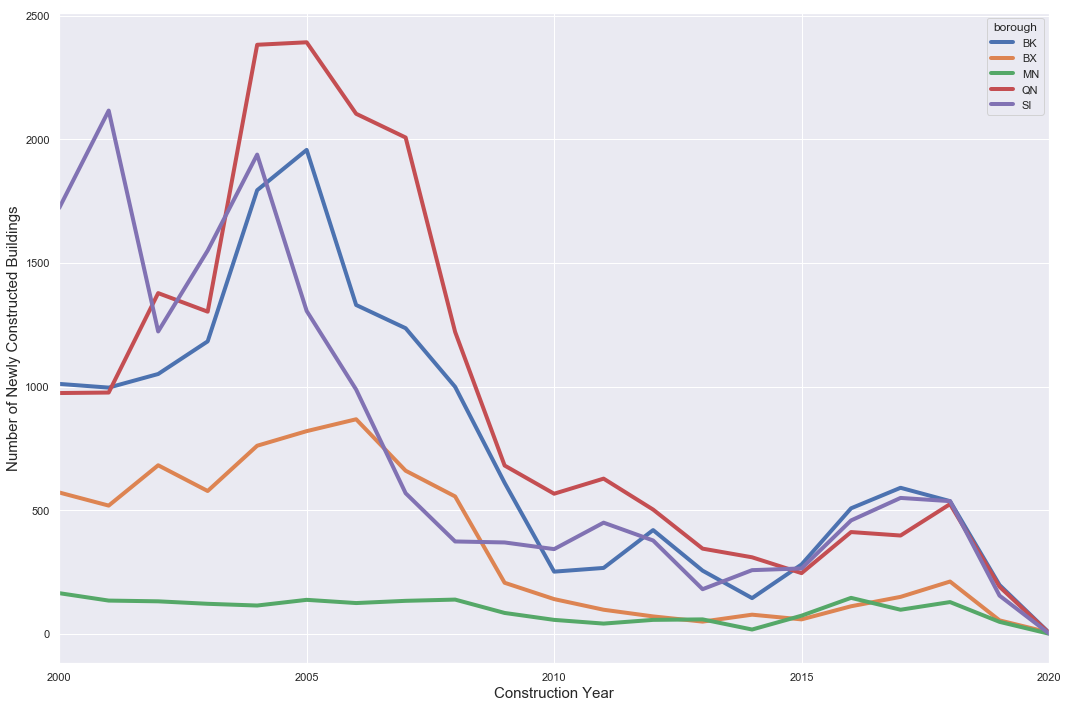

In [43]:
fig, ax = plt.subplots(figsize=(15,10))

table.plot(ax=ax, linewidth=4)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/line-plot-5')

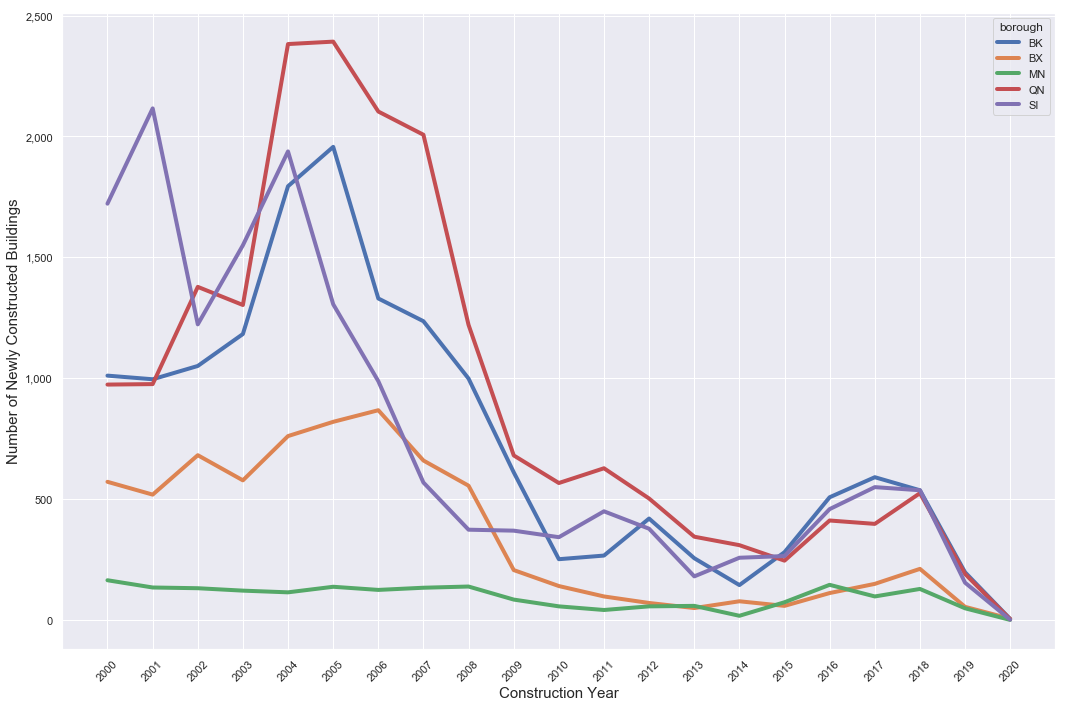

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(table[['BK','BX', 'MN', 'QN', 'SI']], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.legend(table[['BK','BX', 'MN', 'QN', 'SI']], title="borough")
ax.xaxis.get_major_ticks()[1].label1.set_visible(False)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/line-plot-6')

In [45]:
table_cumsum = table.cumsum()
table_cumsum.head()

borough       BK    BX   MN    QN    SI
2000-01-01  1011   572  165   974  1722
2001-01-01  2007  1091  300  1950  3838
2002-01-01  3058  1773  432  3328  5061
2003-01-01  4241  2351  554  4631  6611
2004-01-01  6035  3112  669  7013  8549

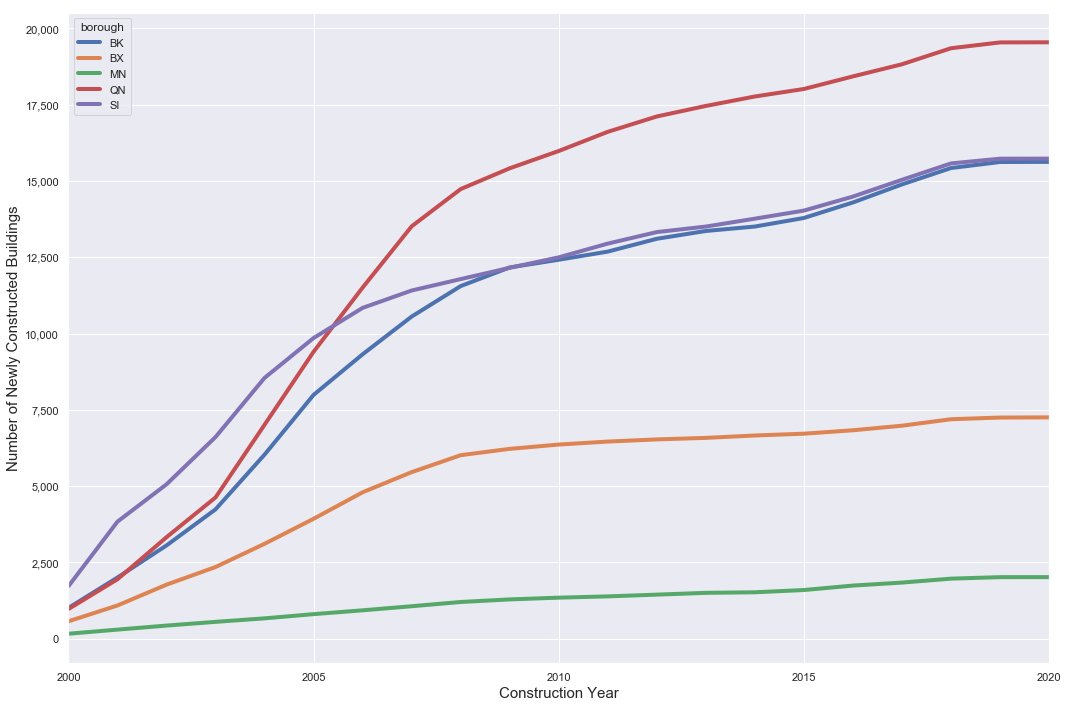

In [46]:
fig, ax = plt.subplots(figsize=(15,10))

table_cumsum.plot(ax=ax, linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/line-plot-7')

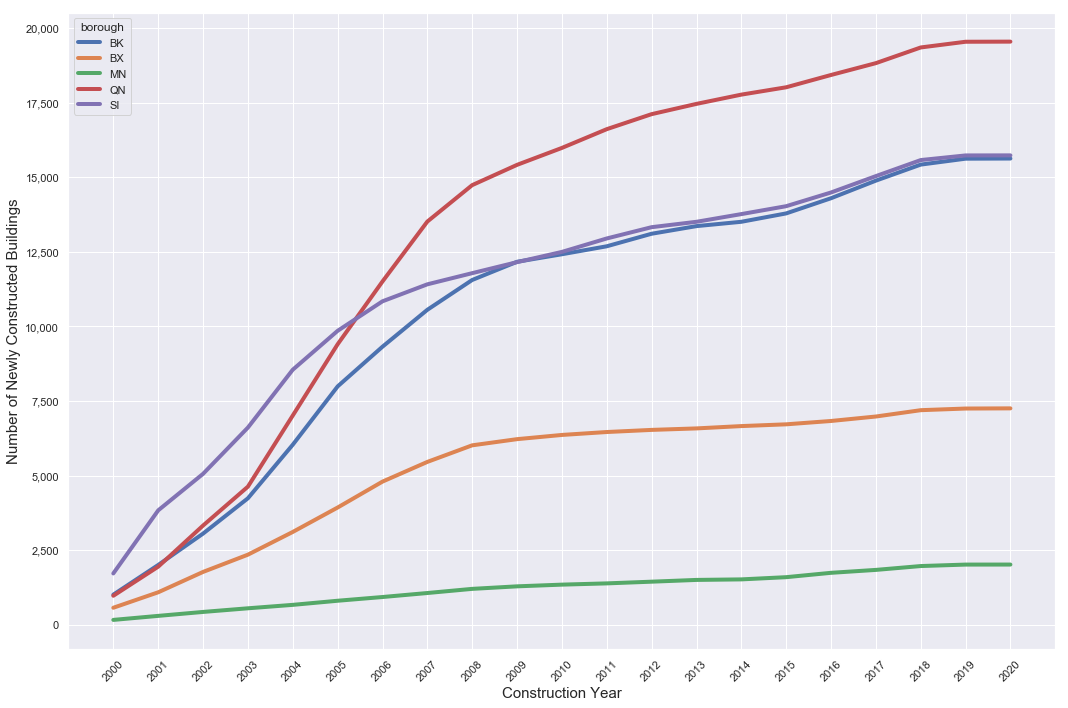

In [47]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(table_cumsum[['BK','BX', 'MN', 'QN', 'SI']], linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.legend(table_cumsum[['BK','BX', 'MN', 'QN', 'SI']], title='borough')
ax.xaxis.get_major_ticks()[1].label1.set_visible(False)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/line-plot-8')

## Bar Plot

In [48]:
bar = building_footprints.groupby('borough')['DOITT_ID'].count()
bar.rename("count", inplace=True)
bar.sort_values(ascending=False, inplace=True)
bar

borough
QN    19546
SI    15734
BK    15628
BX     7255
MN     2020
Name: count, dtype: int64

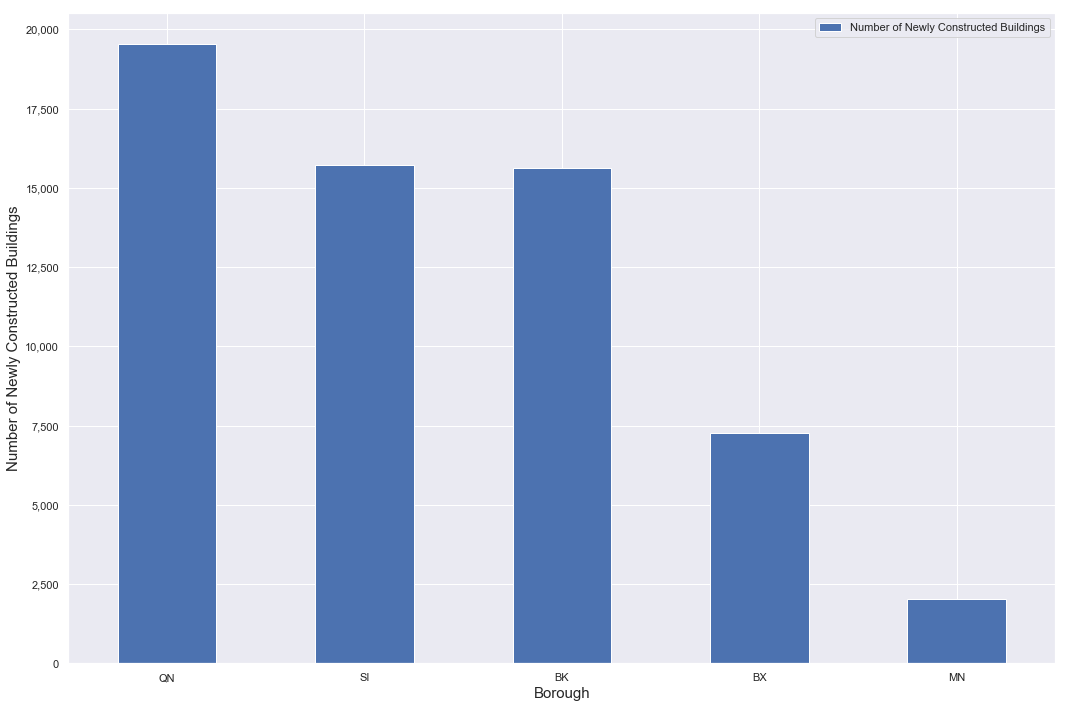

In [49]:
fig, ax = plt.subplots(figsize=(15,10))

bar.plot(kind='bar', ax=ax, label='Number of Newly Constructed Buildings')
# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0)

plt.legend()
plt.xlabel('Borough', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/bar-plot-1')

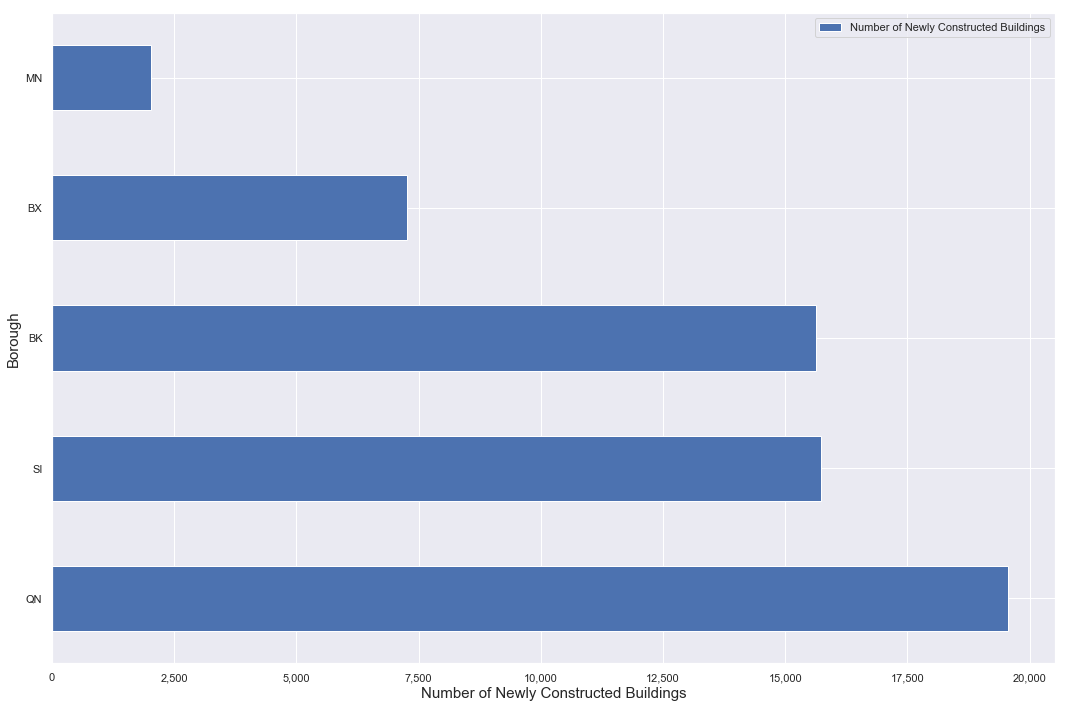

In [50]:
fig, ax = plt.subplots(figsize=(15,10))

bar.plot.barh(ax=ax, label='Number of Newly Constructed Buildings')
plt.xticks(rotation=0)

# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.legend()
plt.xlabel('Number of Newly Constructed Buildings', fontsize=15)
plt.ylabel('Borough', fontsize=15)
plt.tight_layout()
plt.savefig('figures/bar-plot-2')

In [51]:
table = pd.pivot_table(building_footprints, values='DOITT_ID', index=['CNSTRCT_YR'], 
                       columns = ['borough'], aggfunc=pd.Series.nunique)

table.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
table.index = table.index.astype('int64')
#table.index = pd.to_datetime(table.index, format='%Y')

table.index.dtype

dtype('int64')

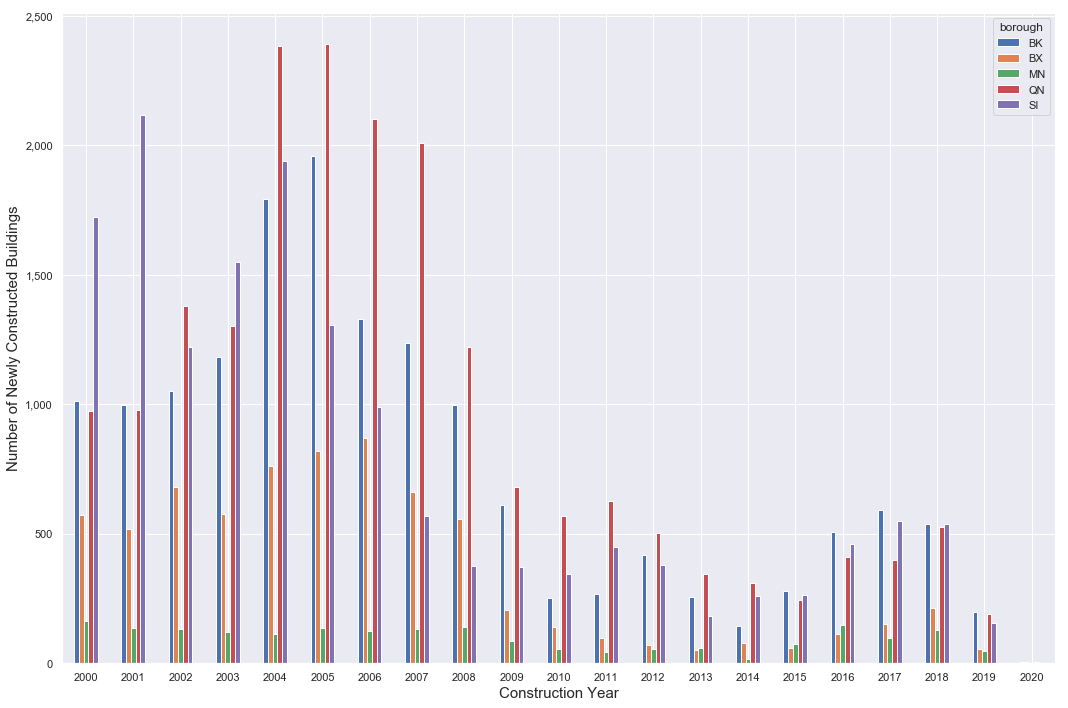

In [52]:
fig, ax = plt.subplots(figsize=(15,10))

table.plot(kind='bar', ax=ax)
plt.xticks(rotation=0)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/bar-plot-3')

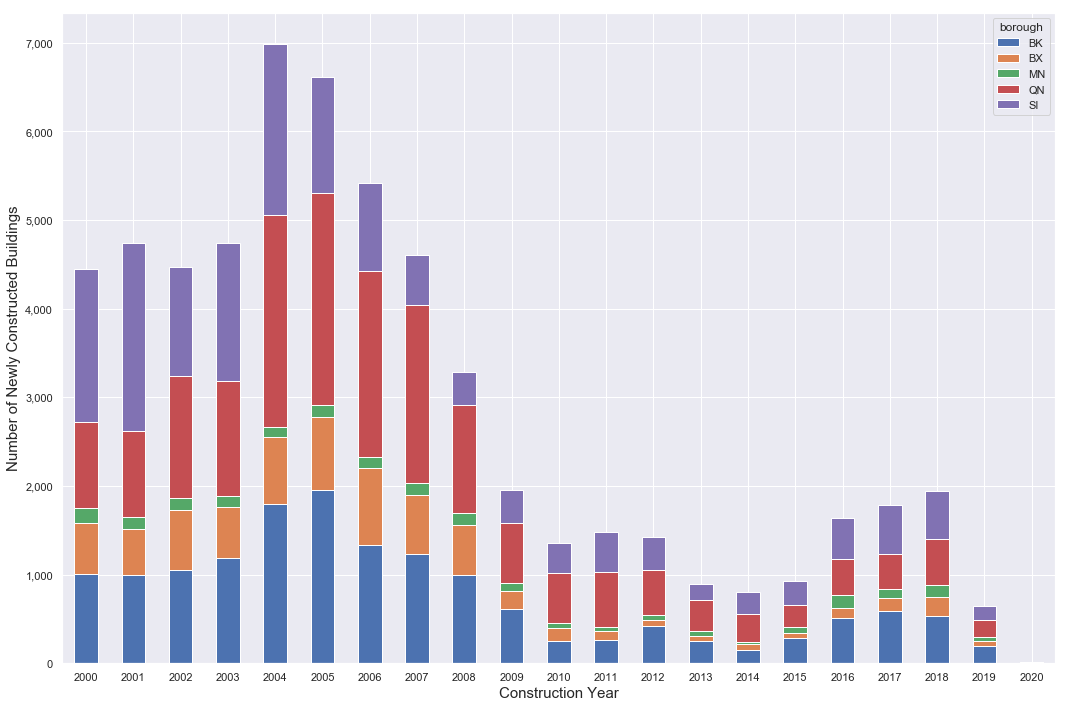

In [53]:
fig, ax = plt.subplots(figsize=(15,10))

table.plot.bar(stacked=True, ax=ax)
plt.xticks(rotation=0)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/bar-plot-4')

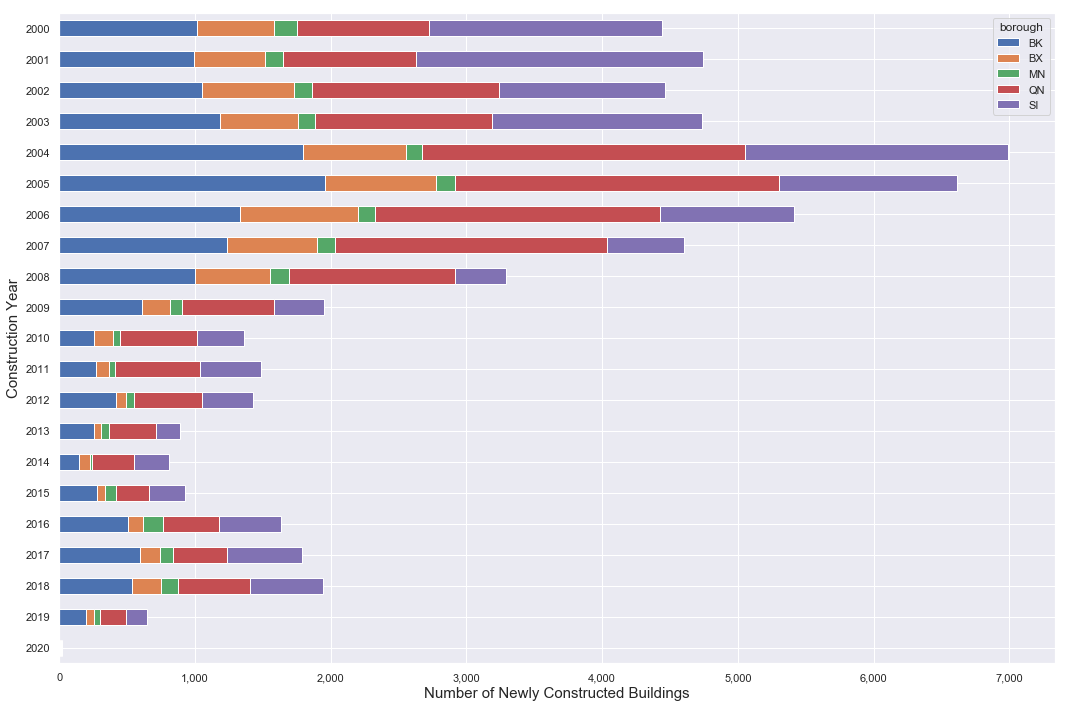

In [54]:
fig, ax = plt.subplots(figsize=(15,10))

table.sort_index(ascending=False).plot.barh(stacked=True, ax=ax)
plt.xticks(rotation=0)

# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Number of Newly Constructed Buildings', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.tight_layout()
plt.savefig('figures/bar-plot-5')

## Histograms

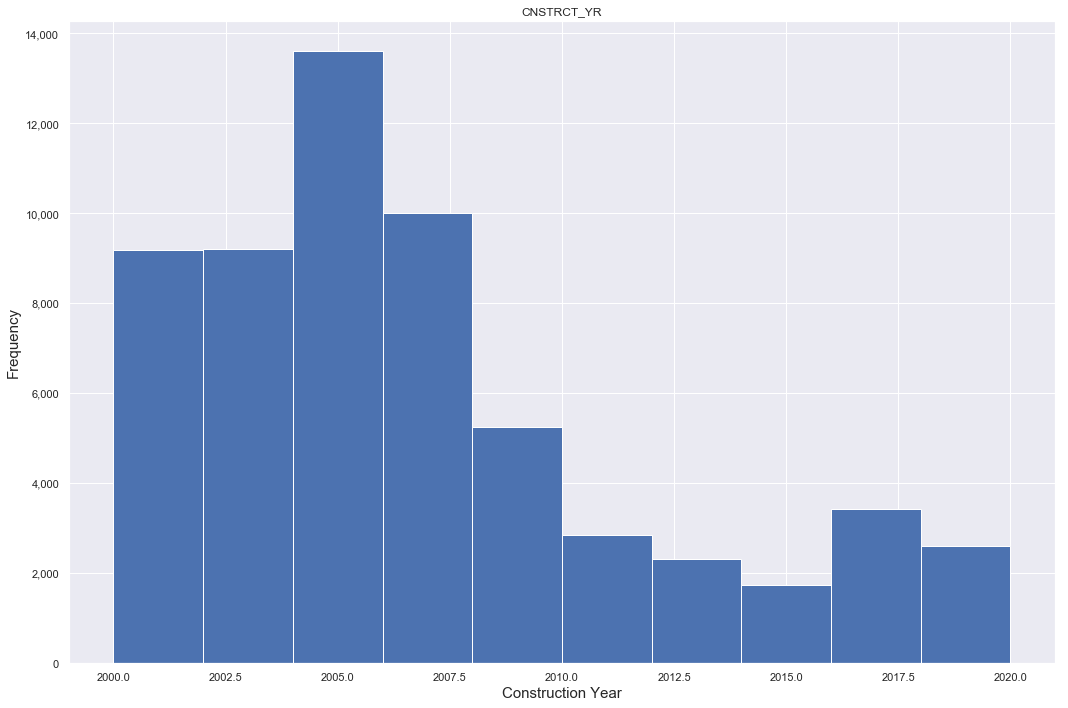

In [55]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints.hist(ax=ax, column='CNSTRCT_YR')

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/hist-plot-1')

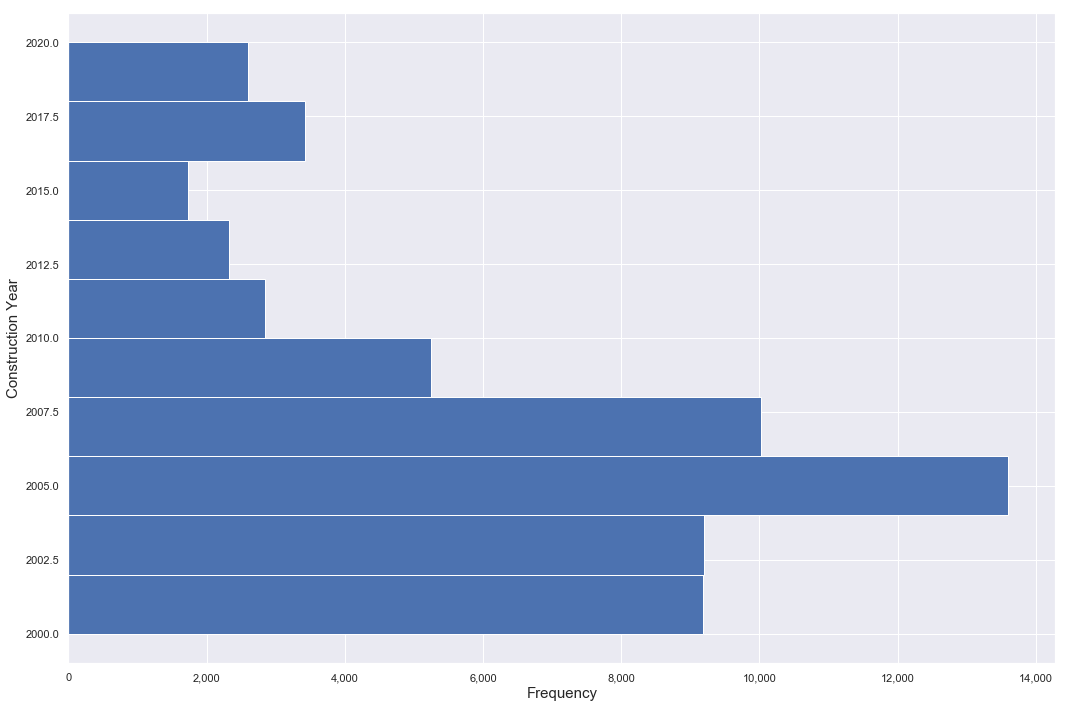

In [56]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints['CNSTRCT_YR'].plot.hist(orientation='horizontal', cumulative=False)

# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.tight_layout()
plt.savefig('figures/hist-plot-2')

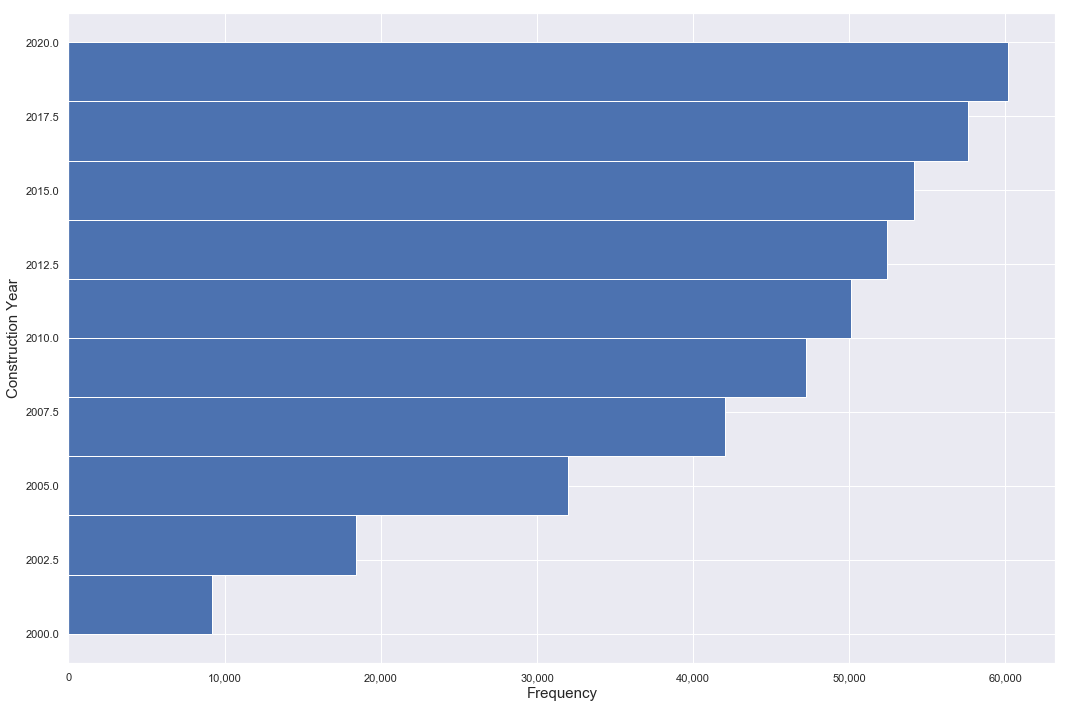

In [57]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints['CNSTRCT_YR'].plot.hist(orientation='horizontal', cumulative=True)

# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.tight_layout()
plt.savefig('figures/hist-plot-3')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:377: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


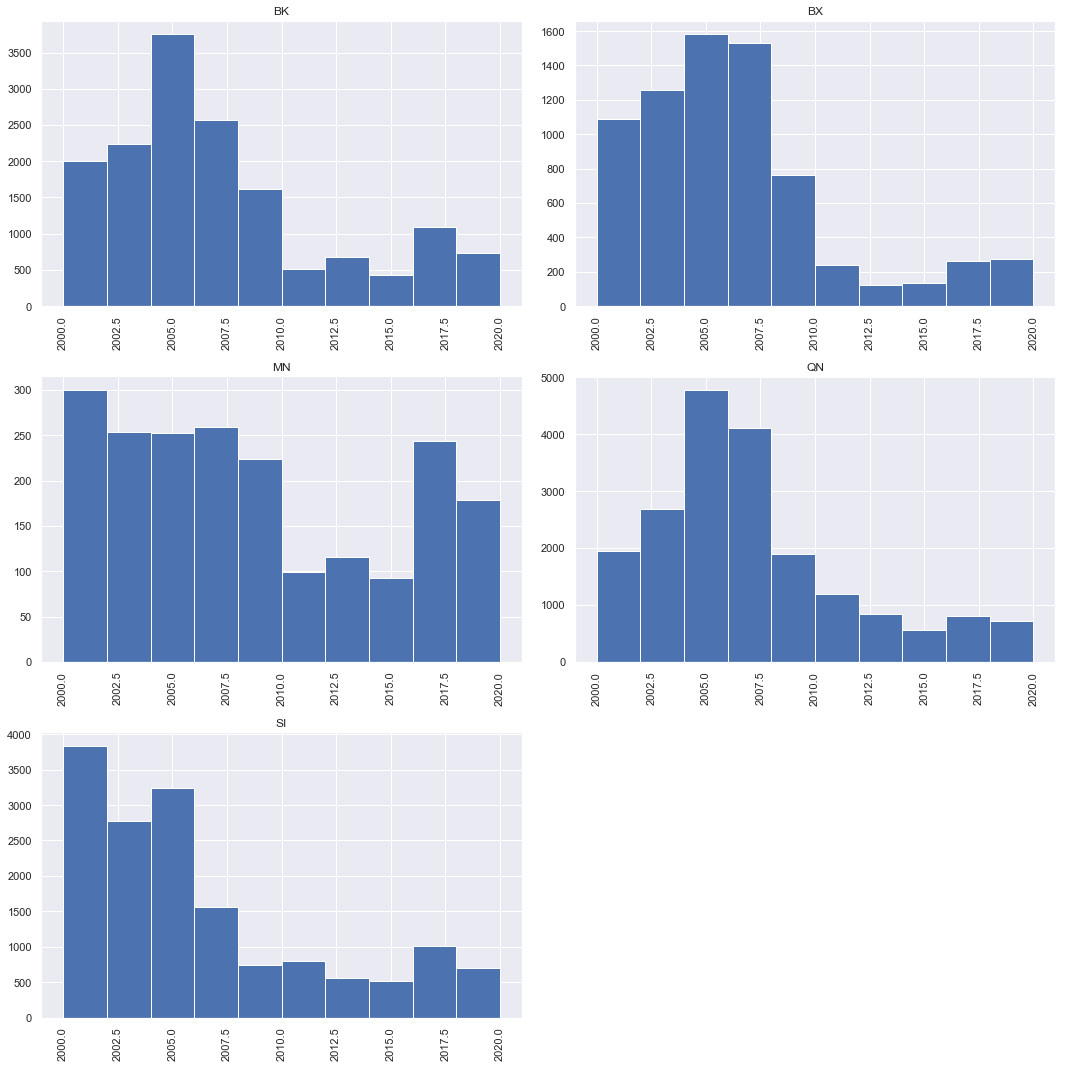

In [58]:
fig, ax = plt.subplots(figsize=(15,15))

building_footprints.hist(ax=ax, column='CNSTRCT_YR', by='borough')

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/hist-plot-4')

In [59]:
mn = building_footprints.loc[(building_footprints['borough'].isin(["MN"]))]
bk = building_footprints.loc[(building_footprints['borough'].isin(["BK"]))]
bx = building_footprints.loc[(building_footprints['borough'].isin(["BX"]))]
qn = building_footprints.loc[(building_footprints['borough'].isin(["QN"]))]
si = building_footprints.loc[(building_footprints['borough'].isin(["SI"]))]

mn = mn['CNSTRCT_YR']
mn.rename('MN', inplace=True)

bk = bk['CNSTRCT_YR']
bk.rename('BK', inplace=True)

bx = bx['CNSTRCT_YR']
bx.rename('BX', inplace=True)

qn = qn['CNSTRCT_YR']
qn.rename('QN', inplace=True)

si = si['CNSTRCT_YR']
si.rename('SI', inplace=True)

3        2001.0
5        2000.0
7        2000.0
27       2006.0
30       2007.0
          ...  
60103    2017.0
60174    2020.0
60180    2017.0
60181    2017.0
60182    2017.0
Name: SI, Length: 15734, dtype: float64

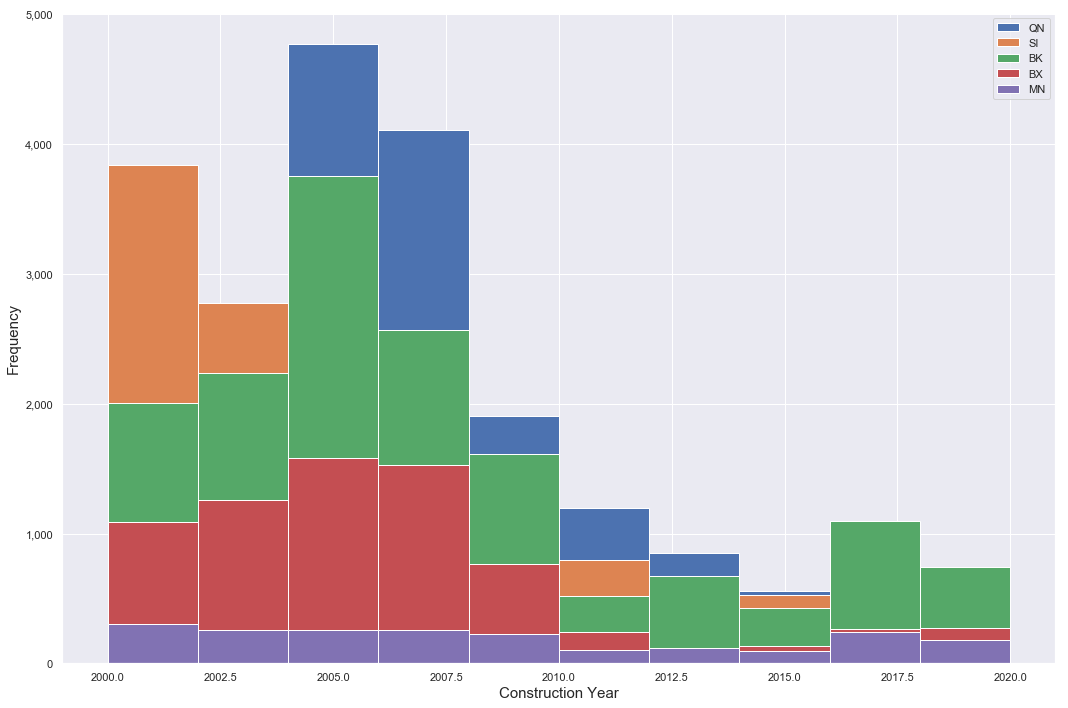

In [60]:
fig, ax = plt.subplots(figsize=(15,10))

qn.plot.hist(ax=ax)
si.plot.hist(ax=ax)
bk.plot.hist(ax=ax)
bx.plot.hist(ax=ax)
mn.plot.hist(ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.legend()

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/hist-plot-5')

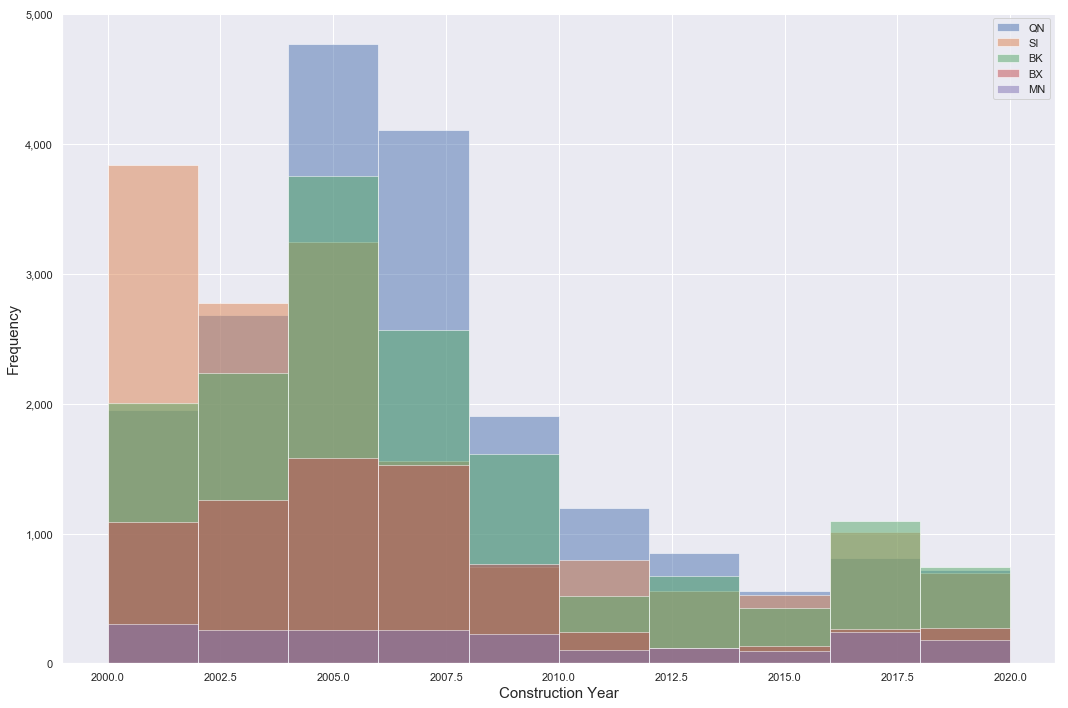

In [61]:
fig, ax = plt.subplots(figsize=(15,10))

qn.plot.hist(ax=ax, alpha=0.5)
si.plot.hist(ax=ax, alpha=0.5)
bk.plot.hist(ax=ax, alpha=0.5)
bx.plot.hist(ax=ax, alpha=0.5)
mn.plot.hist(ax=ax, alpha=0.5)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.legend()

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/hist-plot-6')

## Box Plot 

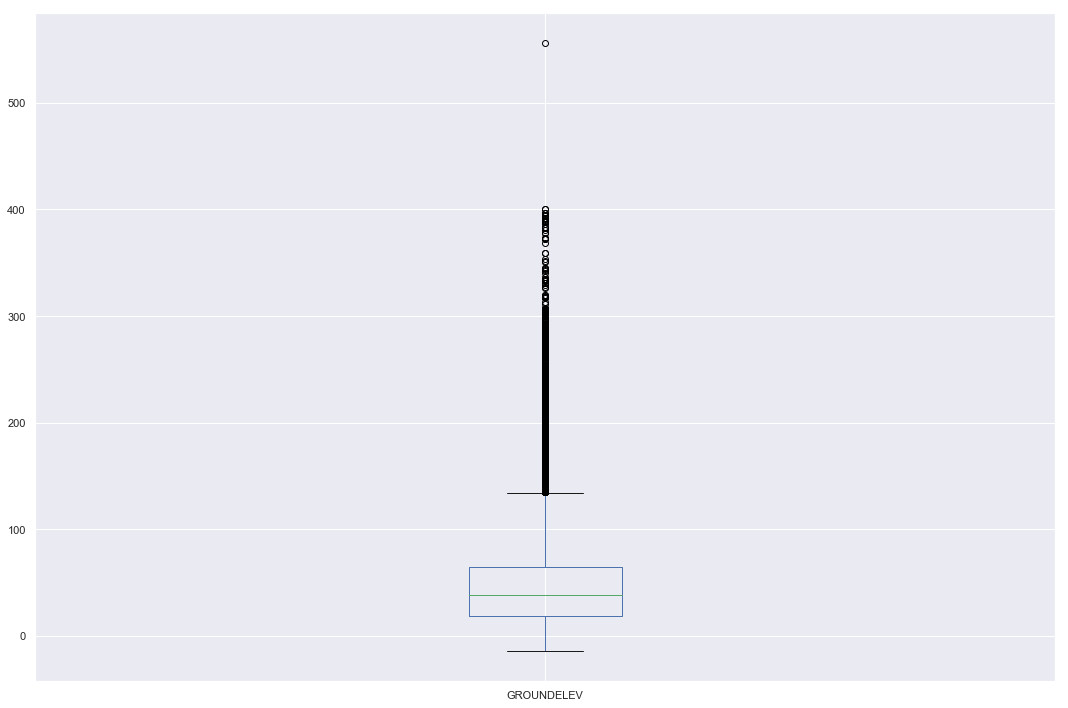

In [62]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints['GROUNDELEV'].plot.box(ax=ax)
plt.tight_layout()
plt.savefig('figures/box-plot-1')

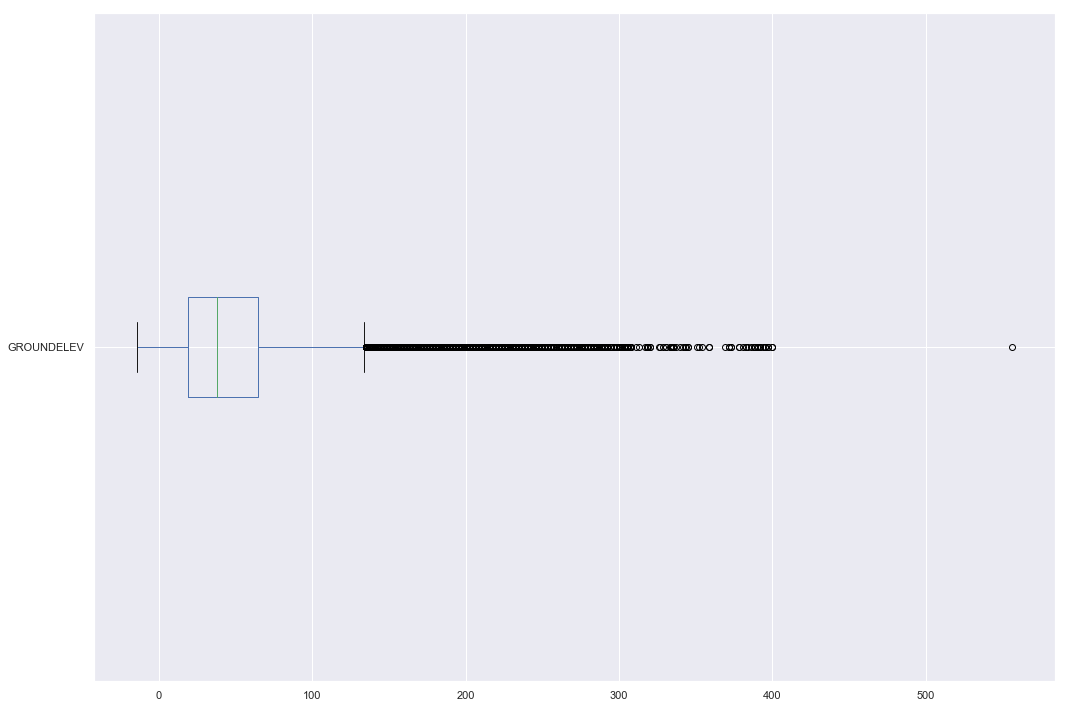

In [63]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints['GROUNDELEV'].plot.box(vert=False, ax=ax)
plt.tight_layout()
plt.savefig('figures/box-plot-2')

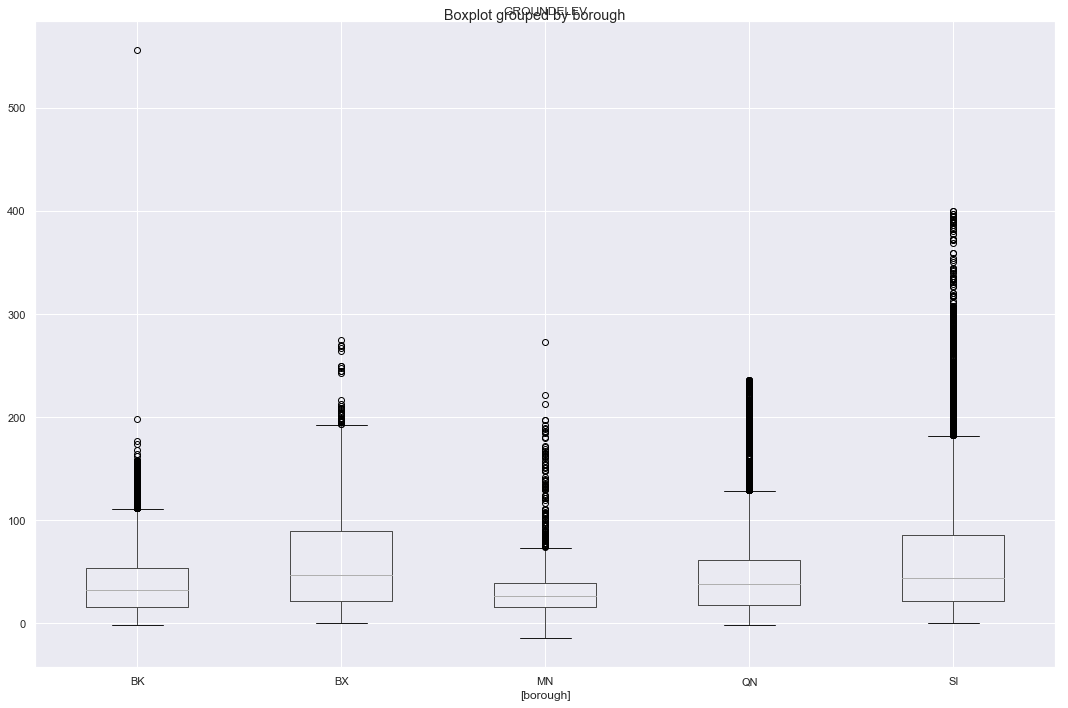

In [64]:
building_footprints_box = building_footprints[['borough', 'GROUNDELEV']]

fig, ax = plt.subplots(figsize=(15,10))

building_footprints_box.boxplot(by='borough', ax=ax)
plt.tight_layout()
plt.savefig('figures/box-plot-3')

## Kernel Density Estimate Plot

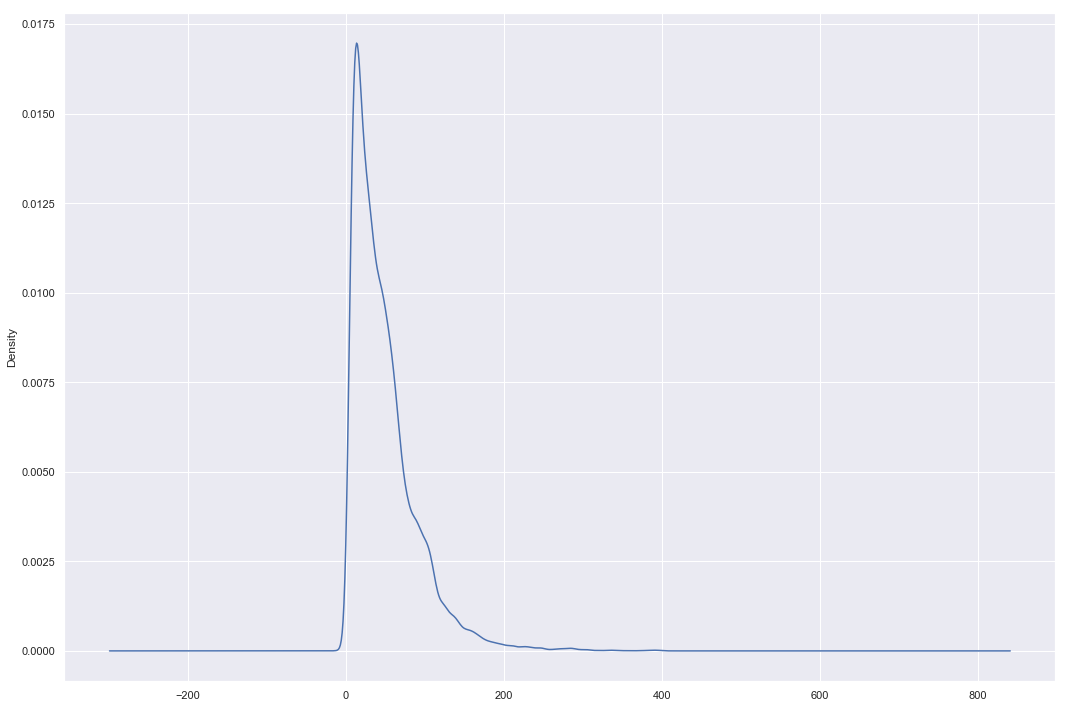

In [65]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints['GROUNDELEV'].plot.kde(ax=ax)
plt.tight_layout()
plt.savefig('figures/kde-plot-1')

## Area Plot

In [66]:
area = pd.pivot_table(building_footprints, values='DOITT_ID', index=['CNSTRCT_YR'], 
                       columns = ['borough'], aggfunc=pd.Series.nunique)

area.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
area.head()

borough       BK   BX   MN    QN    SI
CNSTRCT_YR                            
2000.0      1011  572  165   974  1722
2001.0       996  519  135   976  2116
2002.0      1051  682  132  1378  1223
2003.0      1183  578  122  1303  1550
2004.0      1794  761  115  2382  1938

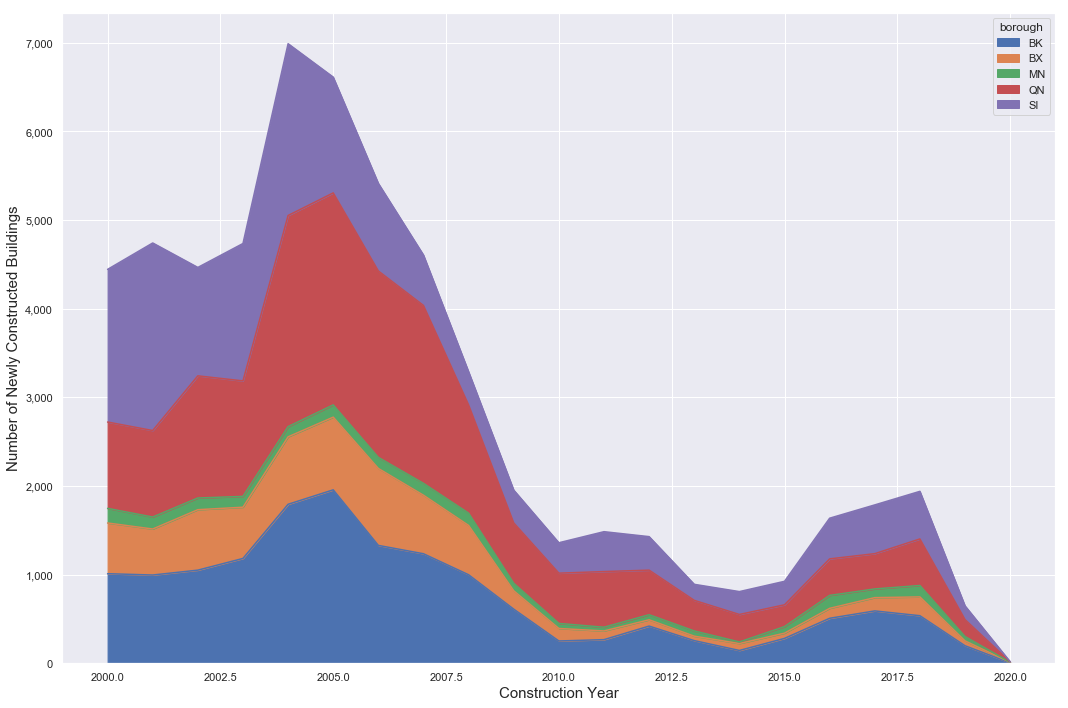

In [67]:
fig, ax = plt.subplots(figsize=(15,10))

area.plot.area(ax=ax)
# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/area-plot-1')

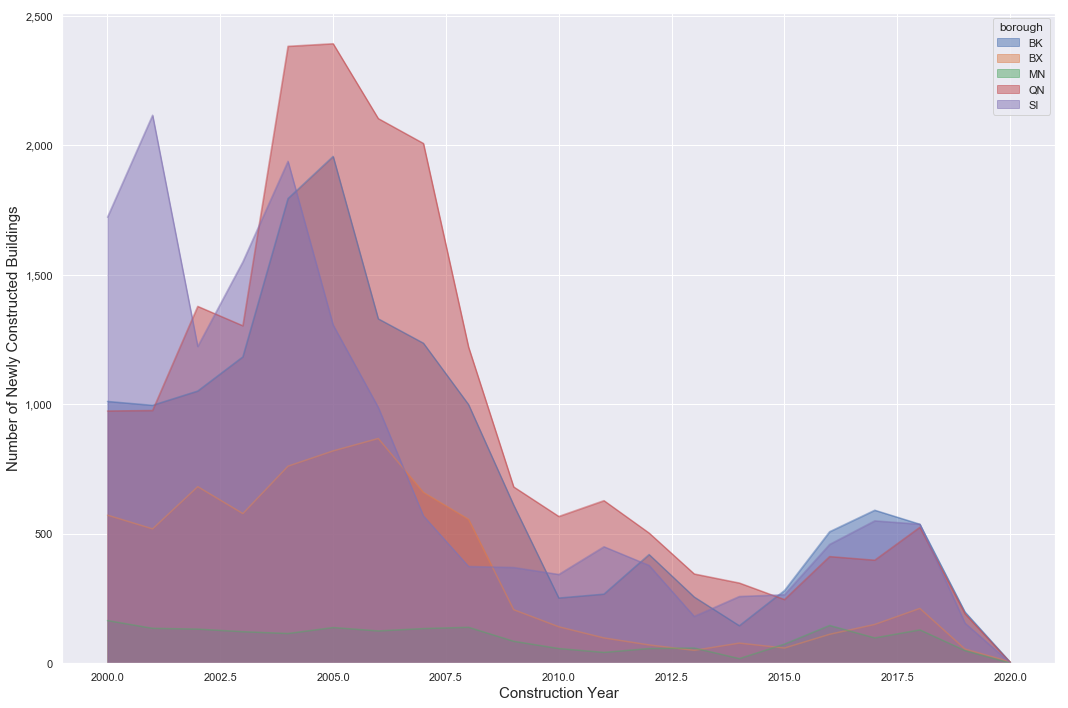

In [68]:
fig, ax = plt.subplots(figsize=(15,10))

area.plot.area(ax=ax, stacked=False)
# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/area-plot-2')

In [69]:
area_cumsum = area.cumsum()
area_cumsum.head()

borough       BK    BX   MN    QN    SI
CNSTRCT_YR                             
2000.0      1011   572  165   974  1722
2001.0      2007  1091  300  1950  3838
2002.0      3058  1773  432  3328  5061
2003.0      4241  2351  554  4631  6611
2004.0      6035  3112  669  7013  8549

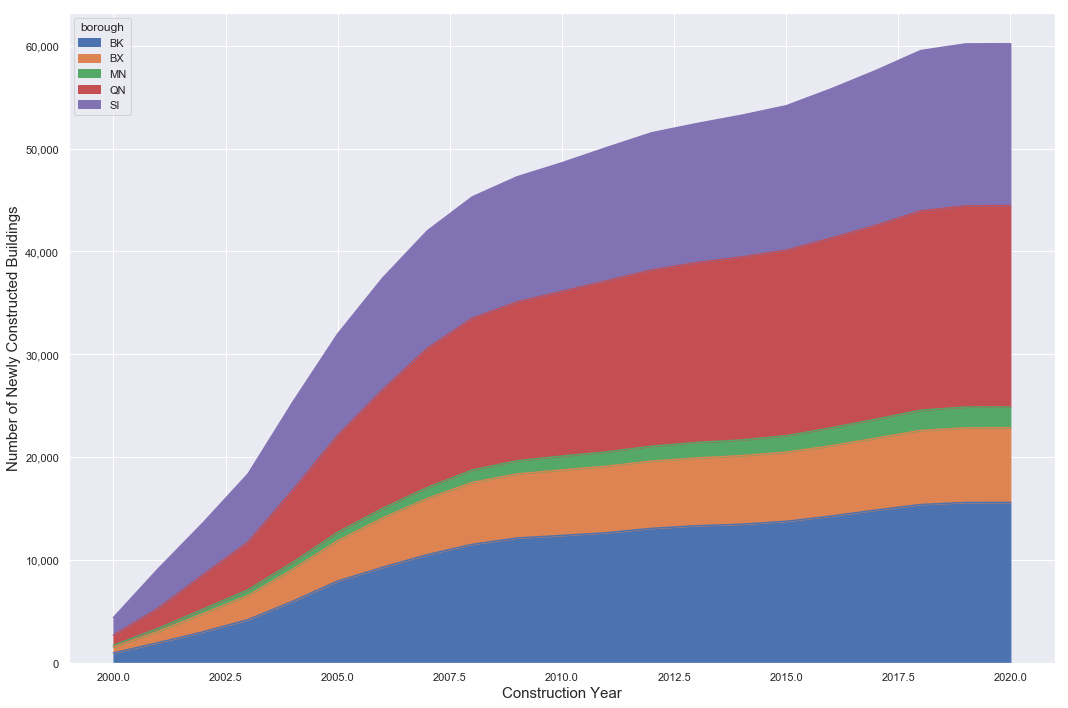

In [70]:
fig, ax = plt.subplots(figsize=(15,10))

area_cumsum.plot.area(ax=ax)
# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/area-plot-3')

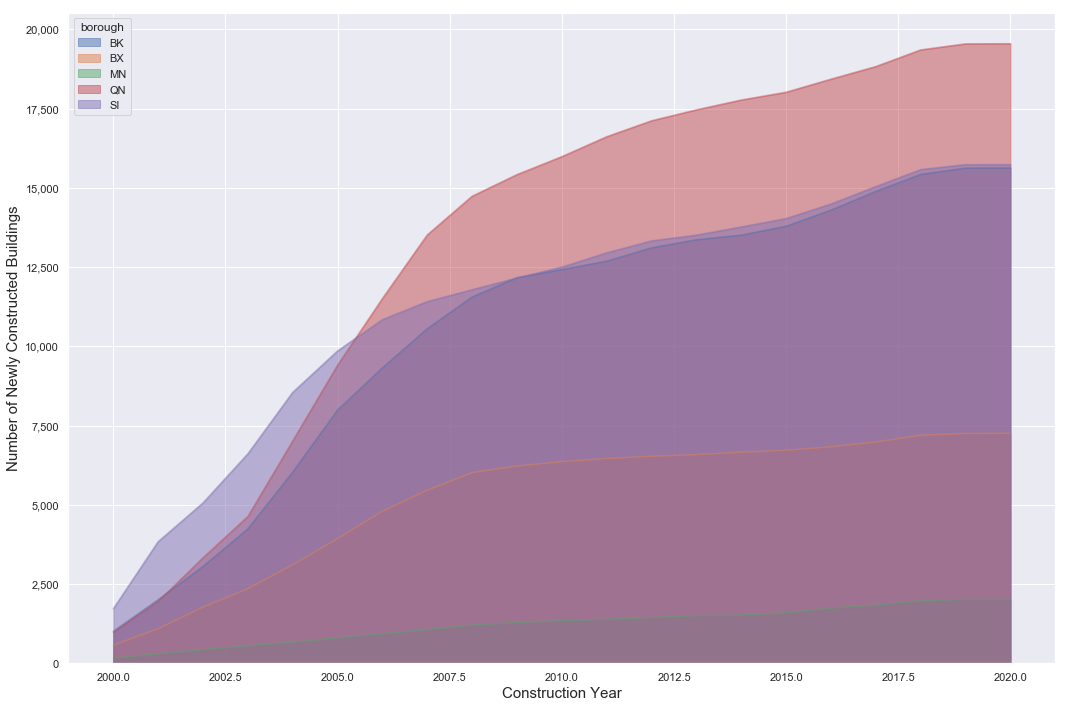

In [71]:
fig, ax = plt.subplots(figsize=(15,10))

area_cumsum.plot.area(ax=ax, stacked=False)
# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/area-plot-4')

## Scatter Plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


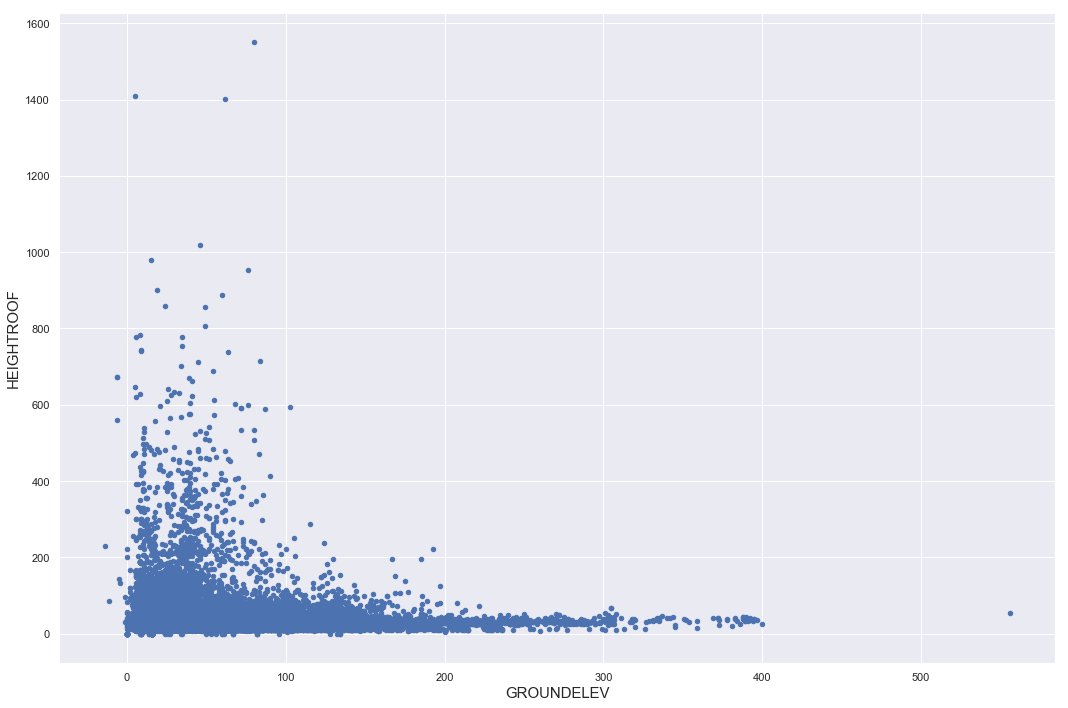

In [72]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/scatter-plot-1')

In [73]:
mn = building_footprints.loc[(building_footprints['borough'].isin(["MN"]))]
bk = building_footprints.loc[(building_footprints['borough'].isin(["BK"]))]
bx = building_footprints.loc[(building_footprints['borough'].isin(["BX"]))]
qn = building_footprints.loc[(building_footprints['borough'].isin(["QN"]))]
si = building_footprints.loc[(building_footprints['borough'].isin(["SI"]))]

mn = mn[['GROUNDELEV', 'HEIGHTROOF']]

bk = bk[['GROUNDELEV', 'HEIGHTROOF']]

bx = bx[['GROUNDELEV', 'HEIGHTROOF']]

qn = qn[['GROUNDELEV', 'HEIGHTROOF']]

si = si[['GROUNDELEV', 'HEIGHTROOF']]

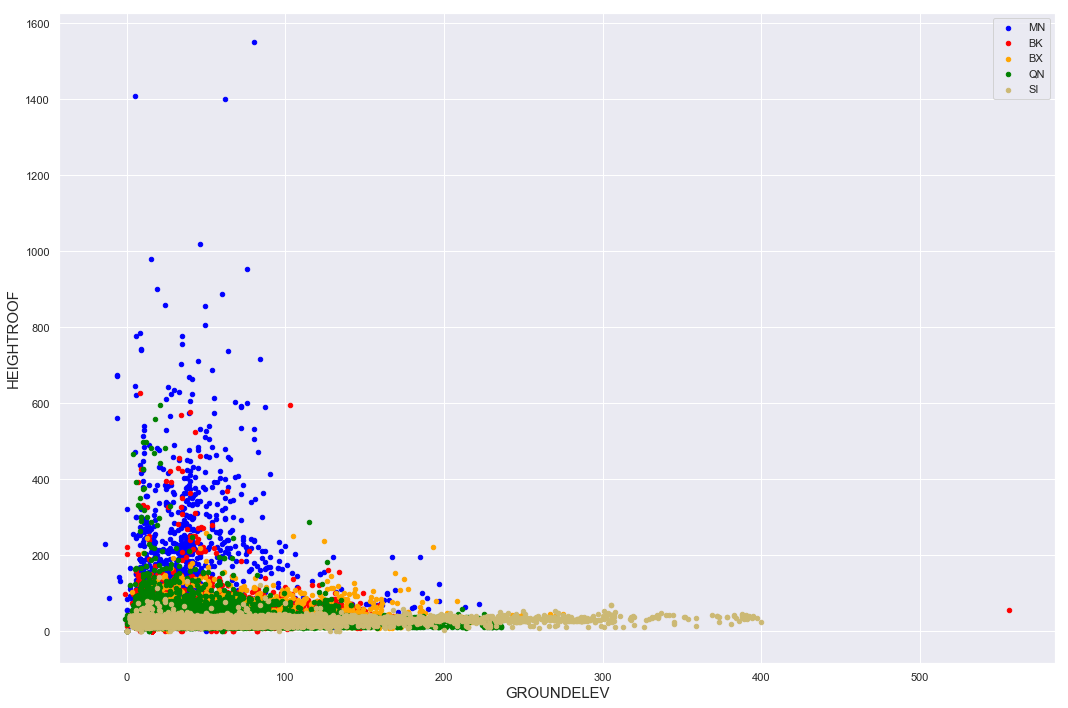

In [74]:
fig, ax = plt.subplots(figsize=(15,10))

mn.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='blue', label='MN', ax=ax)
bk.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='red', label='BK', ax=ax)
bx.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='orange', label='BX', ax=ax)
qn.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='green', label='QN', ax=ax)
si.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='y', label='SI', ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/scatter-plot-2')

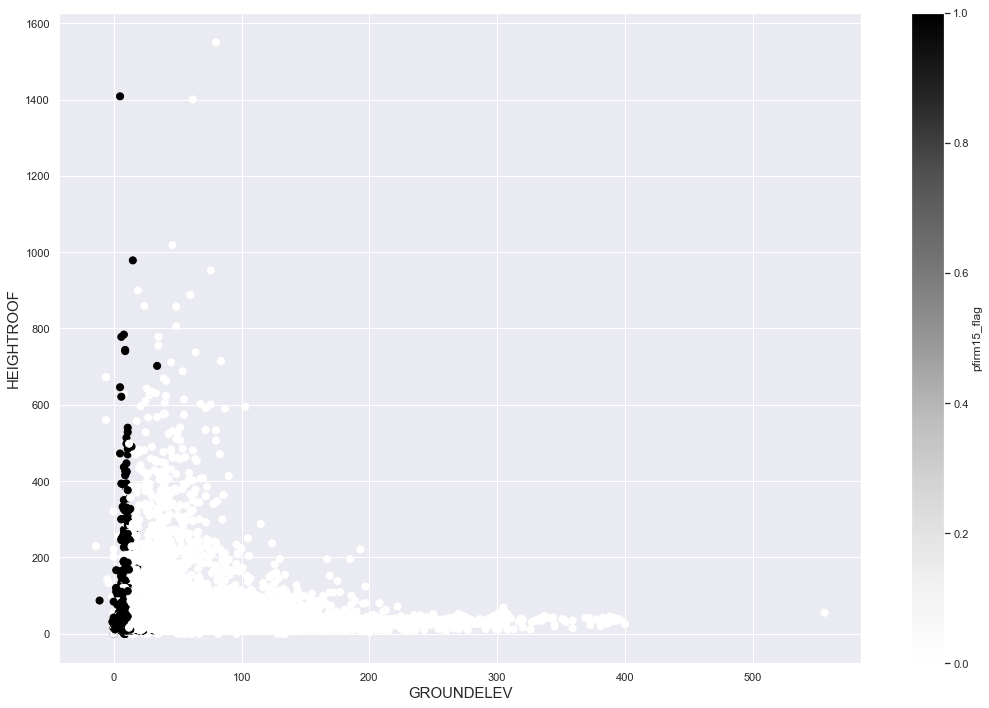

In [75]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', c='pfirm15_flag', s=50, ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/scatter-plot-3')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


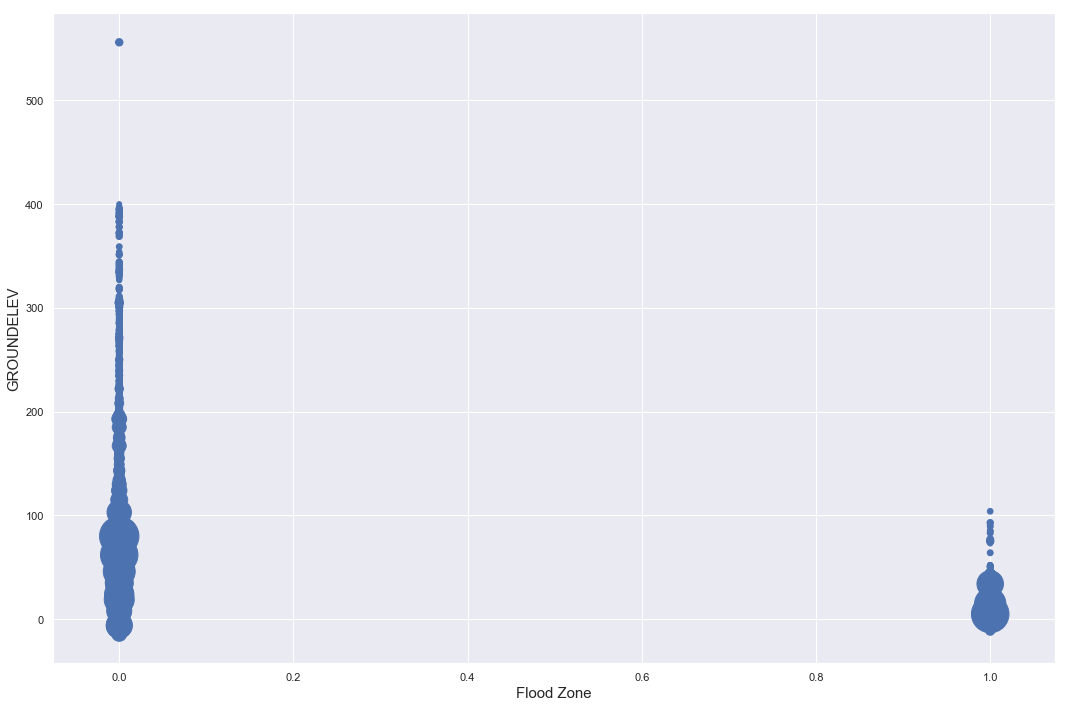

In [76]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints.plot.scatter(x='pfirm15_flag', y='GROUNDELEV', s=building_footprints['HEIGHTROOF'], ax=ax)

plt.xlabel('Flood Zone', fontsize=15)
plt.ylabel('GROUNDELEV', fontsize=15)
plt.tight_layout()
plt.savefig('figures/scatter-plot-4')

## Hexagonal Bin Plot

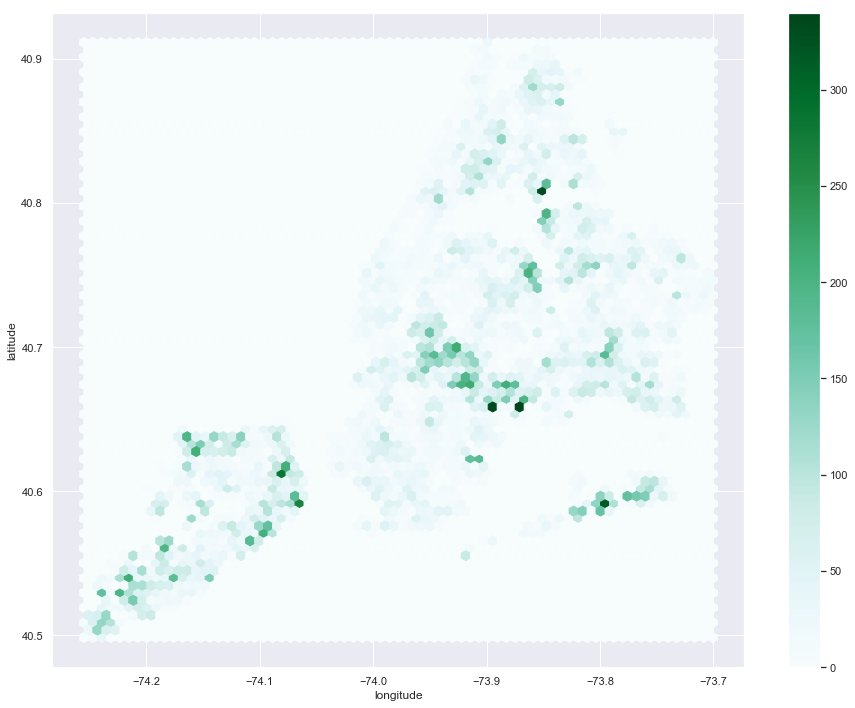

In [77]:
fig, ax = plt.subplots(figsize=(13,10))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                gridsize=70, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/hexbin-plot-1')

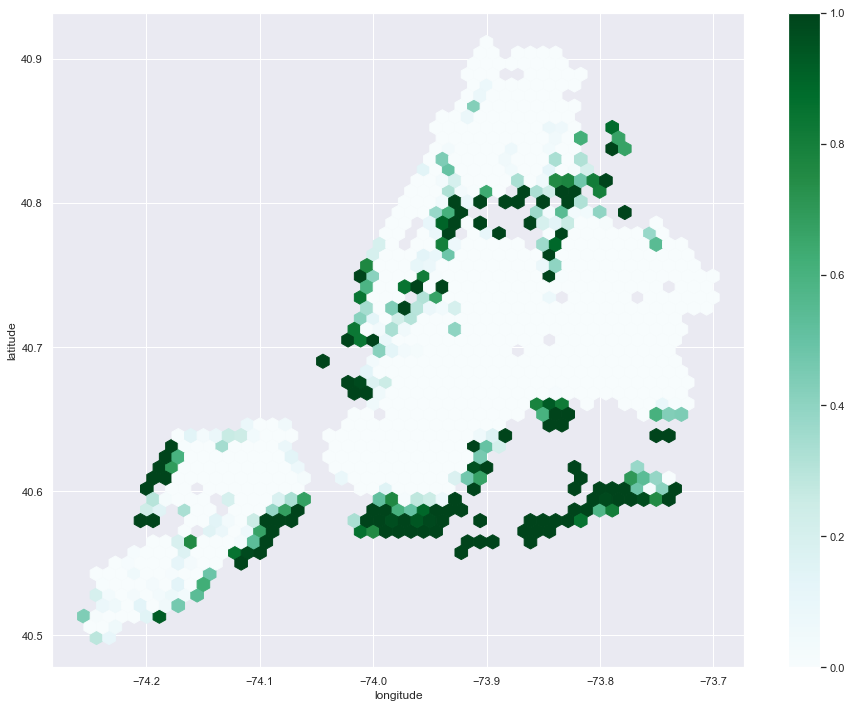

In [78]:
fig, ax = plt.subplots(figsize=(13,10))

building_footprints.plot.hexbin(x='longitude', y='latitude', 
                                C='pfirm15_flag', 
                                gridsize=50, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/hexbin-plot-2')

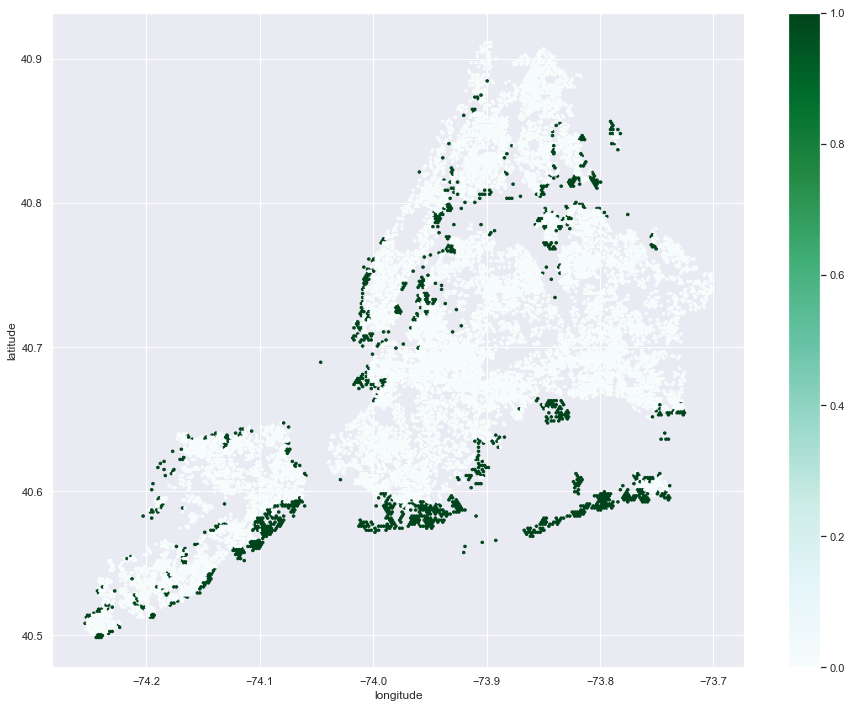

In [79]:
fig, ax = plt.subplots(figsize=(13,10))

building_footprints.plot.hexbin(x='longitude', y='latitude', 
                                C='pfirm15_flag', 
                                reduce_C_function=np.max, 
                                gridsize=255, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/hexbin-plot-3')

## Pie Plot

In [80]:
pie = building_footprints.groupby('borough')['DOITT_ID'].count()
pie.rename("count", inplace=True)
pie.sort_values(ascending=False, inplace=True)
pie

borough
QN    19546
SI    15734
BK    15628
BX     7255
MN     2020
Name: count, dtype: int64

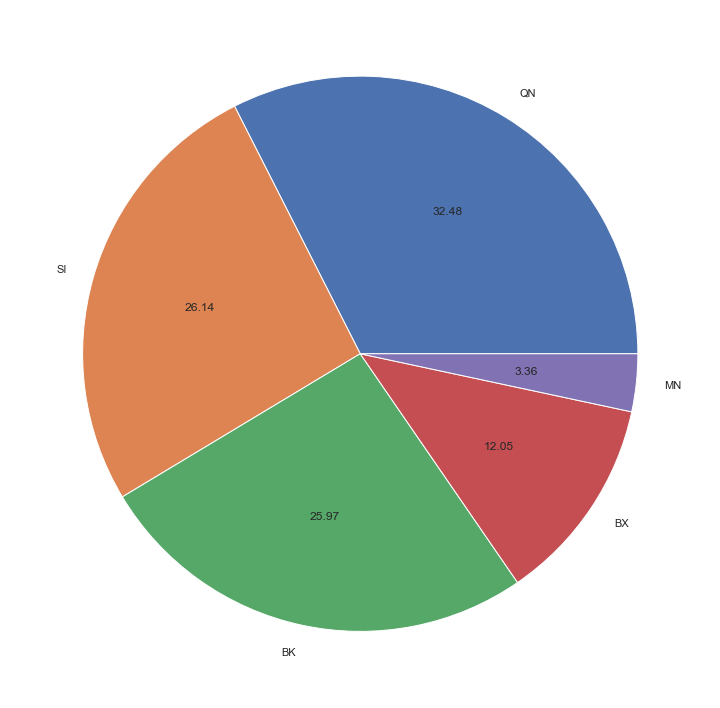

In [81]:
ax = pie.plot.pie(figsize=(15,10), autopct='%.2f') 
ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('figures/pie-plot-1')

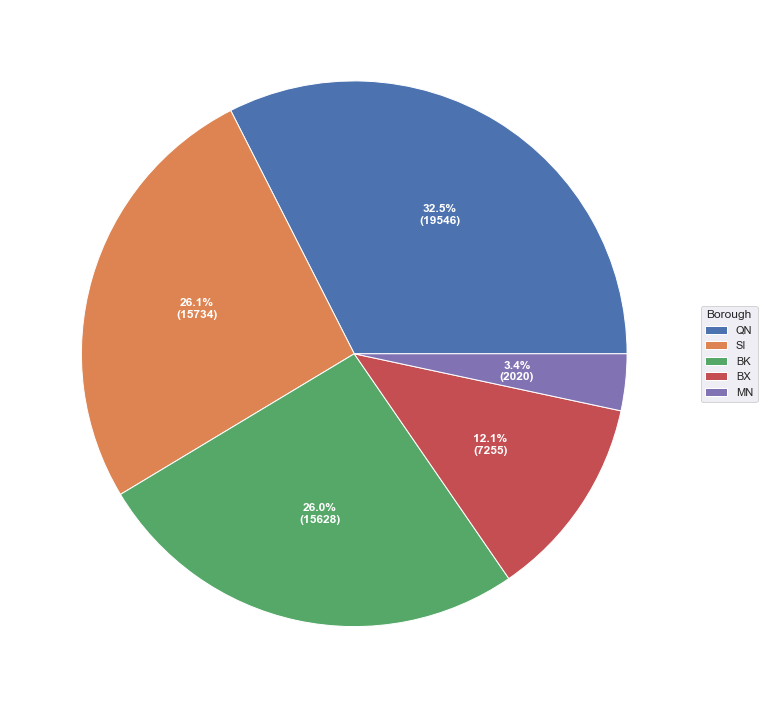

In [82]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(pie, autopct=lambda pct: func(pct, pie),
                                  textprops=dict(color="w"))

ax.legend(wedges, pie.index,
          title="Borough",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)) 

plt.setp(autotexts, size=12, weight="bold")
plt.tight_layout()
plt.savefig('figures/pie-plot-2')

# Plotting with Seaborn 

## Visualizing the Distribution of a Dataset

### Plotting Univariate Distributions

#### Histograms

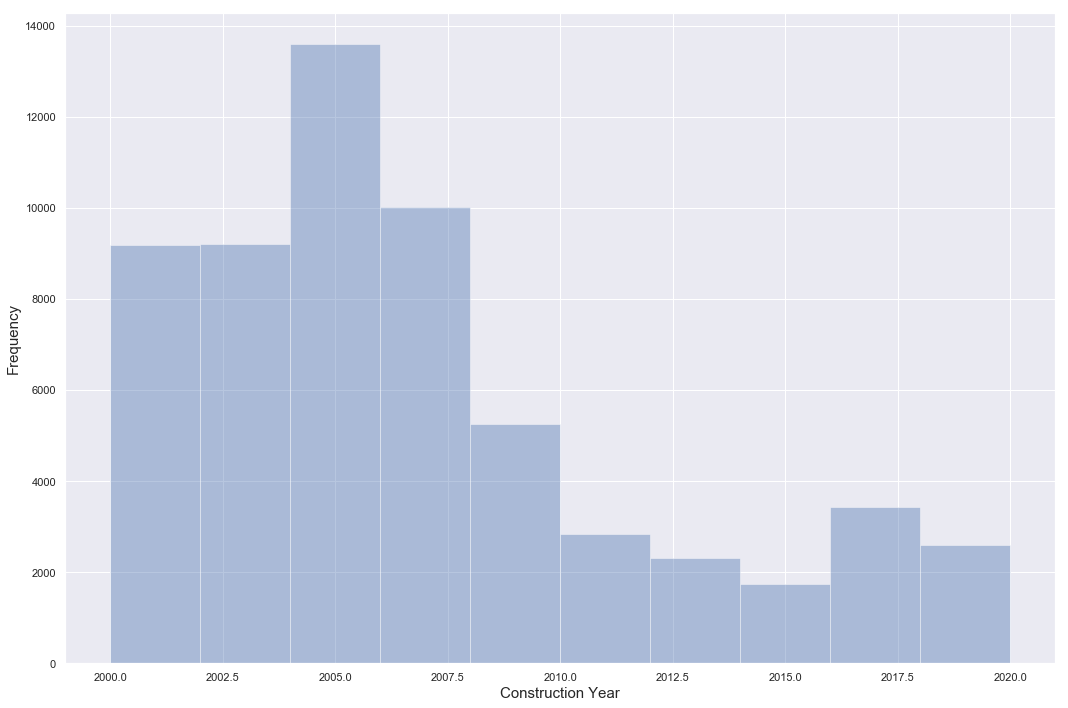

In [83]:
x = building_footprints['CNSTRCT_YR']

plt.figure(figsize=(15,10))
sns.distplot(x, kde=False, bins=10, rug=False);
plt.grid(True)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/hist-plot-1-seaborn')

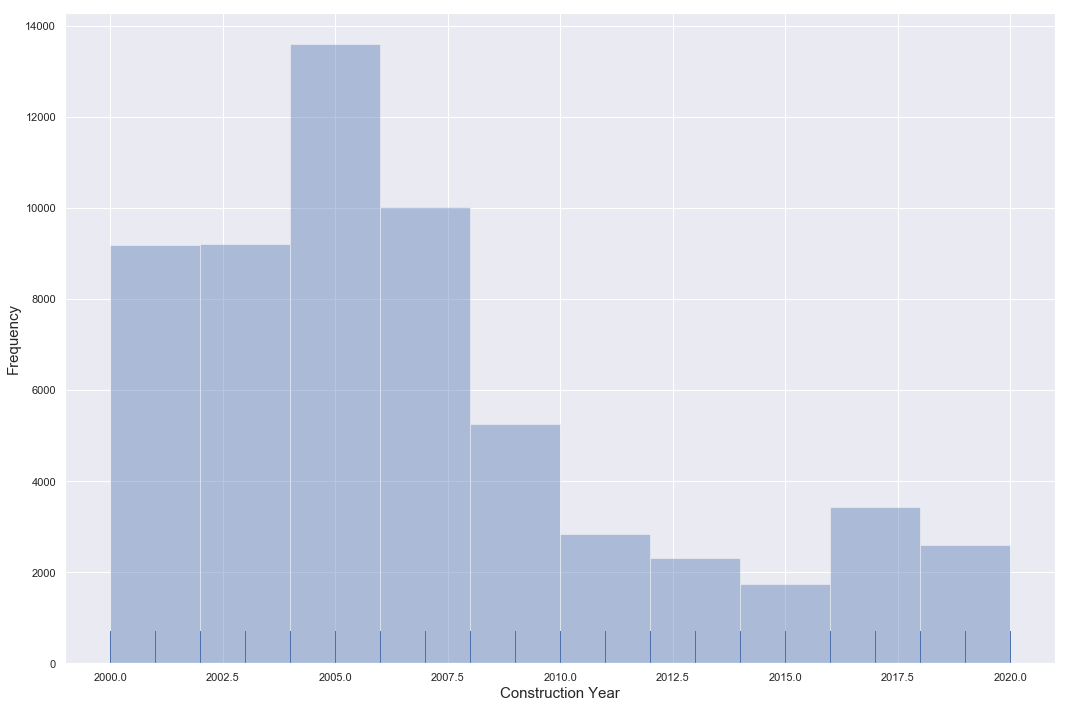

In [84]:
x = building_footprints['CNSTRCT_YR']

plt.figure(figsize=(15,10))
sns.distplot(x, bins=10, kde=False, rug=True)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/hist-plot-2-seaborn')

#### Kernel Density Estimation

/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


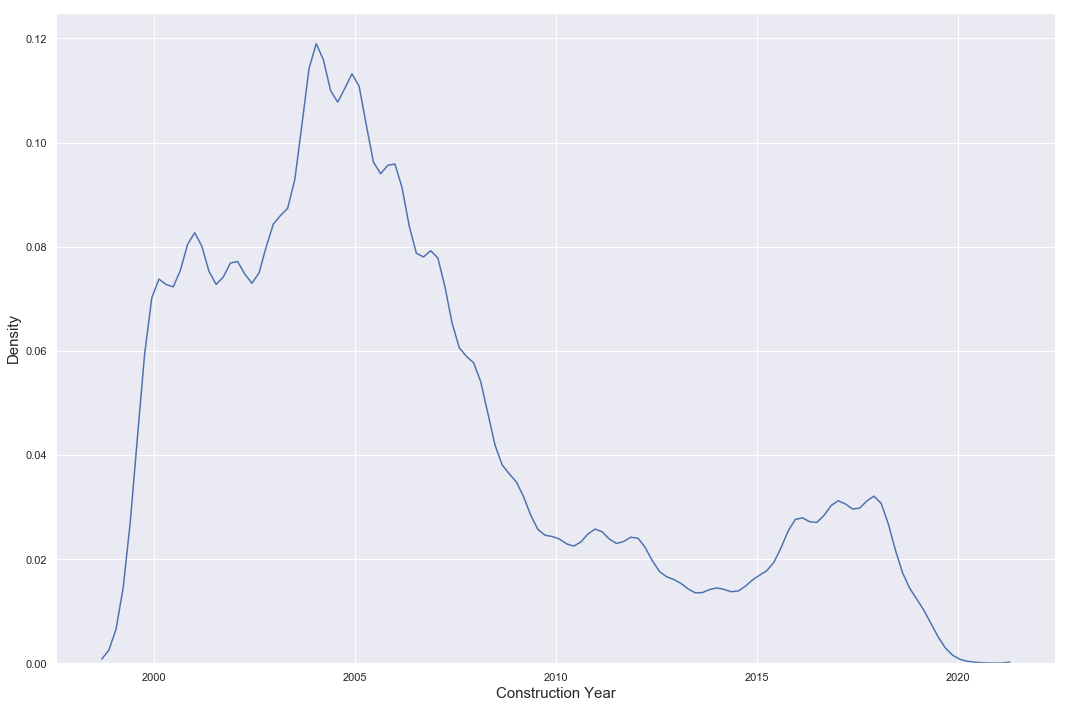

In [85]:
x = building_footprints['CNSTRCT_YR']

plt.figure(figsize=(15,10))
sns.distplot(x, hist=False)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/kde-plot-1-seaborn')

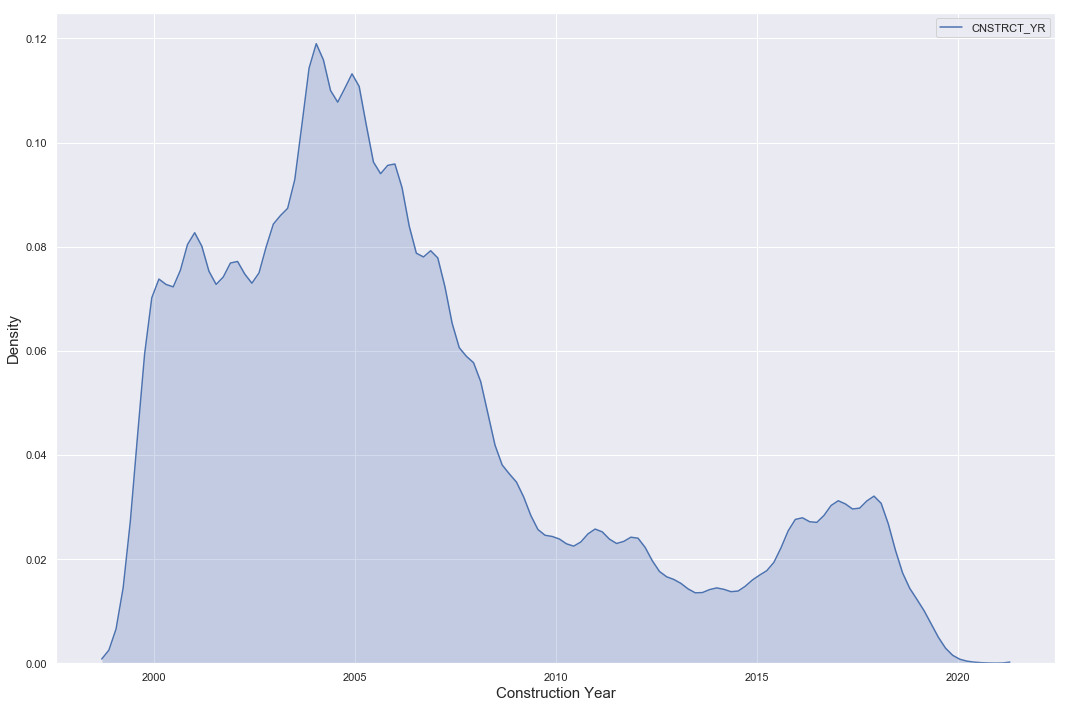

In [86]:
x = building_footprints['CNSTRCT_YR']

plt.figure(figsize=(15,10))
sns.kdeplot(x, shade=True)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/kde-plot-2-seaborn')

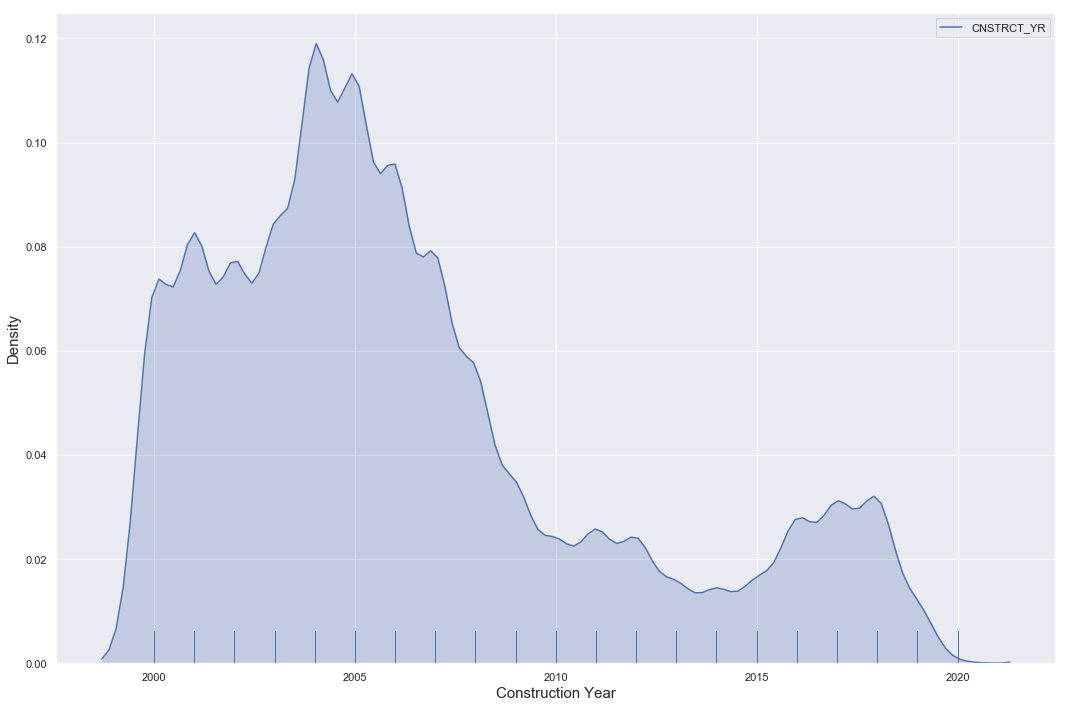

In [87]:
x = building_footprints['CNSTRCT_YR']

plt.figure(figsize=(15,10))
sns.kdeplot(x, shade=True)
sns.rugplot(x)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/kde-plot-3-seaborn')

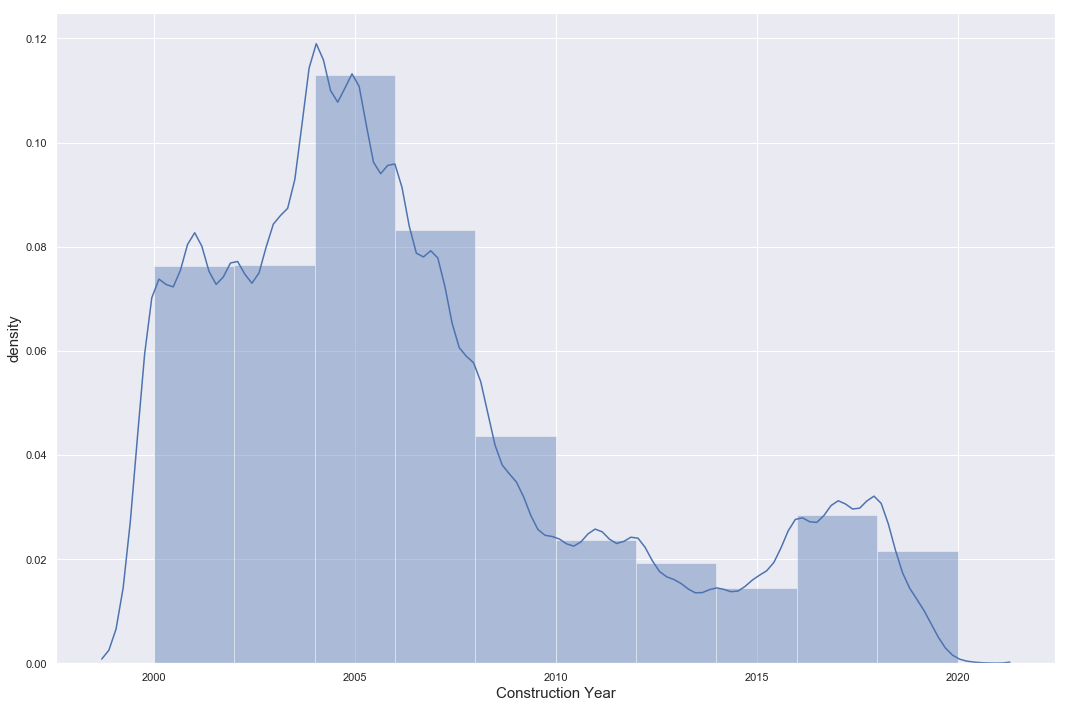

In [88]:
x = building_footprints['CNSTRCT_YR']

plt.figure(figsize=(15,10))
sns.distplot(x, bins=10)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('density', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/kde-plot-4-seaborn')

#### Fitting Parametric Distributions

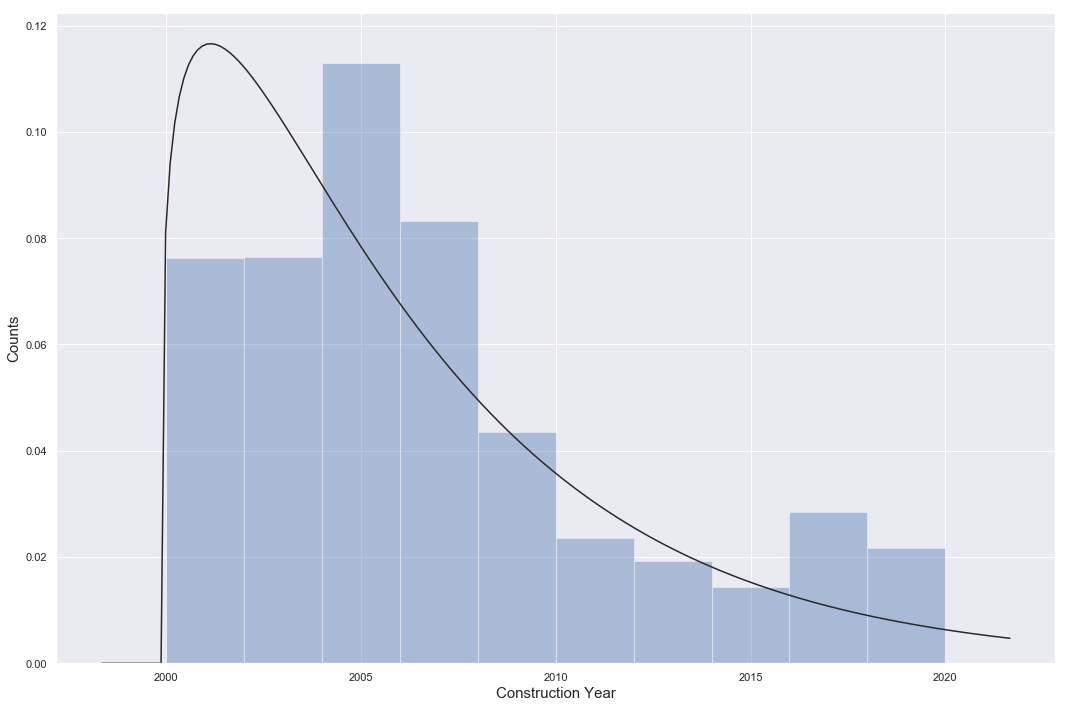

In [89]:
x = building_footprints['CNSTRCT_YR']

plt.figure(figsize=(15,10))
sns.distplot(x, kde=False, bins=10, fit=stats.gamma)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/param-dist-plot-1-seaborn')

### Plotting Bivariate Distributions

#### Scatterplots

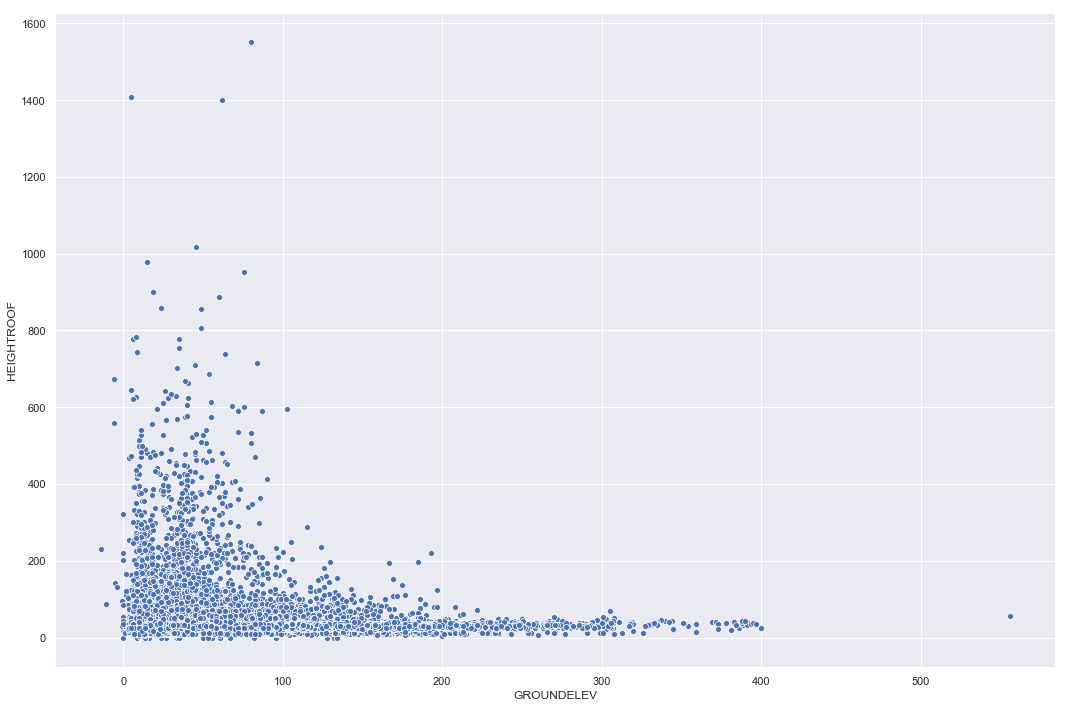

In [90]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y)
plt.tight_layout()
plt.savefig('figures/scatter-plot-1-seaborn')

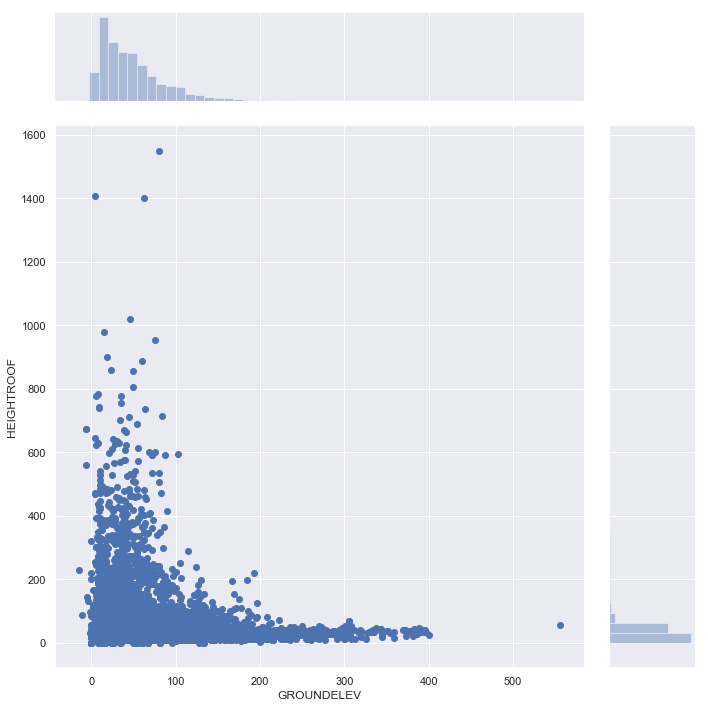

In [91]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

sns.jointplot(x=x, y=y, height=10)
plt.tight_layout()
plt.savefig('figures/joint-plot-1-seaborn')

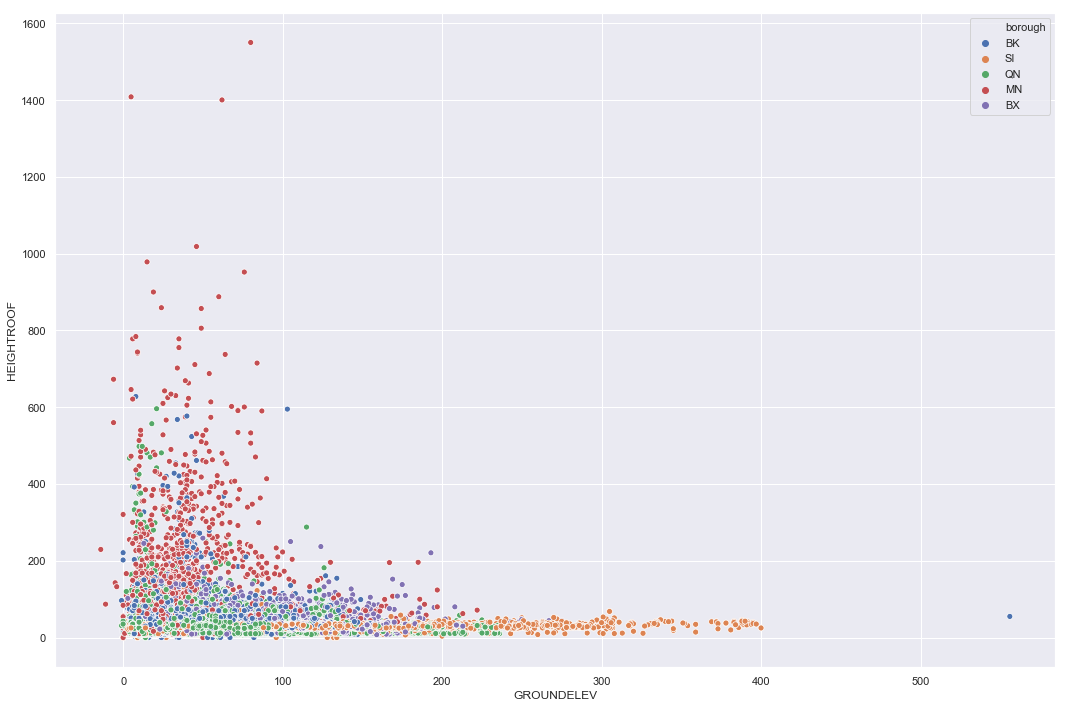

In [92]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y, data=building_footprints, hue="borough")
plt.tight_layout()
plt.savefig('figures/scatter-plot-2-seaborn')

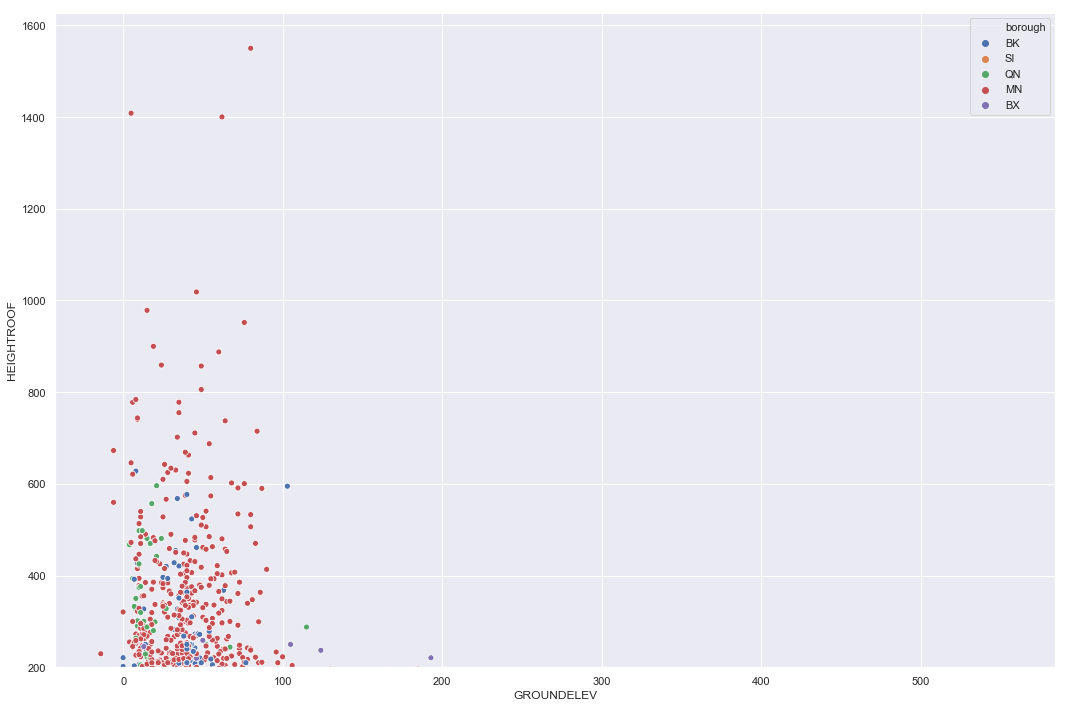

In [93]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y, data=building_footprints, hue="borough")
plt.ylim(bottom=200)
plt.tight_layout()
plt.savefig('figures/scatter-plot-3-seaborn')

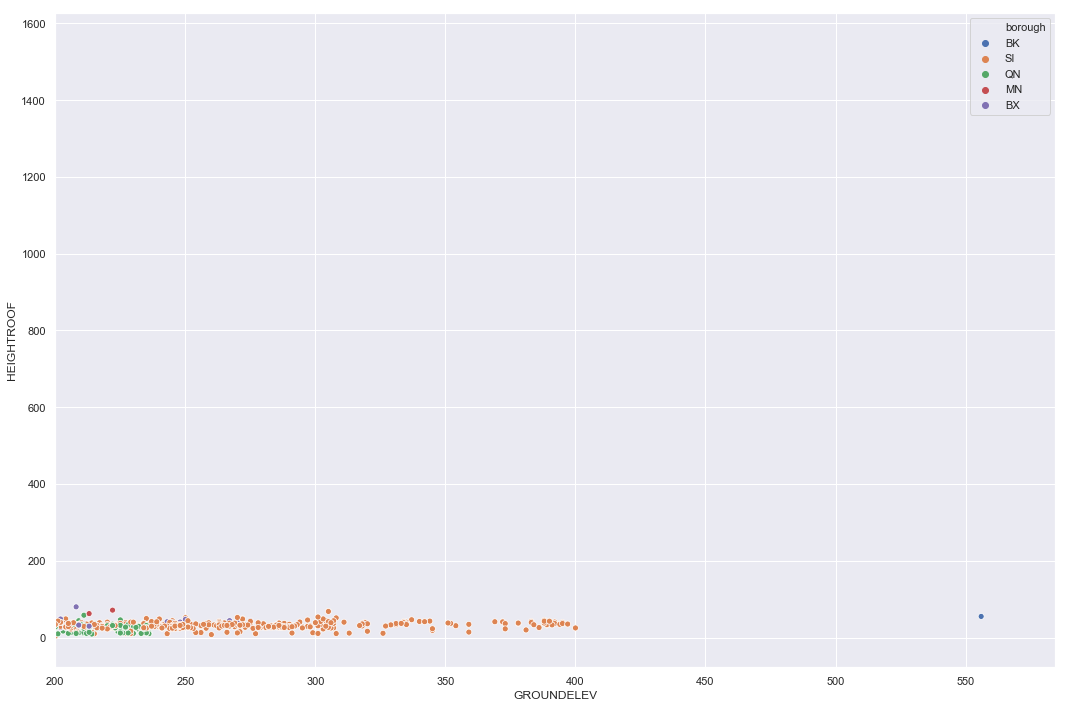

In [94]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y, data=building_footprints, hue="borough")
plt.xlim(left=200)
plt.tight_layout()
plt.savefig('figures/scatter-plot-4-seaborn')

#### Hexbin Plots

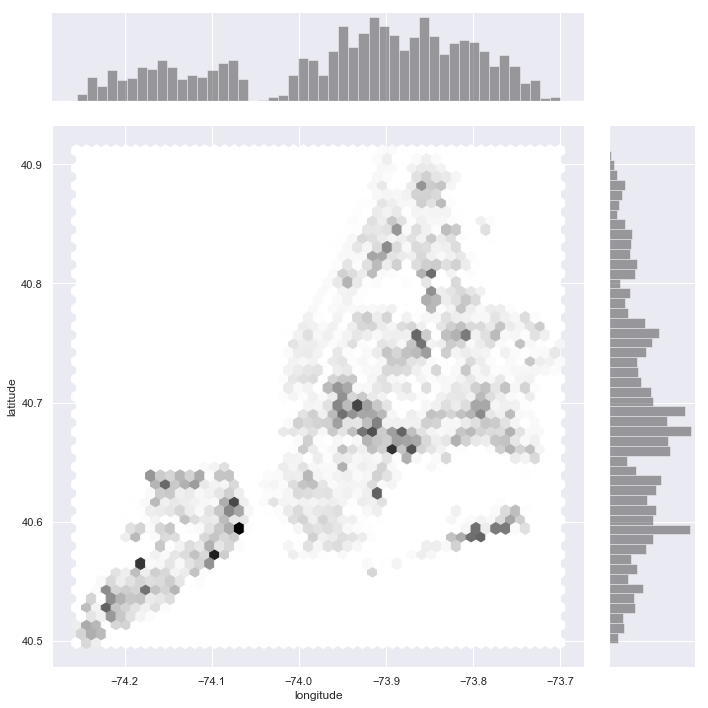

In [95]:
x = building_footprints['longitude']
y = building_footprints['latitude']
    
sns.jointplot(x=x, y=y, kind="hex", color="k", height=10)    
plt.tight_layout()
plt.savefig('figures/hexbin-plot-1-seaborn')

#### Kernel Density Estimation

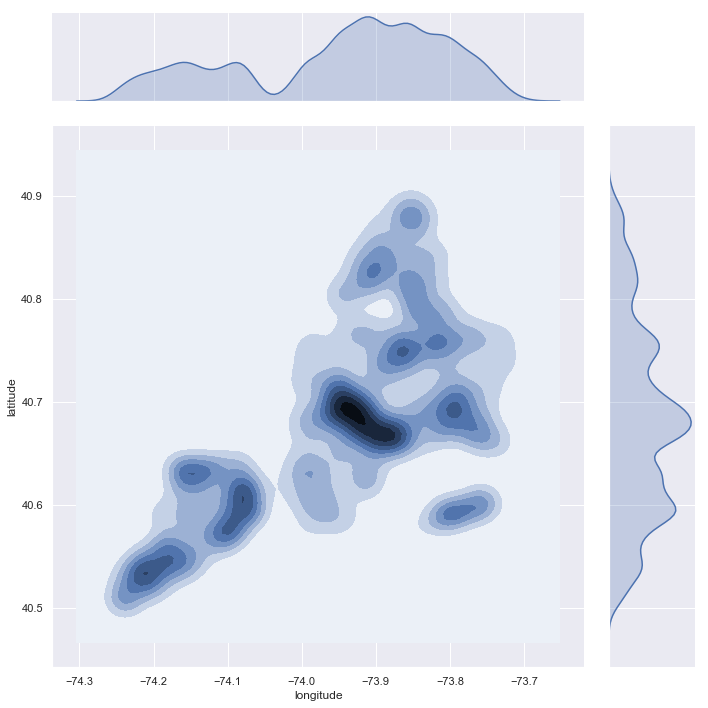

In [96]:
x = building_footprints['longitude']
y = building_footprints['latitude']

sns.jointplot(x=x, y=y, data=building_footprints, kind="kde", height=10)
plt.tight_layout()
plt.savefig('figures/joint-plot-1-seaborn')

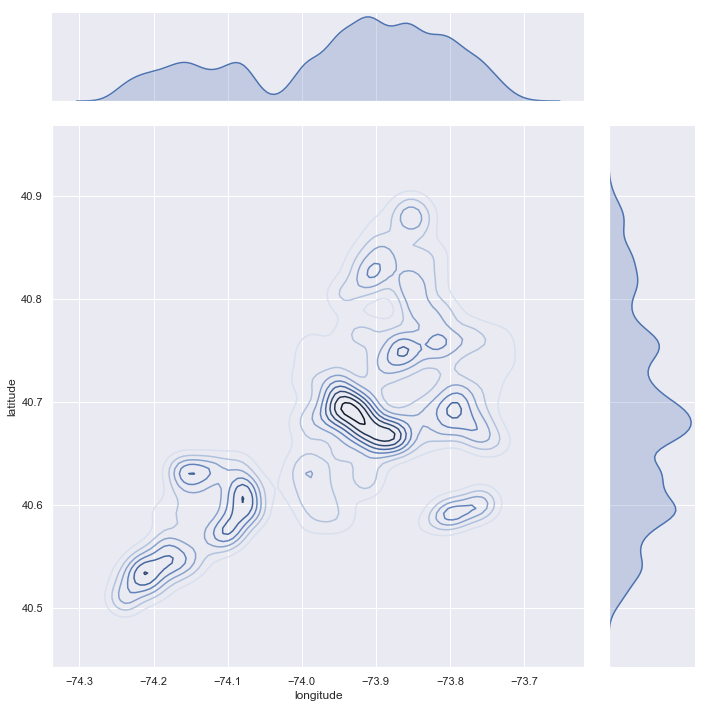

In [97]:
x = building_footprints['longitude']
y = building_footprints['latitude']

sns.jointplot(x=x, y=y, data=building_footprints, kind="kde", shade=False, height=10)
plt.tight_layout()
plt.savefig('figures/joint-plot-2-seaborn')

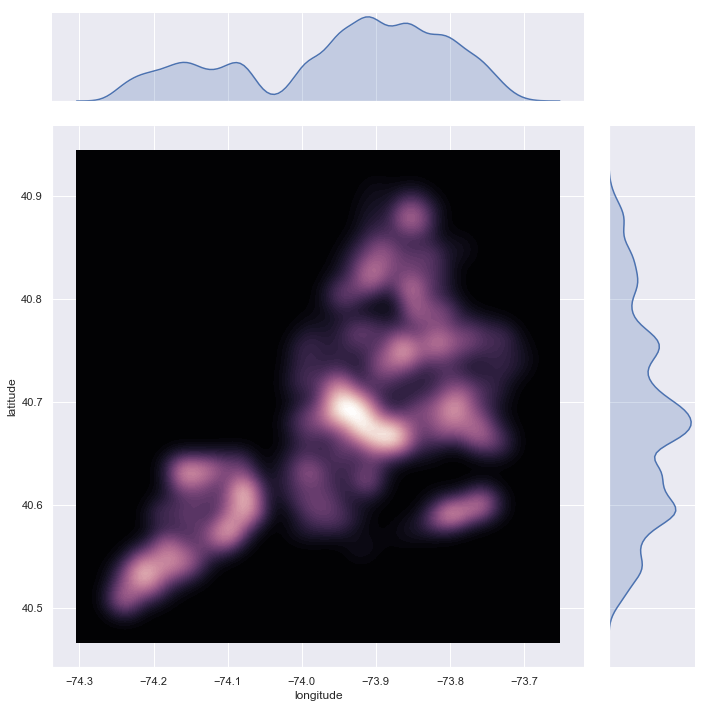

In [98]:
x = building_footprints['longitude']
y = building_footprints['latitude']

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.jointplot(x=x, 
              y=y, 
              data=building_footprints, 
              kind="kde", 
              height=10, 
              cmap=cmap, 
              n_levels=60, 
              shade=True)
plt.tight_layout()
plt.savefig('figures/joint-plot-3-seaborn')

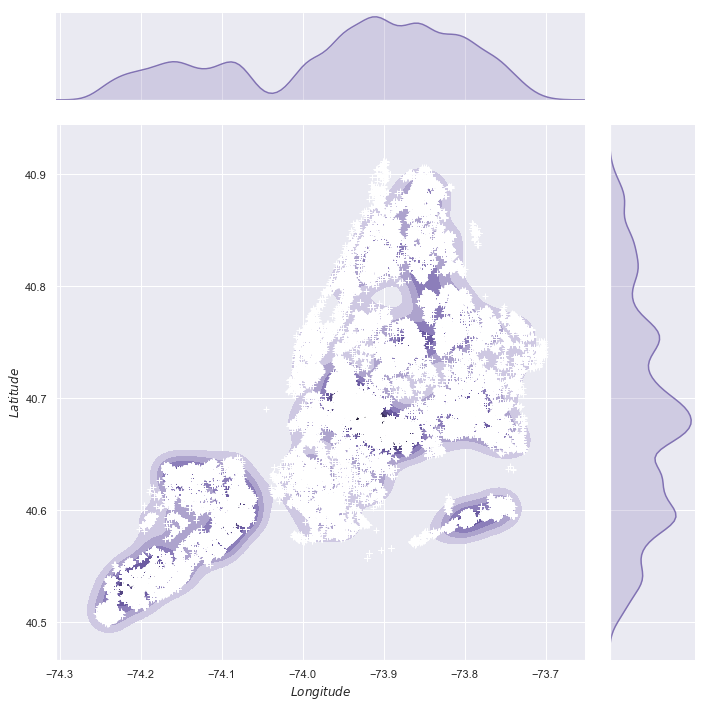

In [99]:
x = building_footprints['longitude']
y = building_footprints['latitude']

g = sns.jointplot(x=x, y=y, 
                  data=building_footprints, 
                  kind="kde", 
                  color="m", 
                  height=10)
g.plot_joint(plt.scatter, 
             c="w", 
             s=30, 
             linewidth=1,
             marker="+")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Longitude$", "$Latitude$")
plt.tight_layout()
plt.savefig('figures/joint-plot-4-seaborn')

### Visualizing Pairwise Relationships in a Dataset

In [100]:
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60183 entries, 0 to 60182
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   the_geom              60183 non-null  object 
 1   CNSTRCT_YR            60183 non-null  float64
 2   NAME                  46 non-null     object 
 3   BIN                   60183 non-null  int64  
 4   LSTMODDATE            60183 non-null  object 
 5   LSTSTATYPE            60118 non-null  object 
 6   DOITT_ID              60183 non-null  int64  
 7   HEIGHTROOF            58522 non-null  float64
 8   FEAT_CODE             60181 non-null  float64
 9   GROUNDELEV            59944 non-null  float64
 10  SHAPE_AREA            60183 non-null  float64
 11  SHAPE_LEN             60183 non-null  float64
 12  BASE_BBL              60183 non-null  int64  
 13  MPLUTO_BBL            60183 non-null  float64
 14  GEOMSOURCE            60133 non-null  object 
 15  borough            

/Users/geribauer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


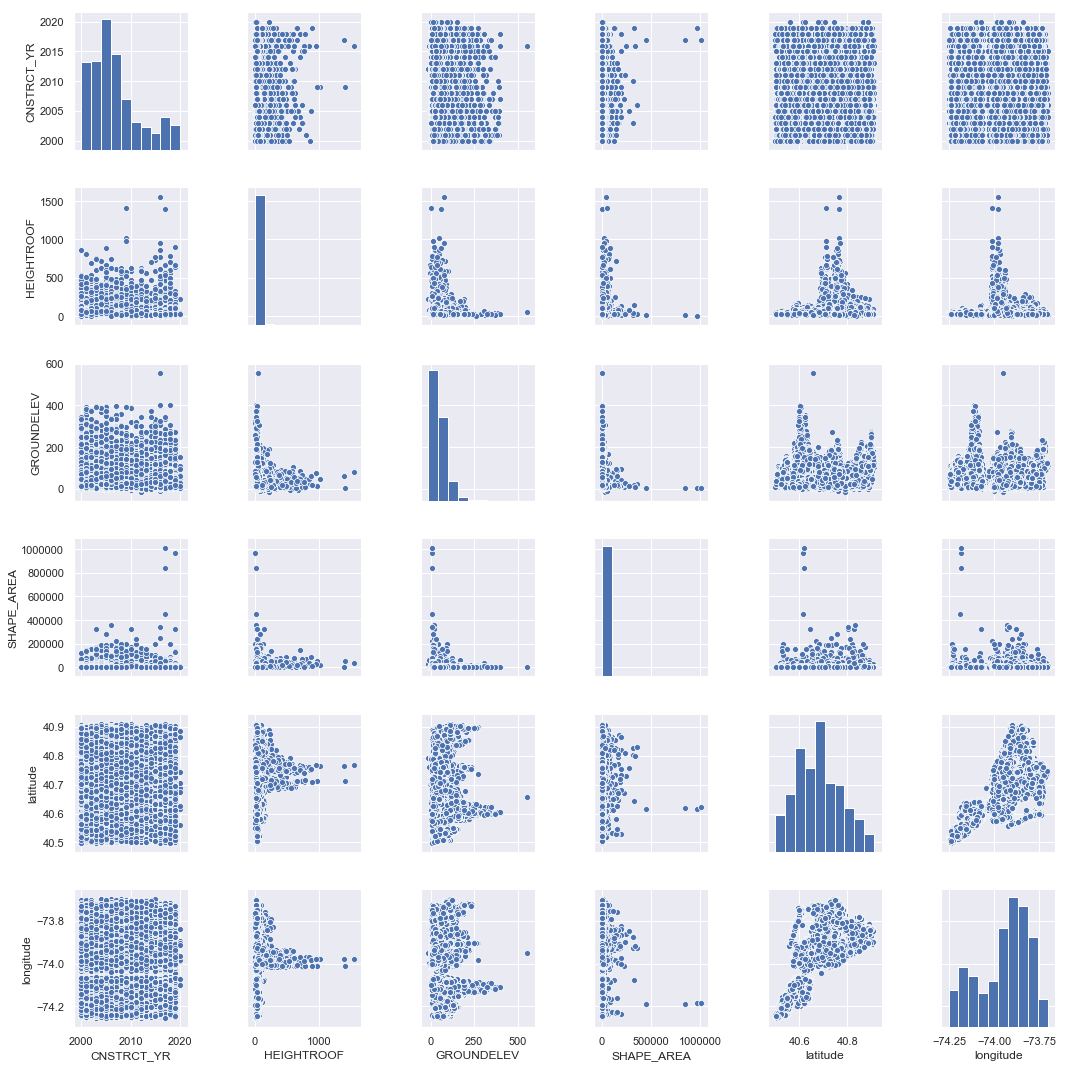

In [101]:
selected = building_footprints[['borough', 
                                'CNSTRCT_YR', 
                                'HEIGHTROOF', 
                                'GROUNDELEV', 
                                'SHAPE_AREA', 
                                'latitude', 
                                'longitude']]

sns.pairplot(selected)
plt.tight_layout()
plt.savefig('figures/pair-plot-1-seaborn')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/geribauer/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


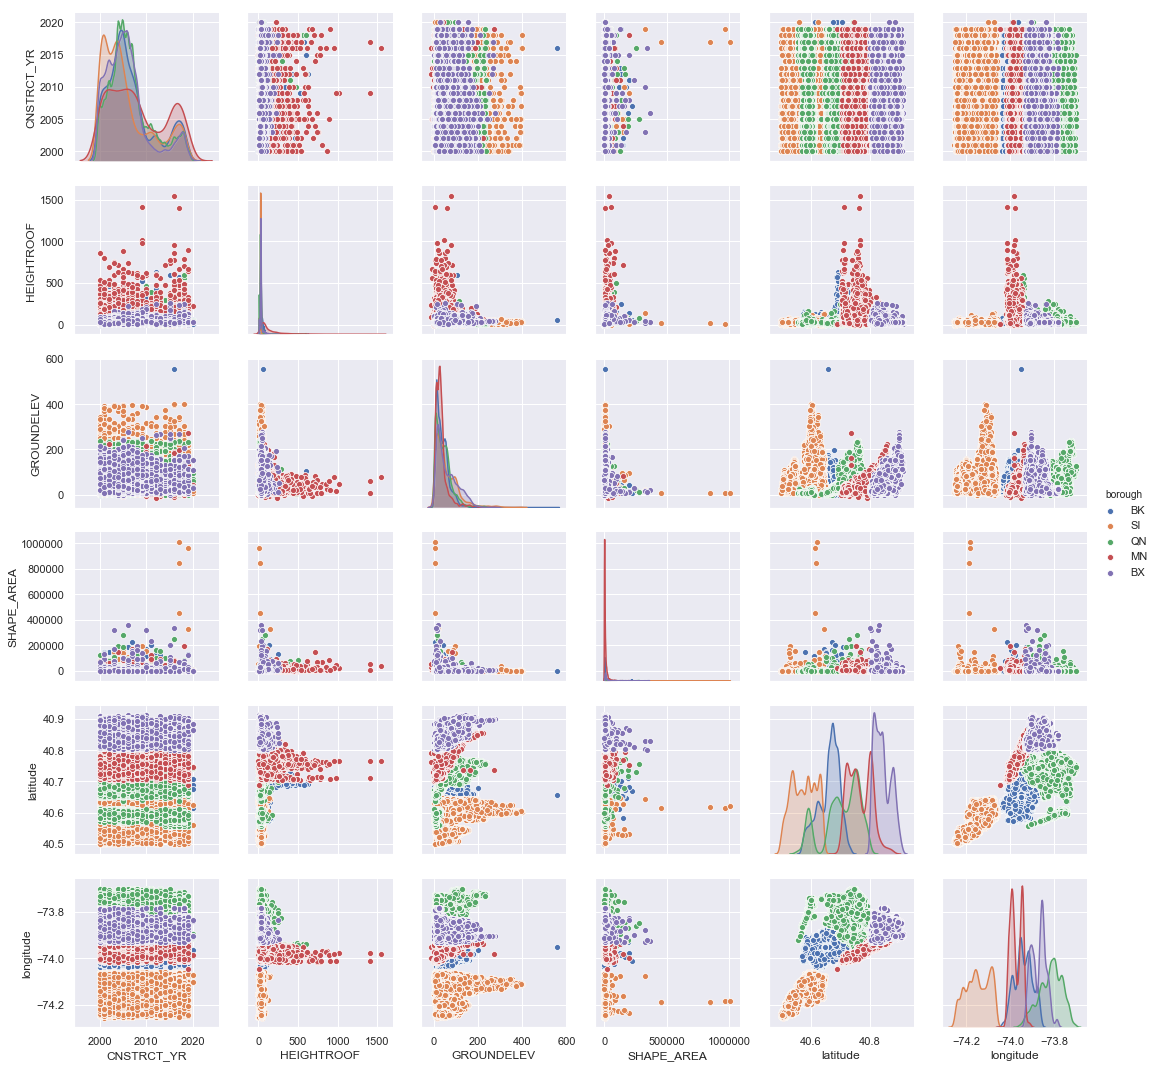

In [102]:
sns.pairplot(selected, hue="borough")
plt.savefig('figures/pair-plot-2-seaborn')

## Plotting with Categorical Data

In [103]:
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60183 entries, 0 to 60182
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   the_geom              60183 non-null  object 
 1   CNSTRCT_YR            60183 non-null  float64
 2   NAME                  46 non-null     object 
 3   BIN                   60183 non-null  int64  
 4   LSTMODDATE            60183 non-null  object 
 5   LSTSTATYPE            60118 non-null  object 
 6   DOITT_ID              60183 non-null  int64  
 7   HEIGHTROOF            58522 non-null  float64
 8   FEAT_CODE             60181 non-null  float64
 9   GROUNDELEV            59944 non-null  float64
 10  SHAPE_AREA            60183 non-null  float64
 11  SHAPE_LEN             60183 non-null  float64
 12  BASE_BBL              60183 non-null  int64  
 13  MPLUTO_BBL            60183 non-null  float64
 14  GEOMSOURCE            60133 non-null  object 
 15  borough            

### Categorical Scatterplots

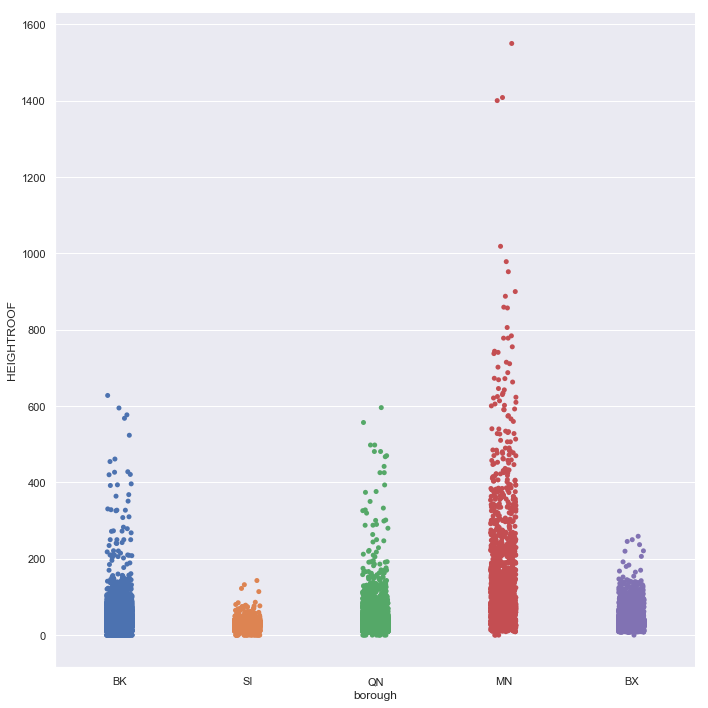

In [104]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            data=building_footprints, 
            height=10)
plt.tight_layout()

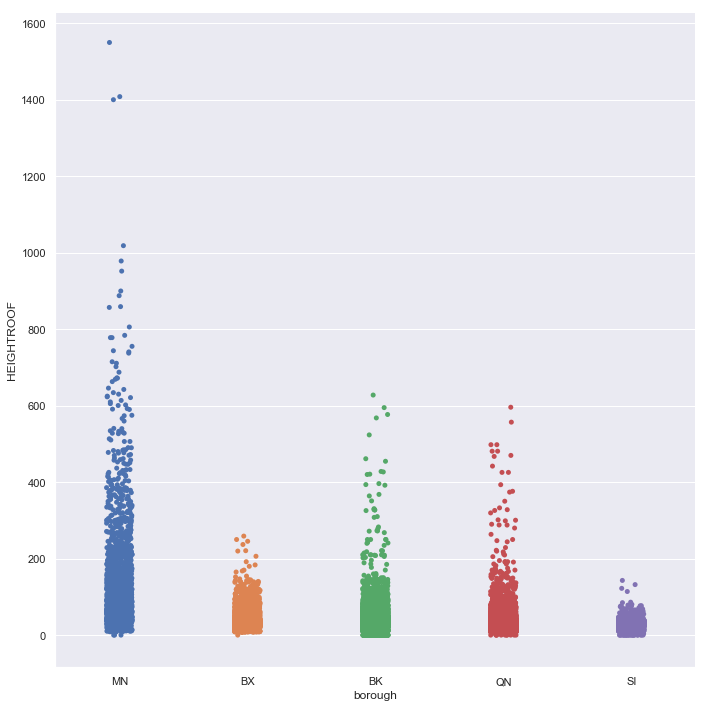

In [105]:
sns.catplot(x='borough', y='HEIGHTROOF', 
            order=["MN", "BX", "BK", "QN", "SI"], 
            data=building_footprints, 
            height=10)
plt.tight_layout()
plt.savefig('figures/cat-scatter-plot-1-seaborn')

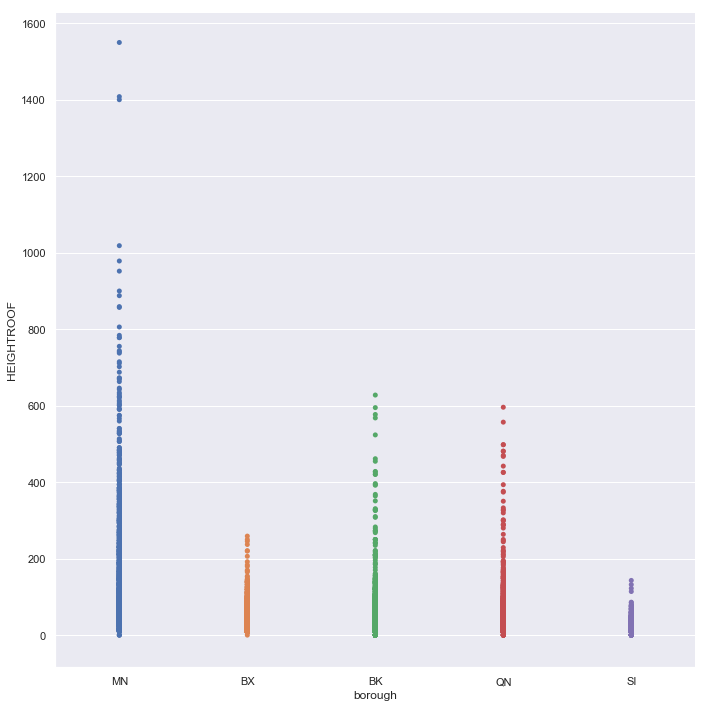

In [106]:
sns.catplot(x='borough', y='HEIGHTROOF', 
            data=building_footprints, 
            order=["MN", "BX", "BK", "QN", "SI"], 
            height=10, 
            jitter=False)
plt.tight_layout()
plt.savefig('figures/cat-scatter-plot-2-seaborn')

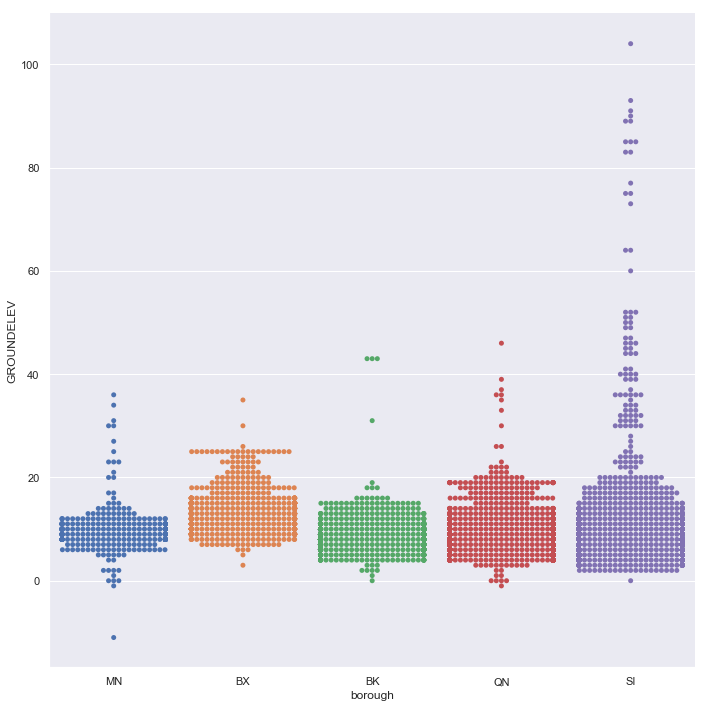

In [107]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order= ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='borough', y='GROUNDELEV', 
            kind='swarm', 
            order=order, 
            data=data, 
            height=10)
plt.tight_layout()
plt.savefig('figures/cat-swarm-plot-1-seaborn')

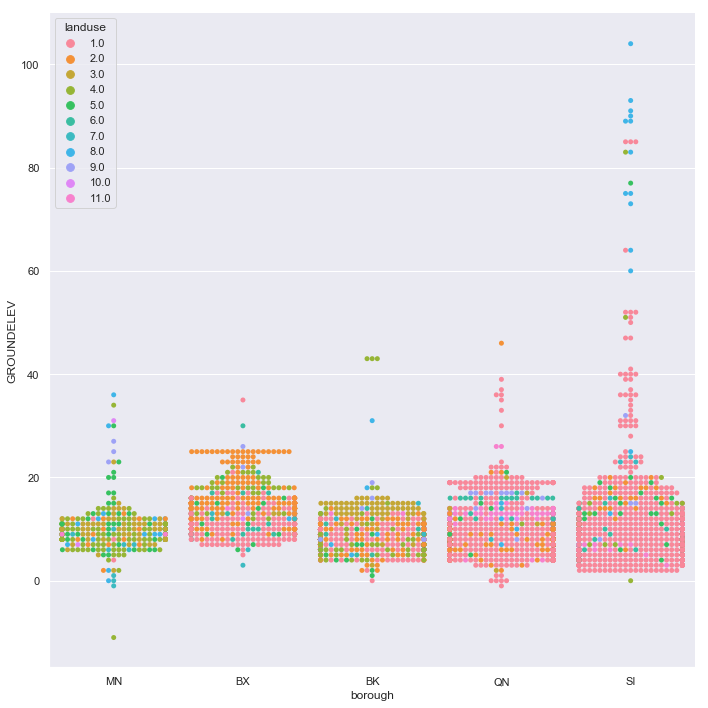

In [108]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='borough', y='GROUNDELEV', 
            hue='landuse', 
            kind='swarm', 
            data=data, 
            order=order, 
            height=10,
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-swarm-plot-2-seaborn')

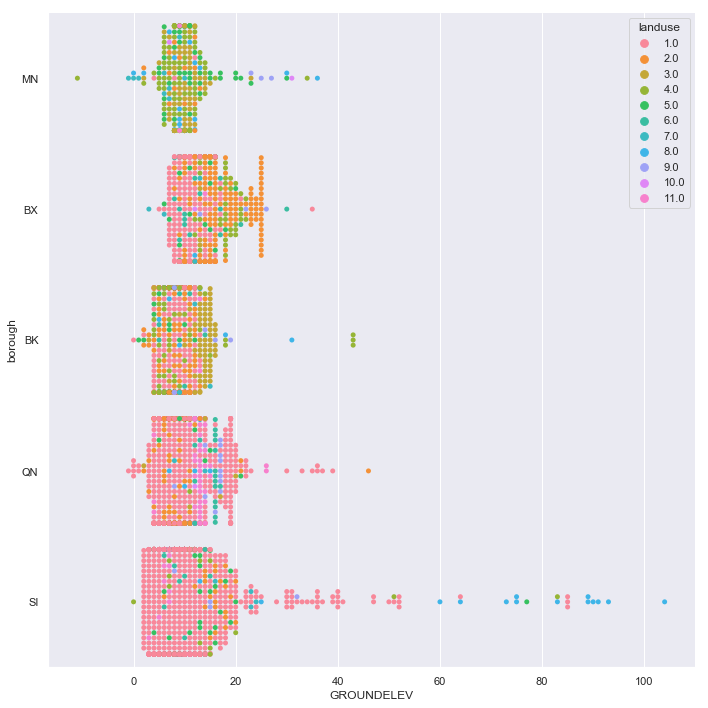

In [109]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='GROUNDELEV', y='borough', 
            hue='landuse', 
            kind='swarm', 
            data=data, 
            order=order, 
            height=10,
            legend=False)

plt.legend(loc='upper right', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-swarm-plot-3-seaborn')

### Distributions of Observations within Categories

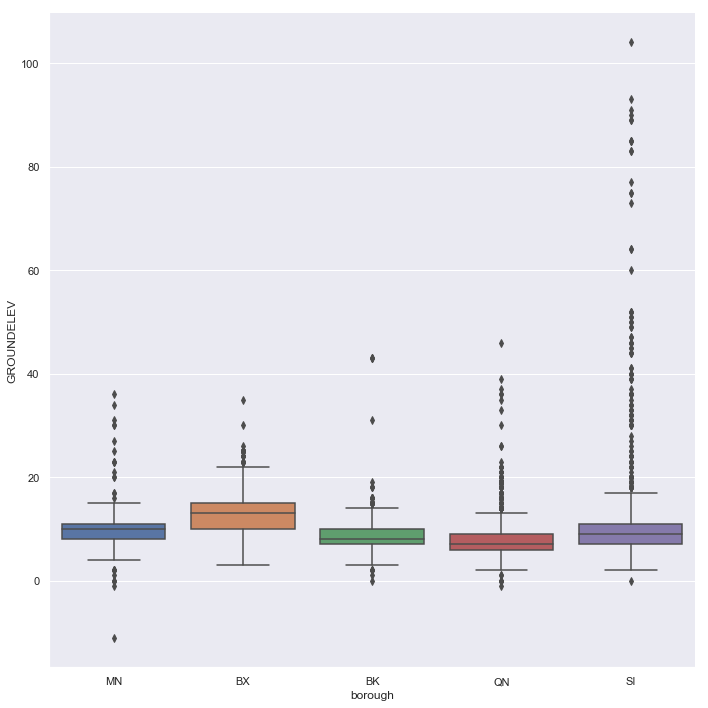

In [110]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", y="GROUNDELEV", 
            kind="box", 
            data=data, 
            order=order, 
            height=10)
plt.tight_layout()
plt.savefig('figures/cat-box-plot-1-seaborn')

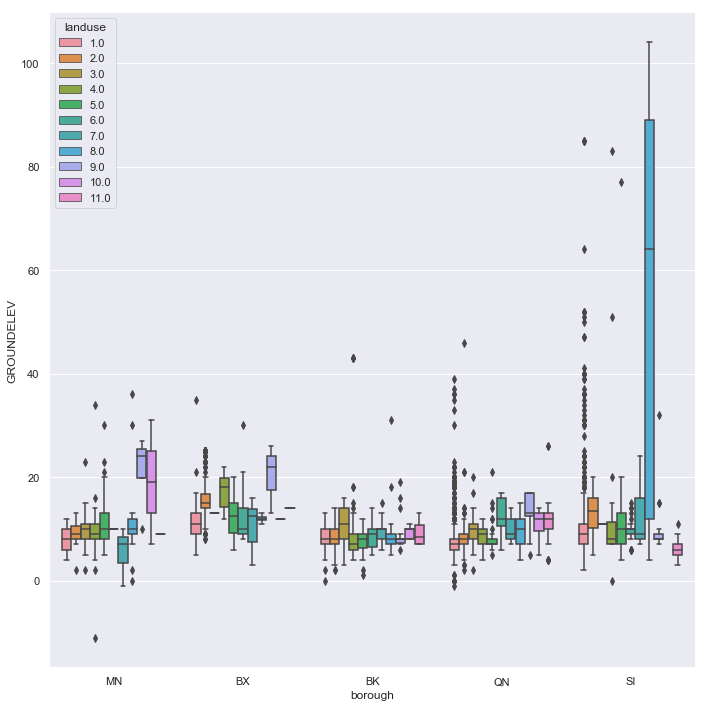

In [111]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", y="GROUNDELEV", 
            kind="box", 
            hue='landuse', 
            data=data, 
            order=order, 
            height=10,
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-box-plot-2-seaborn')

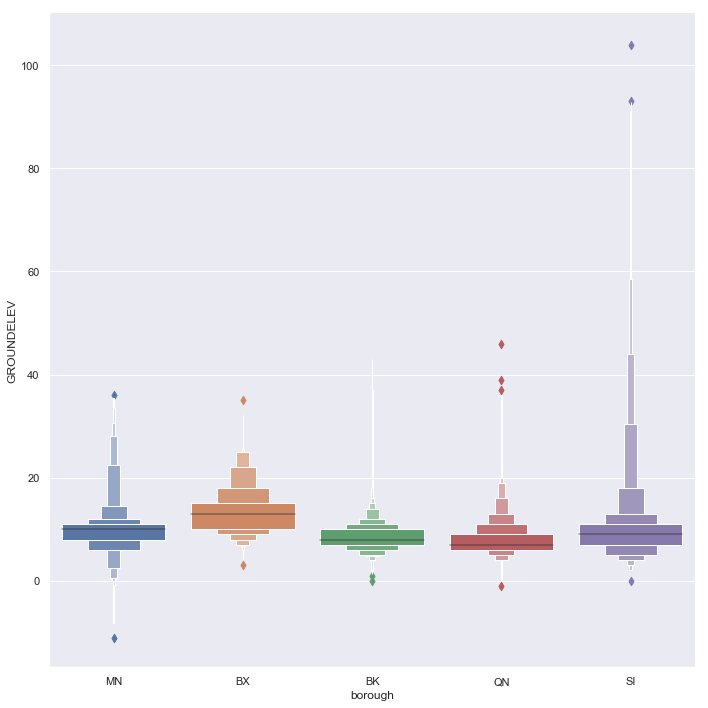

In [112]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", y="GROUNDELEV", 
            kind="boxen", 
            data=data, 
            order=order, 
            height=10)

plt.tight_layout()
plt.savefig('figures/cat-boxen-plot-1-seaborn')

#### Violinplots

In [113]:
(building_footprints['borough'].isin(["MN", "BK"]))

0         True
1         True
2         True
3        False
4         True
         ...  
60178    False
60179    False
60180    False
60181    False
60182    False
Name: borough, Length: 60183, dtype: bool

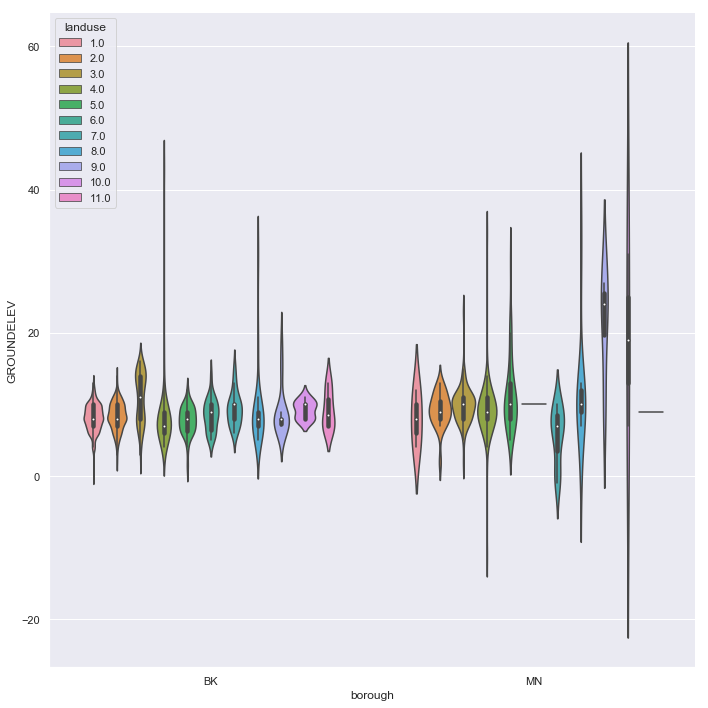

In [114]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", y="GROUNDELEV", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=10, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-1-seaborn')

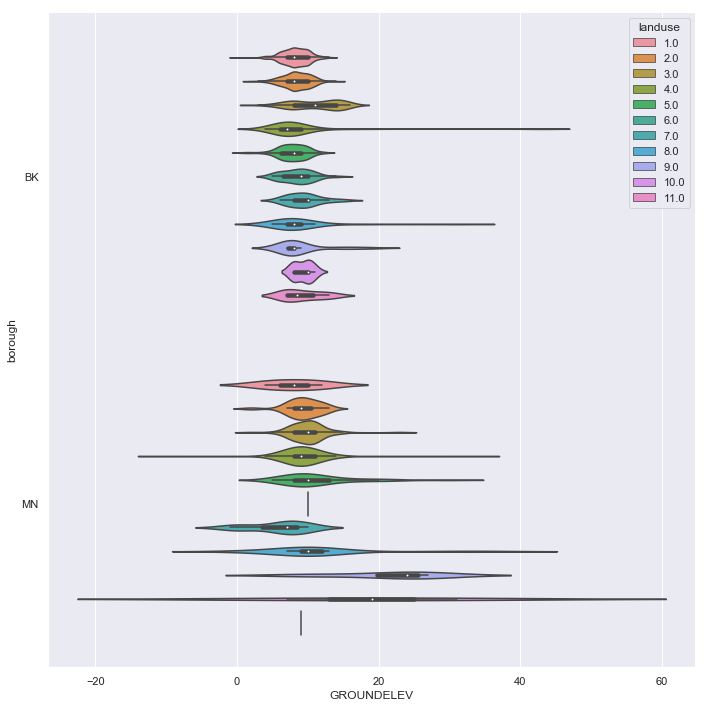

In [115]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                               (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="GROUNDELEV", y="borough", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=10, legend=False)

plt.legend(loc='upper right', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-2-seaborn')

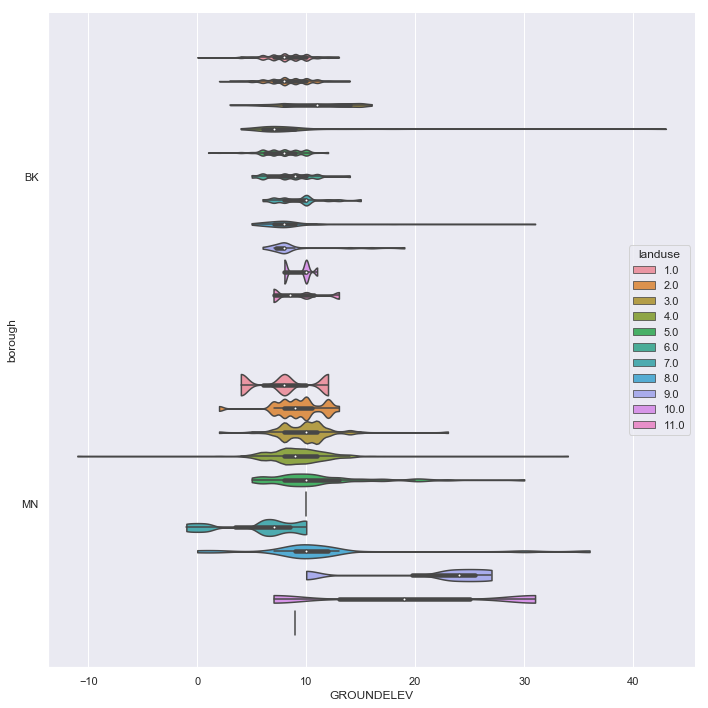

In [116]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="GROUNDELEV", y="borough", 
            kind="violin", 
            hue='landuse', 
            data = data, 
            bw=.15, 
            cut=0, 
            height=10, legend=False)

plt.legend(loc='center right', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-3-seaborn')

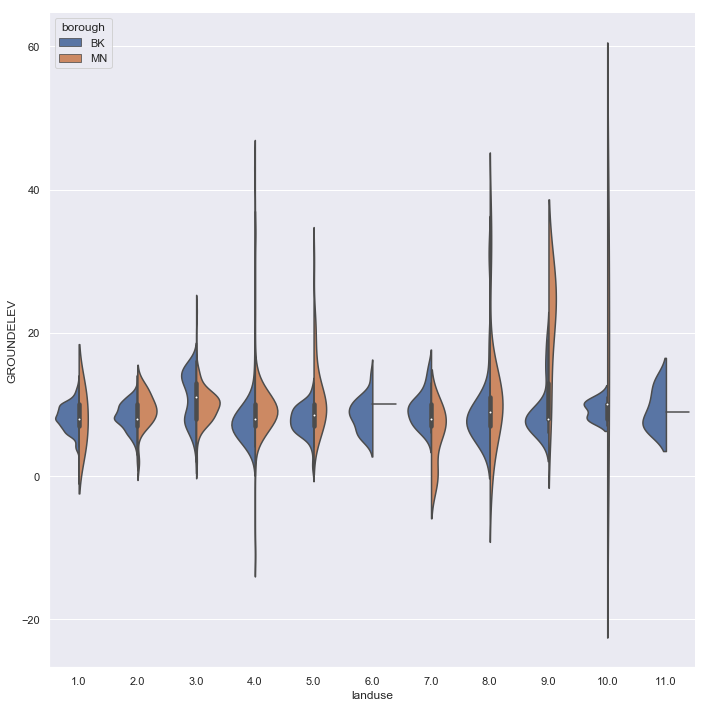

In [117]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="landuse", y="GROUNDELEV", 
            hue="borough", 
            kind="violin", 
            split=True, 
            data=data, 
            height=10, 
            legend=False)

plt.legend(loc='upper left', title='borough')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-4-seaborn')

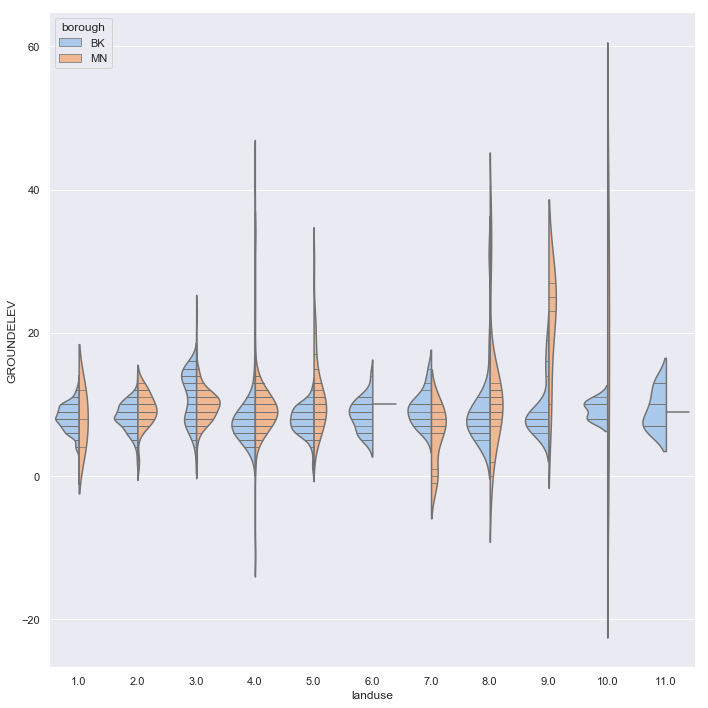

In [118]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="landuse", y="GROUNDELEV", 
            hue="borough", 
            kind="violin", 
            inner="stick", 
            split=True,
            palette="pastel", 
            data=data, 
            height=10, 
            legend=False)

plt.legend(loc='upper left', title='borough')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-5-seaborn')

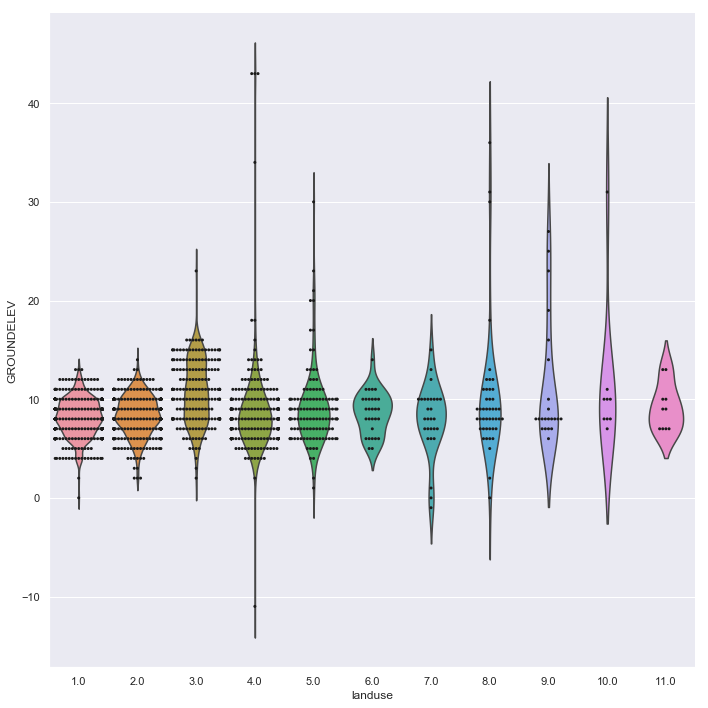

In [119]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

g = sns.catplot(x="landuse", y="GROUNDELEV", kind="violin", inner=None, data=data, height=10)
sns.swarmplot(x="landuse", y="GROUNDELEV", 
              color="k", 
              size=3, 
              data=data, 
              ax=g.ax)
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-6-seaborn')

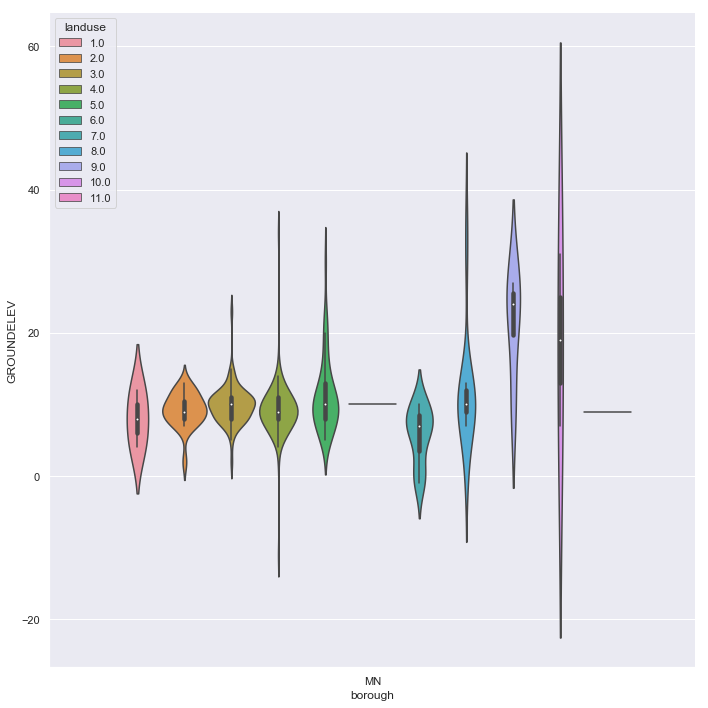

In [120]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN"]))]

sns.catplot(x="borough", y="GROUNDELEV", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=10, legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-7-seaborn')

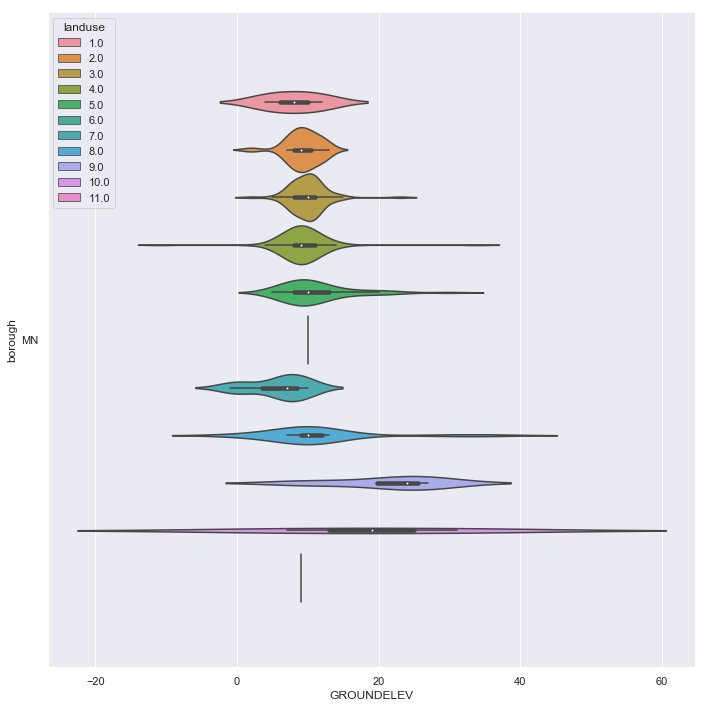

In [121]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                               (building_footprints['borough'].isin(["MN"]))]

sns.catplot(x="GROUNDELEV", y="borough", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=10, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-8-seaborn')

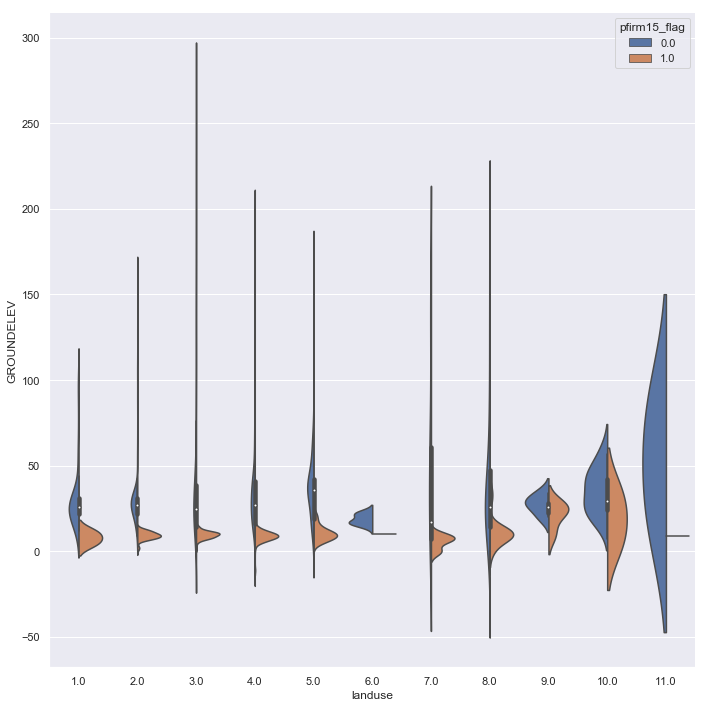

In [122]:
data = building_footprints.loc[building_footprints['borough'].isin(["MN"])]

sns.catplot(x="landuse", y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="violin", 
            split=True, 
            data=data, 
            height=10, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-9-seaborn')

### Statistical Estimation within Categories

In [123]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

['MN', 'BX', 'BK', 'SI', 'QN']

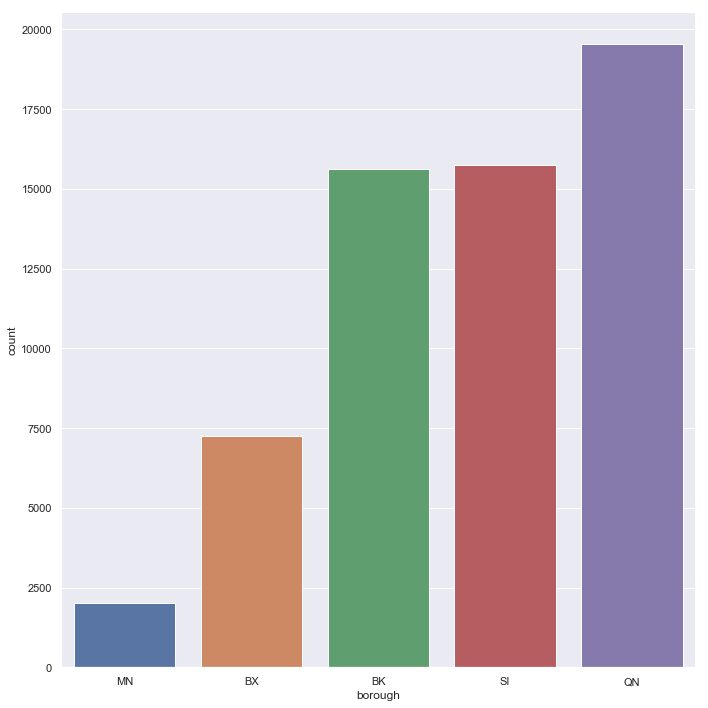

In [124]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", 
            kind="count", 
            data = data, 
            order = order, 
            height = 10)
plt.tight_layout()
plt.savefig('figures/cat-bar-plot-1-seaborn')

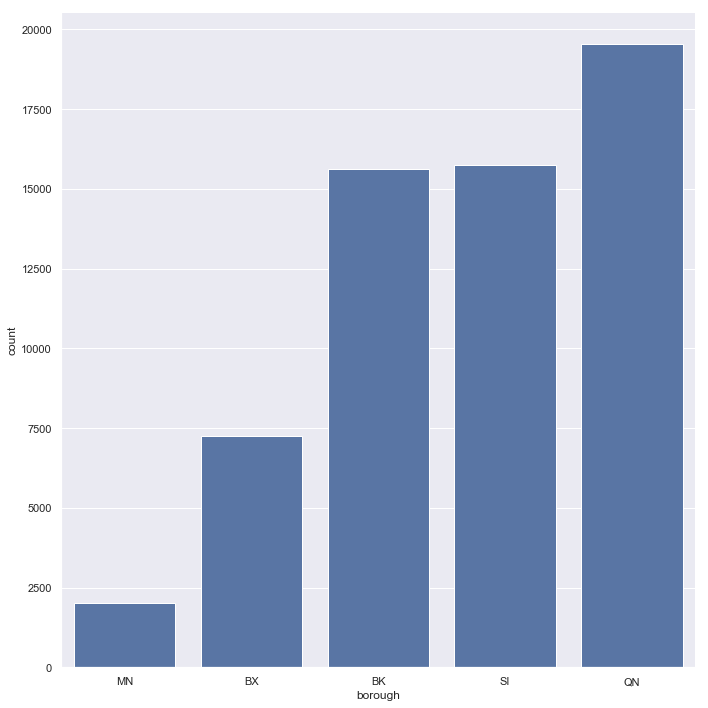

In [125]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", 
            kind="count", 
            data = data, 
            color="C0",
            order = order, 
            height = 10)
plt.tight_layout()
plt.savefig('figures/cat-bar-plot-2-seaborn')

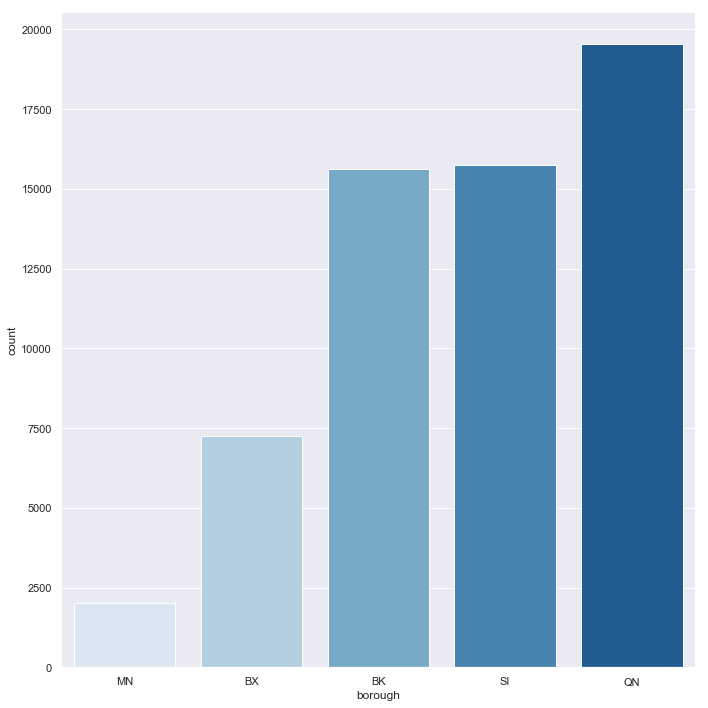

In [126]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", 
            kind="count", 
            palette="Blues", 
            data = data, 
            order = order, 
            height = 10)
plt.tight_layout()
plt.savefig('figures/cat-bar-plot-3-seaborn')

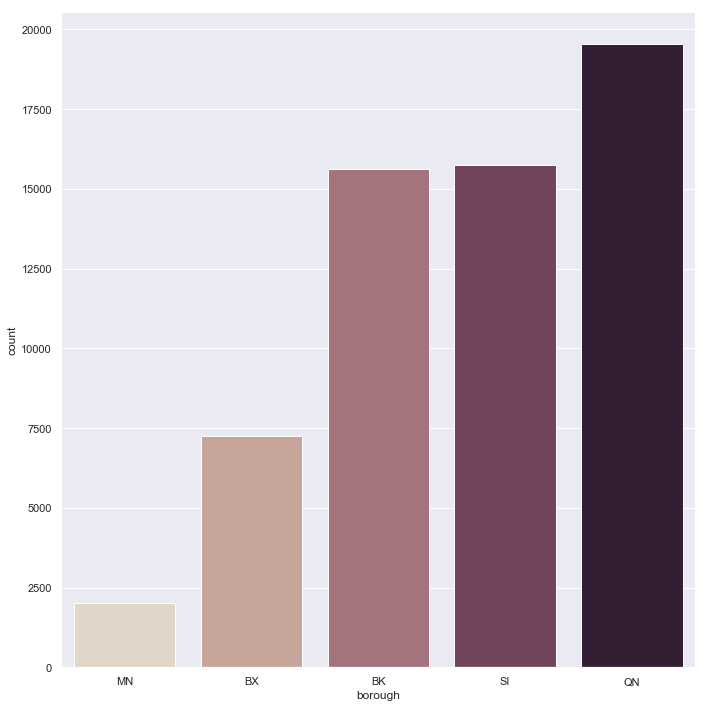

In [127]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", 
            kind="count", 
            palette="ch:.25", 
            data = data, 
            order = order, 
            height = 10)
plt.tight_layout()
plt.savefig('figures/cat-bar-plot-4-seaborn')

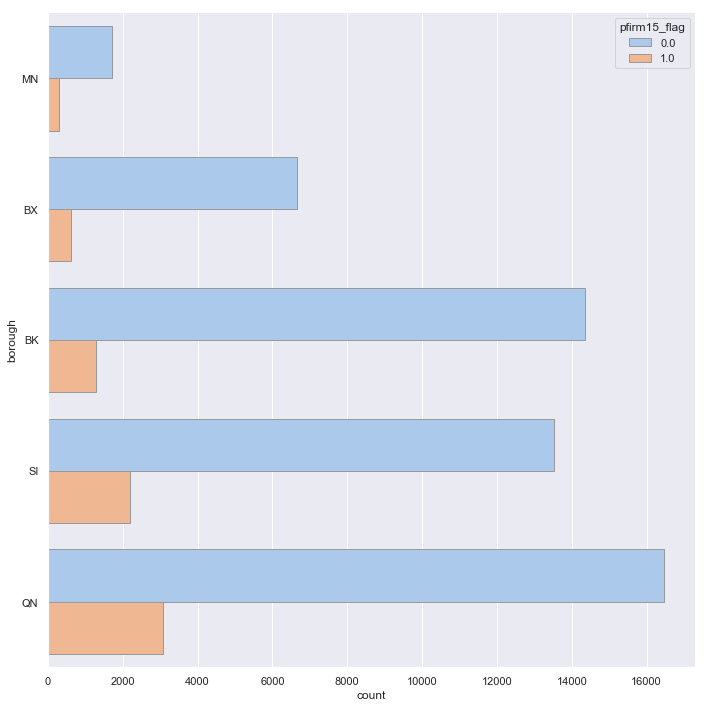

In [128]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(y="borough", 
            hue="pfirm15_flag", 
            kind="count",
            palette="pastel", 
            edgecolor=".6",
            data=data, 
            order=order, 
            height = 10, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-bar-plot-5-seaborn')

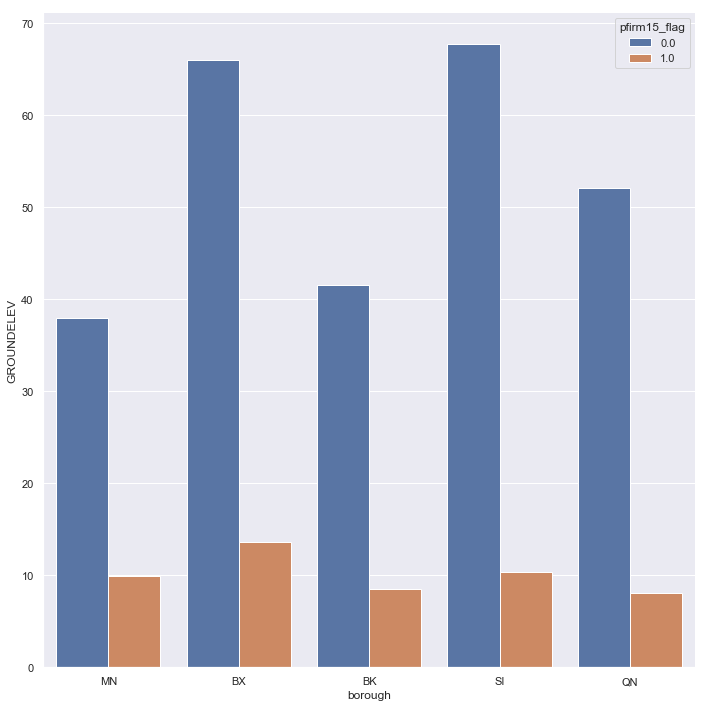

In [129]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="bar", 
            data=data,
            order=order, 
            height = 10, 
            ci=None, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-bar-plot-6-seaborn')

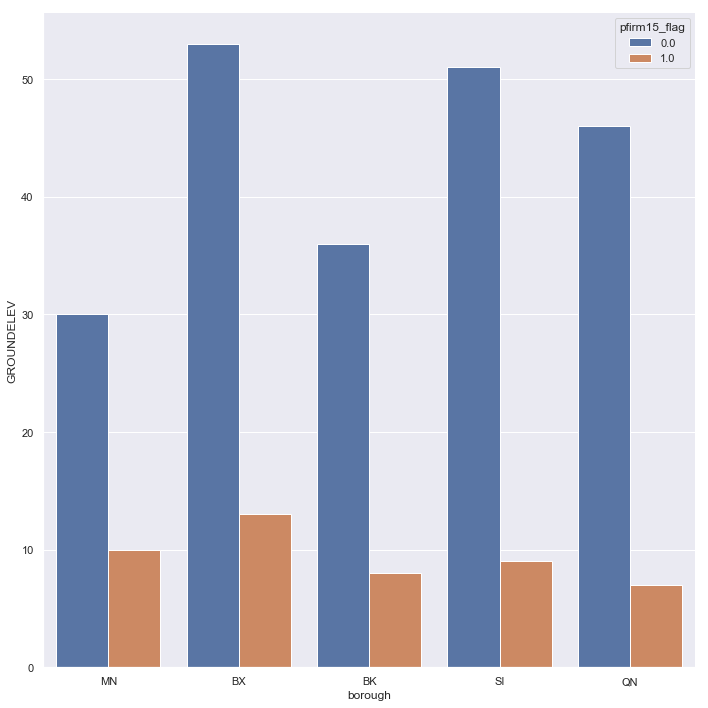

In [130]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="bar", 
            data=data,
            order=order, 
            height = 10, 
            estimator=np.median, 
            ci=None, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-bar-plot-7-seaborn')

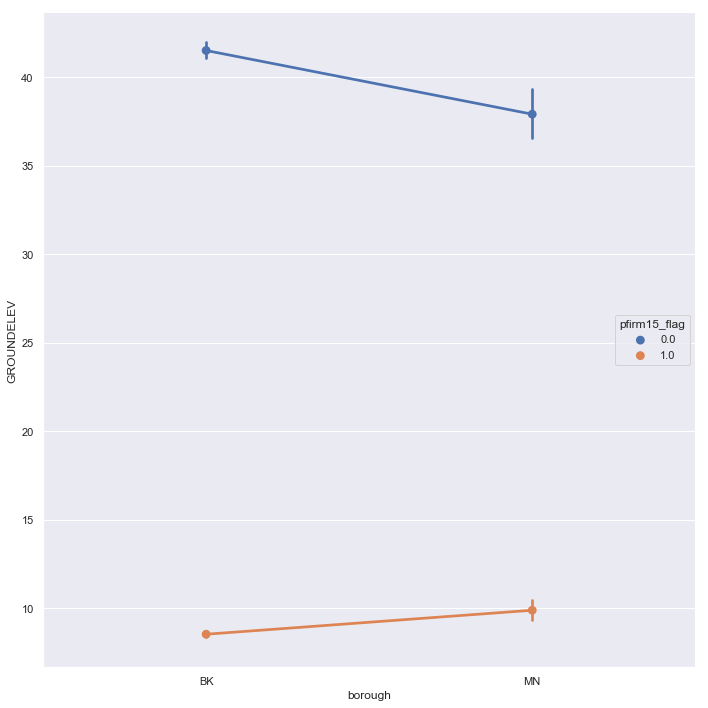

In [131]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="point", 
            data=data,
            height=10, 
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-point-plot-1-seaborn')

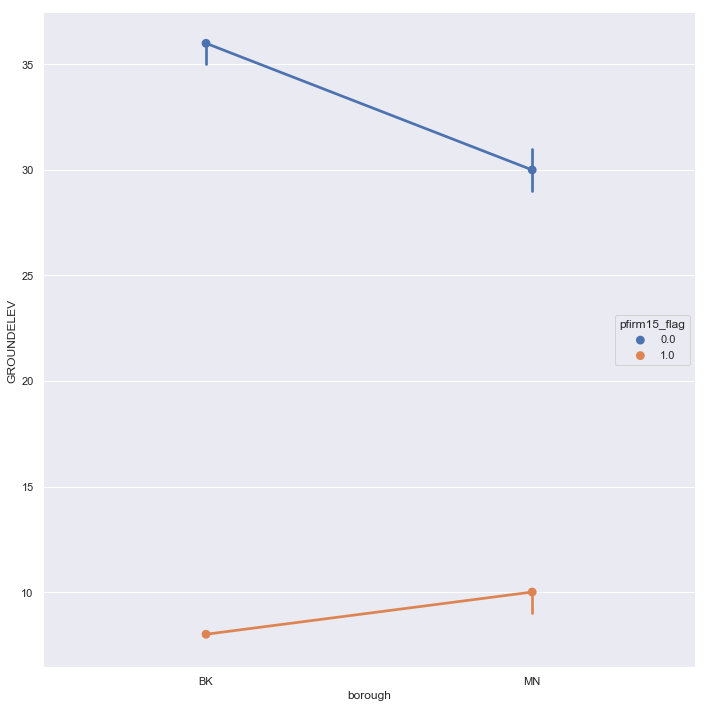

In [132]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="point", 
            data=data,
            height = 10, 
            estimator=np.median,
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-point-plot-2-seaborn')

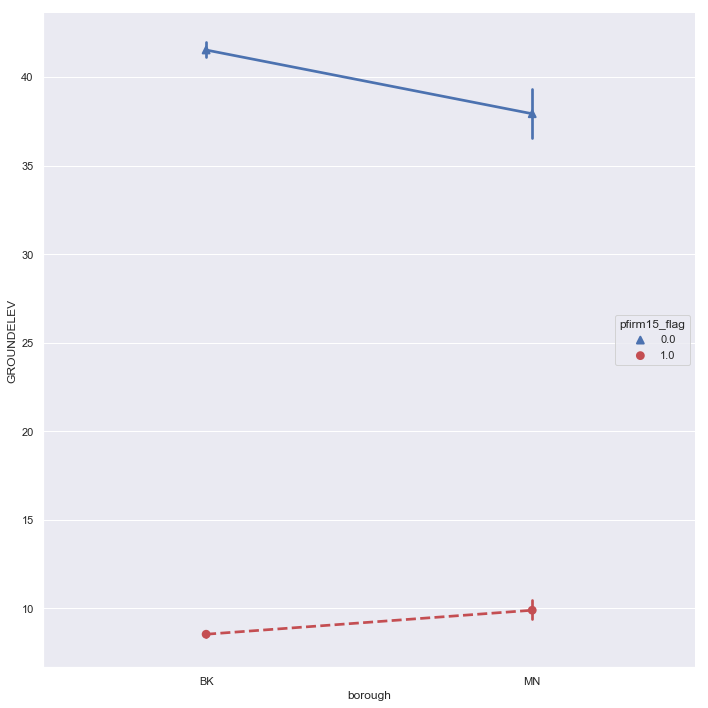

In [133]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", y="GROUNDELEV", 
            hue="pfirm15_flag",
            palette={0.0: "b", 1.0: "r"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", 
            data=data, 
            height = 10,
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-point-plot-3-seaborn')

### Showing Multiple Relationships with Facets

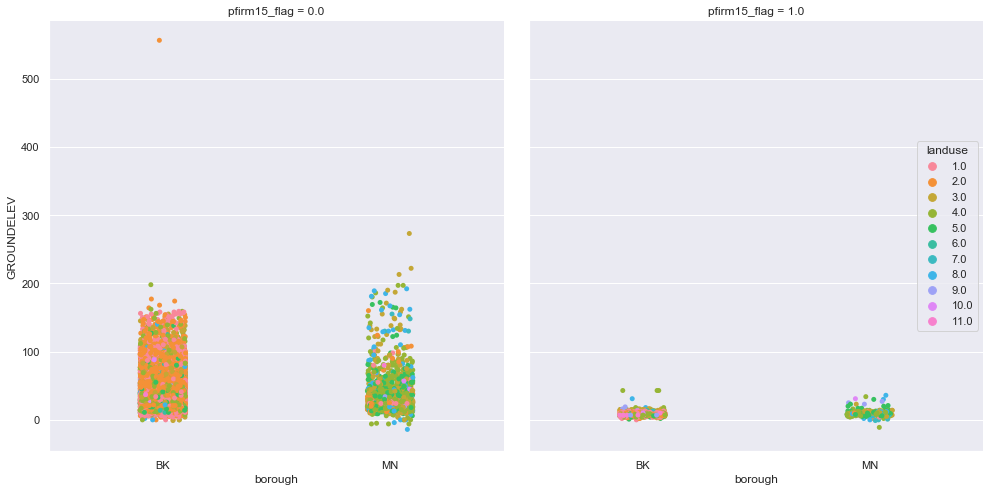

In [134]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", y="GROUNDELEV", 
            hue="landuse",
            col="pfirm15_flag", 
            height = 7, 
            data=data,
            legend=False)

plt.legend(loc='center right', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-facets-plot-1-seaborn')

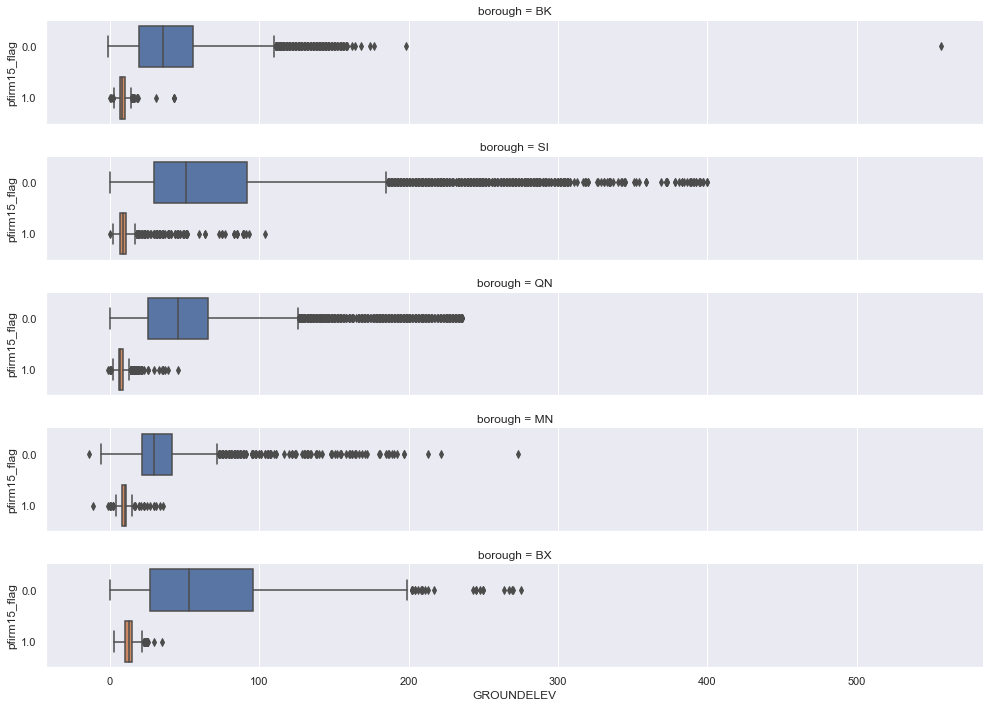

In [135]:
data = building_footprints

sns.catplot(x="GROUNDELEV", y="pfirm15_flag", 
            row="borough",
            kind="box", 
            orient="h", 
            height = 2, 
            aspect = 7, 
            data=data)
plt.tight_layout()
plt.savefig('figures/cat-facets-plot-2-seaborn')

## Visualizing Statistical Relationships

### Relating Variables with Scatter Plots

#### Scatter Plots

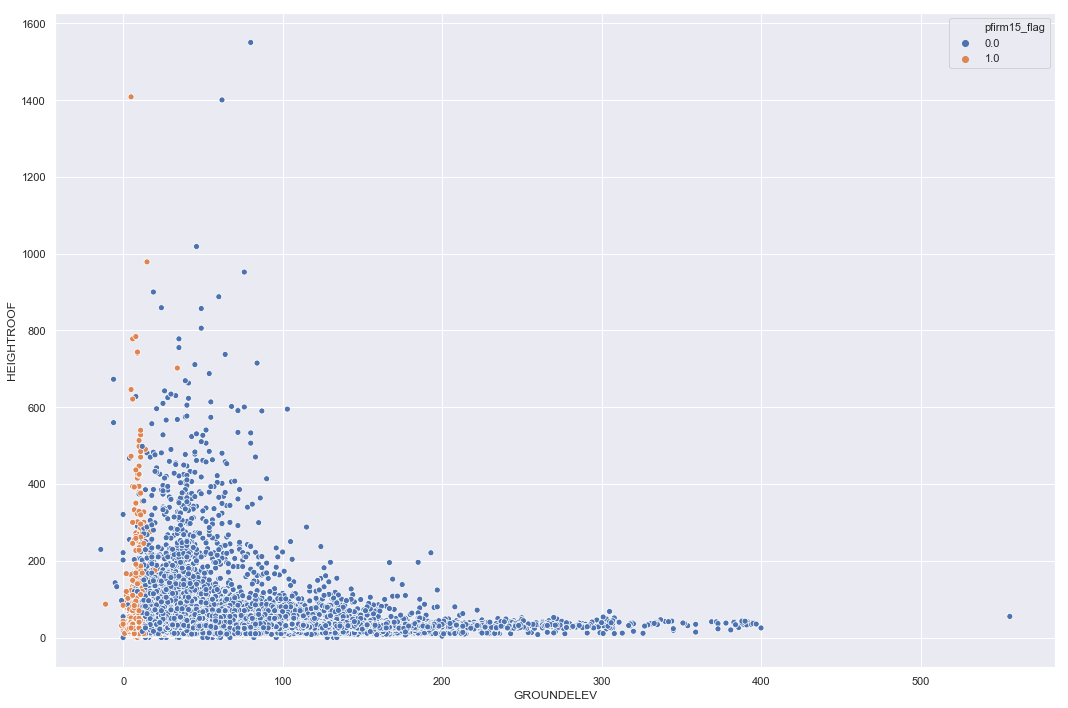

In [136]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y, 
                data=building_footprints, 
                hue="pfirm15_flag")
plt.tight_layout()
plt.savefig('figures/scatter-plot-5-seaborn')

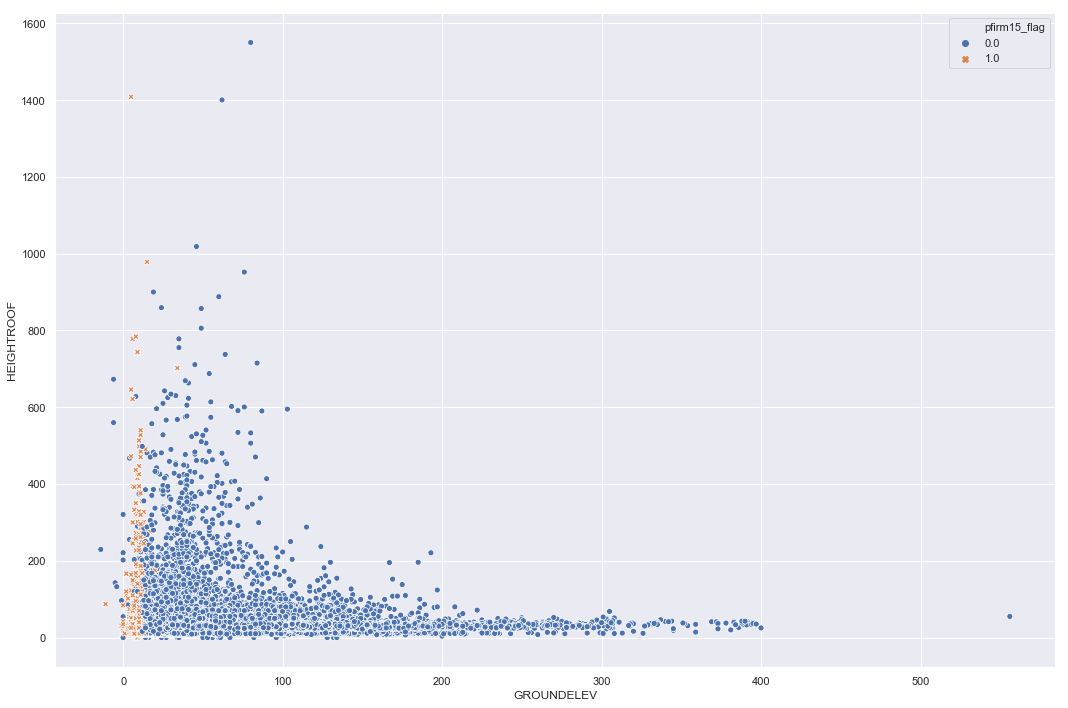

In [137]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y, 
                data=building_footprints, 
                hue="pfirm15_flag", 
                style="pfirm15_flag")
plt.tight_layout()
plt.savefig('figures/scatter-plot-6-seaborn')

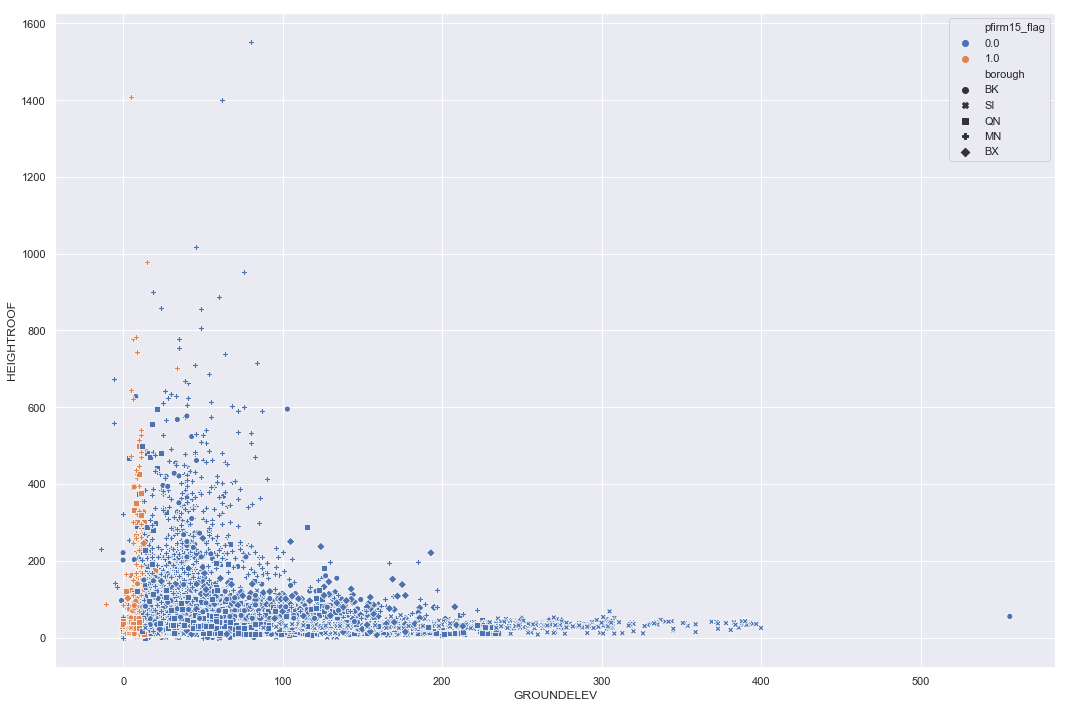

In [138]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y, 
                data=building_footprints, 
                hue="pfirm15_flag", 
                style="borough")
plt.tight_layout()
plt.savefig('figures/scatter-plot-7-seaborn')

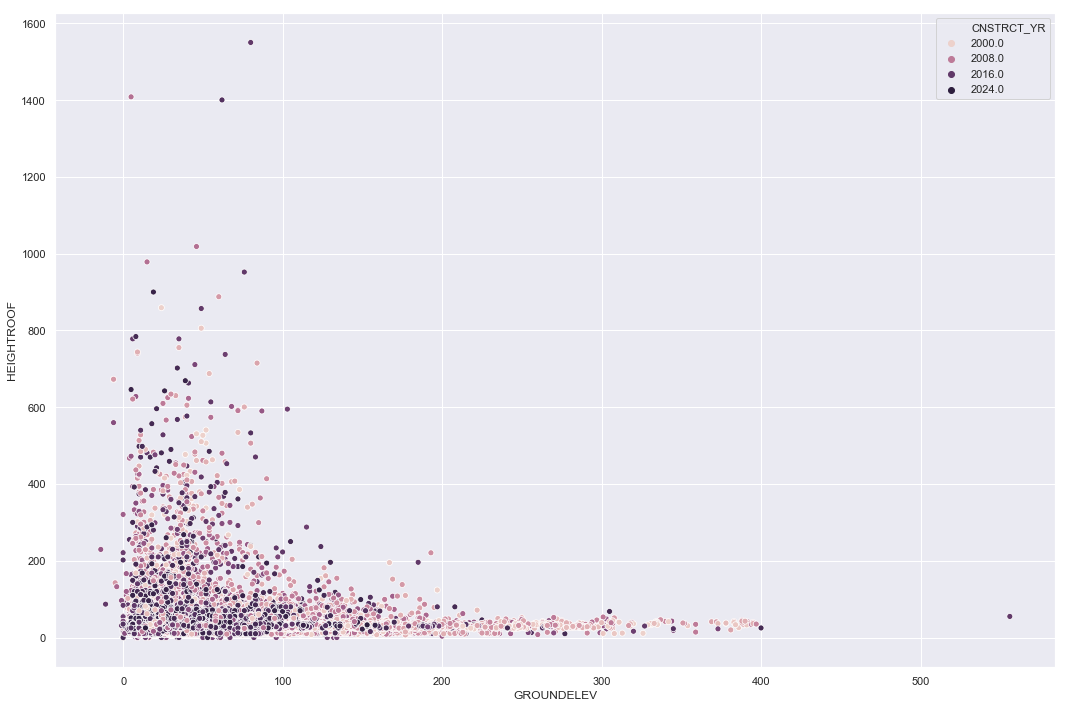

In [139]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']
 
plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y, 
                data=building_footprints, 
                hue="CNSTRCT_YR")
plt.tight_layout()
plt.savefig('figures/scatter-plot-8-seaborn')

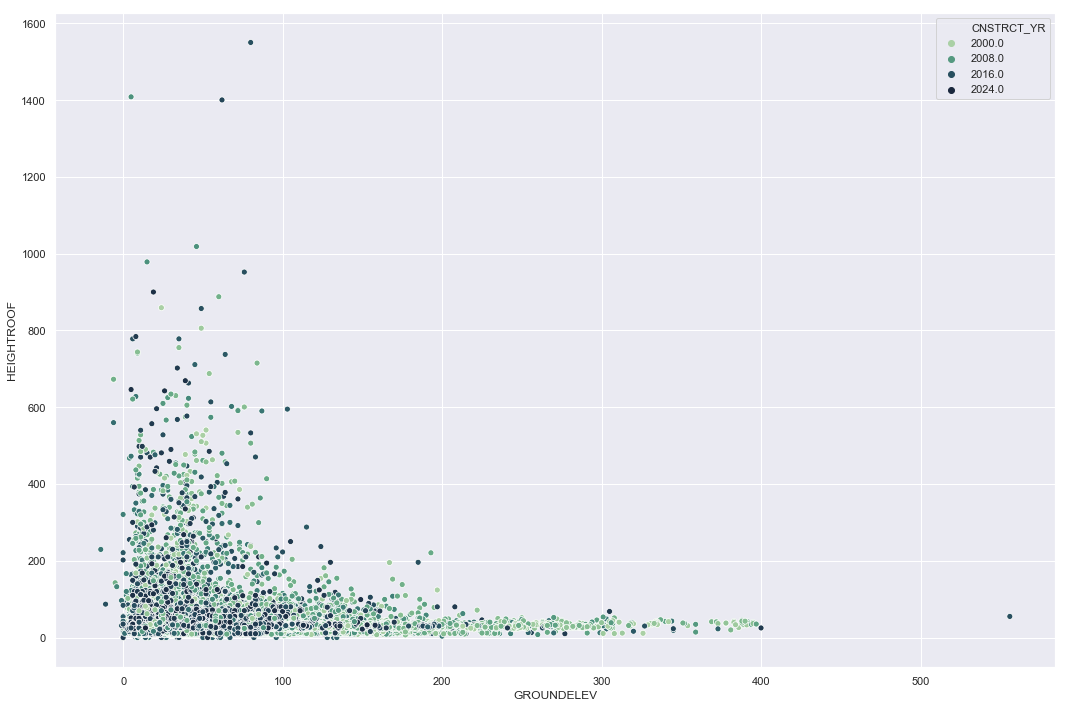

In [140]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y, 
                data=building_footprints, 
                hue="CNSTRCT_YR", 
                palette="ch:r=-.5,l=.75")
plt.tight_layout()
plt.savefig('figures/scatter-plot-9-seaborn')

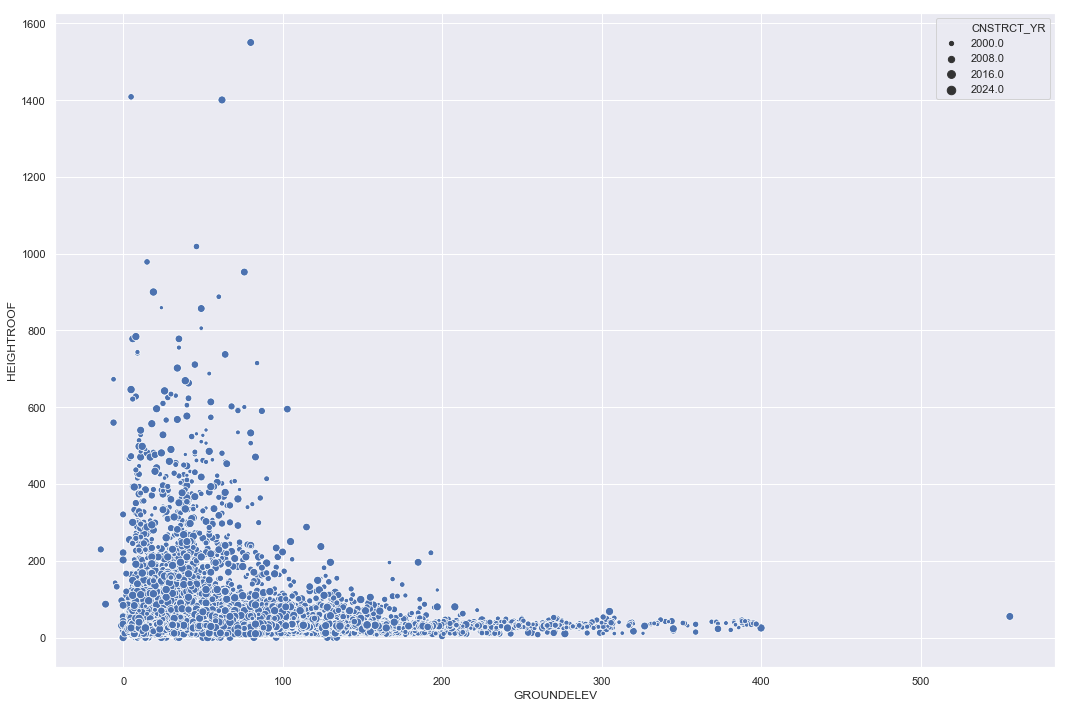

In [141]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y, 
                data=building_footprints, 
                size="CNSTRCT_YR")
plt.tight_layout()
plt.savefig('figures/scatter-plot-10-seaborn')

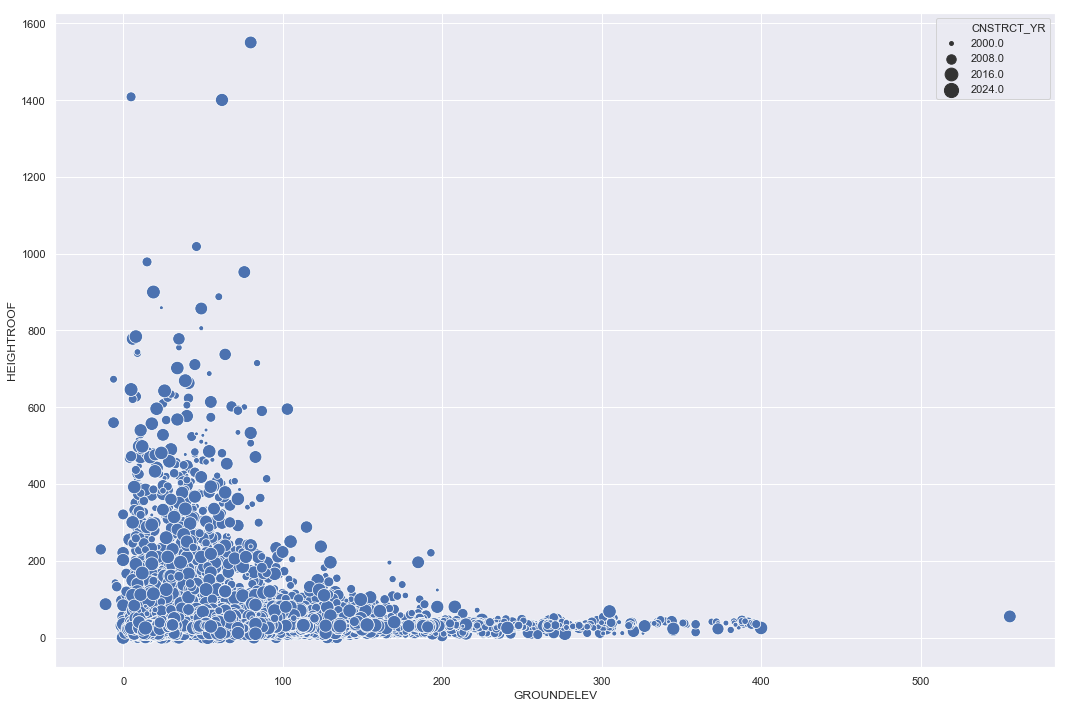

In [142]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y, 
                data=building_footprints, 
                size="CNSTRCT_YR", 
                sizes=(15, 200))
plt.tight_layout()
plt.savefig('figures/scatter-plot-11-seaborn')

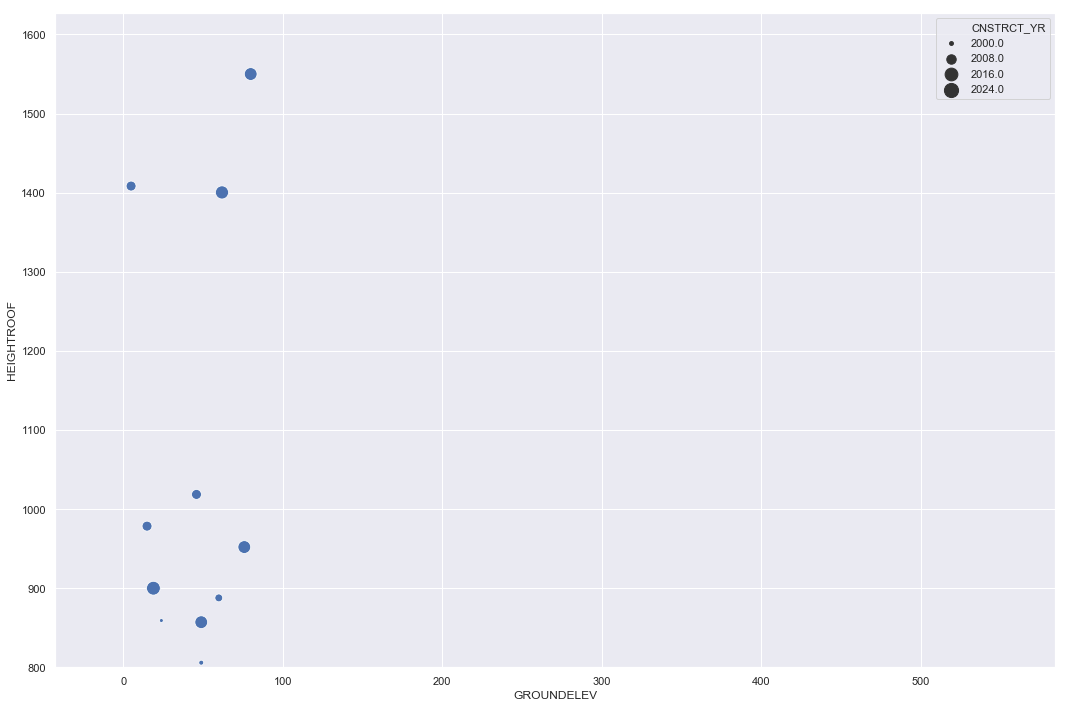

In [143]:
x = building_footprints['GROUNDELEV']
y = building_footprints['HEIGHTROOF']

plt.figure(figsize=(15,10))
sns.scatterplot(x=x, y=y, 
                data=building_footprints, 
                size="CNSTRCT_YR", 
                sizes=(15, 200))
plt.ylim(bottom=800)
plt.tight_layout()
plt.savefig('figures/scatter-plot-12-seaborn')